<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/main/Moseeva%20Evgenia/Ozon_marketplace_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr style="background-color: #69a3e8; color: white;">
    <td><b><font size="6">Проект: Предсказание и прогноз продаж товаров на маркетплейсах
    / ML vs TS vs NN Regression</font></b></td>
  </tr>
</table>

**⚡️Техническое задание (ТЗ) для проекта AI:**

**Основная цель: Разработка и реализация алгоритмов AI для выполнения следующих подзадач:**

- Определение корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.
- Прогнозирование продаж для любого клиента в категории на основе общих продаж всех продавцов в этой категории.
- Прогнозирование продаж товара в нескольких вариантах с учетом данных общих продаж, статистики товара и аудита карточки товара.
Входные данные: Большой набор данных с метриками с маркетплейса.

**Технологический стек: Python, Pandas, Scikit-Learn, TensorFlow/Keras, Git/GitHub для версионирования кода.**

Методология разработки: Гибкая методология разработки, с еженедельными спринтами и ежедневными вопросами в чате для обсуждения прогресса и проблем.

## **1.Определение корреляции по всем параметрам статистики для  понимания работы алгоритмов в разных категориях и их зависимостей.** <div id="header" align="center">
  <img src="https://media.giphy.com/media/40cxBsgqqwb65M5ivp/giphy.gif" width='200'/>
</div>

In [12]:
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
pd.set_option('display.max_columns', None) # Устанавливаем максимальное количество отображаемых колонок
import seaborn as sns; sns.set() #визуализация
import numpy as np # здесь она используется для создания координатной сетки
                   #(с помощью функции np.meshgrid) и для расчета
                   #значений матрицы корреляций (с помощью функции correlations.values)
                   # и для работы с массивами
from sklearn.preprocessing import LabelEncoder # это класс из библиотеки scikit-learn (sklearn),
                                               #который используется для кодирования меток классов в числовой формат.
                                               #Это часто используется в задачах машинного обучения, когда требуется преобразовать
                                               #категориальные значения в числовые, чтобы модели машинного обучения могли работать
                                               #с этими данными.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error  # для решения задачи с использованием градиентного бустинга в библиотеке scikit-learn
from sklearn.metrics import mean_absolute_error, r2_score  # для импорта двух функций-метрик из модуля sklearn.metrics.
                                                # mean_absolute_error (средняя абсолютная ошибка) и r2_score (коэффициент детерминации)
                                                # являются популярными метриками для оценки качества моделей машинного обучения, особенно в задачах регрессии.
                                                # mean_absolute_error позволяет оценить среднюю абсолютную разницу между фактическими
                                                # и прогнозируемыми значениями.
                                                # Она показывает, насколько близко прогнозы модели к фактическим значениям.
                                                #r2_score рассчитывает коэффициент детерминации, который измеряет долю объясненной дисперсии моделью в данных.
                                                #Коэффициент детерминации показывает, насколько хорошо модель соответствует данным и объясняет их вариации.
                                                # Импорт этих функций позволяет использовать данные метрики для оценки качества моделей в нашем коде.
                                                # Мы можем применить эти метрики на наших прогнозах и фактических значениях,
                                                # чтобы получить числовые оценки точности и эффективности модели.

In [13]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **1.1 Загрузка, осмотр, предобработка данных и EDA.**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/База.csv

#### **1.1.1 Работаем с файлом baza.csv**

In [14]:
# Загружаем базу
baza = pd.read_csv('/content/gdrive/MyDrive/УИИ/Стажировка/baza.csv',sep=";")
baza.head()

Артикул  Ozon Product ID  FBO OZON SKU ID  FBS OZON SKU ID        Barcode  \
0  '30273        105606938        298131117        298131122  2000000036618   
1  '30383        105742204        298264198        298264234  2000000037899   
2  '31284        112525698        303785665        303785701            NaN   
3  '25775        175507357        409388811        409388809  2000000005034   
4  '29740        175521273        409666236        409666237  2000000030531   

                                 Наименование товара Контент-рейтинг   Бренд  \
0  Плата B003809.2 заднего фонаря BMW X3 F25 (дра...             '15     GNX   
1  Биксеноновая линза GNX Hella 3R Crystal Vision...           '37.5     GNX   
2  Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...             '30  Aozoom   
3  Герметик для фар жесткий бутиловый черный (4 м...           '17.5     GNX   
4  Линзы ксенон для фар Ford Focus 2 2007-2011 (C...             '15     GNX   

  Статус товара Видимость FBO Причины скрытия FBO (при наличии) Видимость FBS  \
0     Продается  Показывается                               NaN  Показывается   
1     Продается  Показывается                               NaN  Показывается   
2     Продается  Показывается                               NaN  Показывается   
3     Продается  Показывается                               NaN  Показывается   
4     Продается  Показывается                               NaN  Показывается   

  Причины скрытия FBS (при наличии)        Дата создания  \
0                               NaN  2021-08-03 10:32:38   
1                               NaN  2021-08-03 14:58:10   
2                               NaN  2021-08-16 09:48:31   
3                               NaN  2021-12-02 08:31:59   
4                               NaN  2021-12-02 08:48:02   

   Коммерческая категория Объем товара, л Объемный вес, кг  \
0  Фонарь задний для авто           '1.00             '0.2   
1      Фара автомобильная           '3.00             '0.6   
2      Фара автомобильная           '6.30             '1.3   
3      Фара автомобильная           '1.88             '0.6   
4      Фара автомобильная           '6.00             '1.2   

   Доступно на складе Ozon, шт  Вывезти и нанести КИЗ (кроме Твери), шт  \
0                            0                                        0   
1                            0                                        0   
2                            0                                        0   
3                            0                                        0   
4                            0                                        0   

   Зарезервировано, шт  Доступно на моих складах, шт  \
0                    0                            26   
1                    0                           410   
2                    0                            10   
3                    0                           873   
4                    0                            47   

   Зарезервировано на моих складах, шт  Текущая цена с учетом скидки, руб.  \
0                                    0                              1200.0   
1                                    0                              1990.0   
2                                    0                              7900.0   
3                                    0                              1200.0   
4                                    0                              4500.0   

   Цена до скидки (перечеркнутая цена), руб.  Цена Premium, руб.  \
0                                     1800.0                 NaN   
1                                     3500.0                 NaN   
2                                        NaN                 NaN   
3                                        NaN                 NaN   
4                                     6300.0                 NaN   

   Рыночная цена, руб. Актуальная ссылка на рыночную цену Размер НДС, %  
0                  NaN                                NaN            0%  
1          

Посмотрим на сводную информацию о наборе данных

In [15]:
baza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1263 non-null   object 
 1   Ozon Product ID                            1263 non-null   int64  
 2   FBO OZON SKU ID                            1263 non-null   int64  
 3   FBS OZON SKU ID                            1263 non-null   int64  
 4   Barcode                                    1205 non-null   object 
 5   Наименование товара                        1263 non-null   object 
 6   Контент-рейтинг                            1263 non-null   object 
 7   Бренд                                      1258 non-null   object 
 8   Статус товара                              1263 non-null   object 
 9   Видимость FBO                              1263 non-null   object 
 10  Причины скрытия FBO (при

В нашем файле 28 столбцов и 1263 строки.  
Тип данных в 16 столбцах object и в 8 столбцах тип данных int64 и в 4 столбцах - float. Нужно провести исследование данных: определить нужные столбцы и от ненужных столбцов избавиться. При необходимости преобразовать данные в столбцах, заполнить пустые значения, дополнить датафрейм необходимыми расчетами в отдельный столбец.  

##### **Предобработка и EDA файла baza.csv**

In [16]:
# Найдём дубликаты
baza.duplicated().sum()

0

In [17]:
 # Найдем доли пропусков  в  столбцах
baza.isna().mean().sort_values(ascending=False)

Цена Premium, руб.                           1.000000
Актуальная ссылка на рыночную цену           0.988915
Рыночная цена, руб.                          0.988915
Причины скрытия FBS (при наличии)            0.984165
Причины скрытия FBO (при наличии)            0.978622
Цена до скидки (перечеркнутая цена), руб.    0.125891
Barcode                                      0.045922
Текущая цена с учетом скидки, руб.           0.004751
Бренд                                        0.003959
Артикул                                      0.000000
Объемный вес, кг                             0.000000
Зарезервировано на моих складах, шт          0.000000
Доступно на моих складах, шт                 0.000000
Зарезервировано, шт                          0.000000
Вывезти и нанести КИЗ (кроме Твери), шт      0.000000
Доступно на складе Ozon, шт                  0.000000
Коммерческая категория                       0.000000
Объем товара, л                              0.000000
Ozon Product ID             

In [18]:
# Посмотрим уникальные значения столбца `Видимость FBO`
unique_FBO = baza['Видимость FBO'].unique()
print(unique_FBO)

['Показывается' 'Скрыт']


В столбце `Видимость FBO`есть данные, которые скрыты. Возможны несколько причин, из-за которых товары с видимостью FBO могут быть скрыты:   

1. Нарушение требований Озона: Если товар не соответствует требованиям и политикам Озона, он может быть временно скрыт или отключен из-за нарушений.  

2. Нарушение ограничений по категории товара: Некоторые категории товаров могут иметь дополнительные требования или ограничения, и товары, не соответствующие им, могут быть невидимыми.  

3. Проблемы с поставкой товаров или запасами: Если у продавца возникли проблемы с поставкой товаров или недостаточностью товарных запасов, это может привести к временному отключению видимости FBO-товаров.  

4. Административные или технические проблемы: Возможны сбои в системе Озона или административные проблемы, которые могут вызывать проблемы с видимостью товаров.  
Поэтому мы избавимся от строк в датафрейме, где в столбце `Видимость FBO` скрыты данные:  

In [19]:
#Удаляем ненужные данные и перезапишем наш датафрейм
baza = baza[baza['Видимость FBO'] != 'Скрыт'].copy()

In [20]:
# Посмотрим уникальные значения столбца `Видимость FBS`
unique_FBS = baza['Видимость FBS'].unique()
print(unique_FBO)

['Показывается' 'Скрыт']


В этом случае, мы не будем удалять данные.  
 Видимость FBS" - это параметр, указывающий на видимость товара на площадке Озона в случае использования службы "Fulfilled By Seller" (FBS), то есть, при самостоятельной отгрузке и обработке товаров продавцом.Если "Видимость FBS" скрыта,то это может быть ручным скрытие товара: Продавец самостоятельно скрыл товар из публичной видимости на площадке Озона:  из-за проблем с доступностью, актуальностью или по другим причинам.

In [21]:
# Добавим новый столбец, в котором сложим данные в двух столбцах `Доступно на складе Ozon, шт` и `Доступно на моих складах, шт`
baza['Доступно на складах'] = baza['Доступно на складе Ozon, шт']+baza['Доступно на моих складах, шт']

In [22]:
# Отсортируем данные в таблице по столбцу 'Доступно на складах'
baza.sort_values('Доступно на складах', ascending=False).head()

Артикул  Ozon Product ID  FBO OZON SKU ID  FBS OZON SKU ID  \
3     '25775        175507357        409388811        409388809   
1165  '34193        419232883        805197289        805197290   
1090  '25789        328236921        650525298        650525299   
326   '31319        239013775        510826420        510826421   
1     '30383        105742204        298264198        298264234   

            Barcode                                Наименование товара  \
3     2000000005034  Герметик для фар жесткий бутиловый черный (4 м...   
1165  2000000049434       Светодиодные линзы GNX Silver 3.0 (комплект)   
1090  2000000005027  Герметик для фар твердый бутиловый серый (4 ме...   
326   2000000044330          Светодиодные линзы Eneg A3 MAX (комплект)   
1     2000000037899  Биксеноновая линза GNX Hella 3R Crystal Vision...   

     Контент-рейтинг   Бренд Статус товара Видимость FBO  \
3              '17.5     GNX     Продается  Показывается   
1165             '30     GNX     Продается  Показывается   
1090              '0     GNX     Продается  Показывается   
326              '30  Aozoom     Продается  Показывается   
1              '37.5     GNX     Продается  Показывается   

     Причины скрытия FBO (при наличии) Видимость FBS  \
3                                  NaN  Показывается   
1165                               NaN  Показывается   
1090                               NaN  Показывается   
326                                NaN  Показывается   
1                                  NaN  Показывается   

     Причины скрытия FBS (при наличии)        Дата создания  \
3                                  NaN  2021-12-02 08:31:59   
1165                               NaN  2022-11-28 19:21:08   
1090                               NaN  2022-07-22 10:57:20   
326                                NaN  2022-02-28 11:29:21   
1                                  NaN  2021-08-03 14:58:10   

                Коммерческая категория Объем товара, л Объемный вес, кг  \
3                   Фара автомобильная           '1.88             '0.6   
1165  Комплектующие для ксеноновых фар           '5.62             '1.5   
1090        Автохимия - Герметик, клей           '6.00             '1.2   
326   Комплектующие для ксеноновых фар          '11.25             '2.3   
1                   Фара автомобильная           '3.00             '0.6   

      Доступно на складе Ozon, шт  Вывезти и нанести КИЗ (кроме Твери), шт  \
3                               0                                        0   
1165                            0                                        0   
1090                            0                                        0   
326                             0                                        0   
1                               0                                        0   

      Зарезервировано, шт  Доступно на моих складах, шт  \
3                       0                           873   
1165                    0                           582   
1090                    0                           555   
326                     0                           505   
1                       0                           410   

      Зарезервировано на моих складах, шт  Текущая цена с учетом скидки, руб.  \
3                                       0                              1200.0   
1165                                    0                             12000.0   
1090                                    0                              1200.0   
326                                     0                              7500.0   
1                                       0                              1990.0   

      Цена до скидки (перечеркнутая цена), руб.  Цена Premium, руб.  \
3                                           NaN                 NaN   
1165                                        NaN                 NaN   
1090                                        NaN                 NaN   
326                               

In [23]:
#Посмотрим, сколько товаров доступно на складах
baza['Доступно на складах'].sum()

24407

In [24]:
# Снова посмотрим пропуски
baza.isna().mean().sort_values(ascending=False)

Цена Premium, руб.                           1.000000
Причины скрытия FBO (при наличии)            1.000000
Причины скрытия FBS (при наличии)            1.000000
Актуальная ссылка на рыночную цену           0.989353
Рыночная цена, руб.                          0.989353
Цена до скидки (перечеркнутая цена), руб.    0.117117
Barcode                                      0.035217
Артикул                                      0.000000
Объемный вес, кг                             0.000000
Размер НДС, %                                0.000000
Текущая цена с учетом скидки, руб.           0.000000
Зарезервировано на моих складах, шт          0.000000
Доступно на моих складах, шт                 0.000000
Зарезервировано, шт                          0.000000
Вывезти и нанести КИЗ (кроме Твери), шт      0.000000
Доступно на складе Ozon, шт                  0.000000
Коммерческая категория                       0.000000
Объем товара, л                              0.000000
Ozon Product ID             

In [25]:
# Избавимся от кавычки перед значением  в ячейках столбца 'Артикул'
baza['Артикул'] = baza['Артикул'].str.strip("'")

In [26]:
# Изменим тип данных с object на int
baza['Артикул'] = baza['Артикул'].astype(int)

 Всё Ок, получилось!

**Удалим  колонки:**  
Цена Premium, руб. - полностью не заполнен  
Причины скрытия FBO (при наличии)  - не заполнен   
Причины скрытия FBS (при наличии)  - не заполнен   
Актуальная ссылка на рыночную цену  - 0.989353 не заполнен  
Рыночная цена, руб.  - 0.989353 не заполнен  
Barcode - 0.035217 - неинформативен  
Видимость FBS   - неинформативен  
Видимость FBO   - неинформативен  
Дата создания  - неинформативен  
Объемный вес, кг  - неинформативен  
Размер НДС, % - неинформативен   
Вывезти и нанести КИЗ (кроме Твери), шт  - неинформативен  
Объем товара, л  - - неинформативен  


In [27]:
#Перезапишем наш датафрейм, избавимся от ненужных колонок
baza = baza[['Артикул', 'Ozon Product ID', 'FBO OZON SKU ID', 'FBS OZON SKU ID',
       'Наименование товара', 'Контент-рейтинг', 'Бренд',
       'Коммерческая категория','Текущая цена с учетом скидки, руб.', 'Цена до скидки (перечеркнутая цена), руб.', 'Доступно на складах']]
baza.head()

Артикул  Ozon Product ID  FBO OZON SKU ID  FBS OZON SKU ID  \
0    30273        105606938        298131117        298131122   
1    30383        105742204        298264198        298264234   
2    31284        112525698        303785665        303785701   
3    25775        175507357        409388811        409388809   
4    29740        175521273        409666236        409666237   

                                 Наименование товара Контент-рейтинг   Бренд  \
0  Плата B003809.2 заднего фонаря BMW X3 F25 (дра...             '15     GNX   
1  Биксеноновая линза GNX Hella 3R Crystal Vision...           '37.5     GNX   
2  Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...             '30  Aozoom   
3  Герметик для фар жесткий бутиловый черный (4 м...           '17.5     GNX   
4  Линзы ксенон для фар Ford Focus 2 2007-2011 (C...             '15     GNX   

   Коммерческая категория  Текущая цена с учетом скидки, руб.  \
0  Фонарь задний для авто                              1200.0   
1      Фара автомобильная                              1990.0   
2      Фара автомобильная                              7900.0   
3      Фара автомобильная                              1200.0   
4      Фара автомобильная                              4500.0   

   Цена до скидки (перечеркнутая цена), руб.  Доступно на складах  
0                                     1800.0                   26  
1                                     3500.0                  410  
2                                        NaN                   10  
3                                        NaN                  873  
4                                     6300.0                   47

In [28]:
# Посмотрим на столбцы и пропуски, отсортируем по убыванию
baza.isna().mean().sort_values(ascending=False)

Цена до скидки (перечеркнутая цена), руб.    0.117117
Артикул                                      0.000000
Ozon Product ID                              0.000000
FBO OZON SKU ID                              0.000000
FBS OZON SKU ID                              0.000000
Наименование товара                          0.000000
Контент-рейтинг                              0.000000
Бренд                                        0.000000
Коммерческая категория                       0.000000
Текущая цена с учетом скидки, руб.           0.000000
Доступно на складах                          0.000000
dtype: float64

In [29]:
# Заполним пустые значений в колонке 'Цена до скидки (перечеркнутая цена), руб.' значениями из колонки 'Текущая цена с учетом скидки, руб.'
baza['Цена до скидки (перечеркнутая цена), руб.'].fillna(baza['Текущая цена с учетом скидки, руб.'], inplace=True)

In [30]:
# Проверим, заполнились ли значения
baza.isna().mean().sort_values(ascending=False)

Артикул                                      0.0
Ozon Product ID                              0.0
FBO OZON SKU ID                              0.0
FBS OZON SKU ID                              0.0
Наименование товара                          0.0
Контент-рейтинг                              0.0
Бренд                                        0.0
Коммерческая категория                       0.0
Текущая цена с учетом скидки, руб.           0.0
Цена до скидки (перечеркнутая цена), руб.    0.0
Доступно на складах                          0.0
dtype: float64

Всё ОК, получилось!

Изменим тип данных столбца "Контент-рейтинг" с object  на вещественный:

In [31]:
# Посмотрим уникальные значения столбца `Видимость FBS`
unique_1 = baza['Контент-рейтинг'].unique()
print(unique_1)

["'15" "'37.5" "'30" "'17.5" "'22.5" "'20" "'0" "'5" "'10" "'7.5" "'12.5"
 "'27.5" "'Рассчитываем" "'32.5" "'40" "'25" "'45" "'52.5" "'35"]


Заменим точку на запятую, заменим "Рассчитываем" на 0:

In [32]:
baza['Контент-рейтинг'] = baza['Контент-рейтинг'].replace('Рассчитываем',"'0.0", regex=True)
baza['Контент-рейтинг'] = baza['Контент-рейтинг'].replace("'","", regex=True).astype(float)

Посмотрим, что в результате наших преобразований получилось:

In [33]:
baza.rename(columns={'Ozon Product ID': 'Ozon ID'}, inplace=True)

In [34]:
#Посмотрим на сводную информацию о наборе данных
baza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1221 non-null   int64  
 1   Ozon ID                                    1221 non-null   int64  
 2   FBO OZON SKU ID                            1221 non-null   int64  
 3   FBS OZON SKU ID                            1221 non-null   int64  
 4   Наименование товара                        1221 non-null   object 
 5   Контент-рейтинг                            1221 non-null   float64
 6   Бренд                                      1221 non-null   object 
 7   Коммерческая категория                     1221 non-null   object 
 8   Текущая цена с учетом скидки, руб.         1221 non-null   float64
 9   Цена до скидки (перечеркнутая цена), руб.  1221 non-null   float64
 10  Доступно на складах     

In [35]:
# Смотрим какие есть уникальные категории товаров
unique_category = baza['Коммерческая категория'].unique()
print(unique_category)


['Фонарь задний для авто' 'Фара автомобильная'
 'Комплектующие для ксеноновых фар' 'Автохимия - Герметик, клей'
 'Лампа автомобильная' 'Разное автопринадлежности']


Получилось 6 категорий.

**Вывод:**  
Данные (файл База.csv или здесь звучит как baza.csv)выгружены из личного кабинета продавца в Ozon. Этот отчет в личном кабинете продавца называется Product.  Мы предобработали данные в файле, а именно:  
1. В столбце Видимость FBO есть данные, которые скрыты. Приняли решение удалить их.
2. Добавили новый столбец `Доступно на складах`, в котором сложили данные двух столбцов: `Доступно на складе Ozon, шт` и `Доступно на моих складах, шт`.  
3. Изменили тип данных в столбце 'Артикул' с object  на int64  
4. Удалили 13 ненужных столбцов: `Цена Premium, руб.`, `Причины скрытия FBO (при наличии)`, `Причины скрытия FBS (при наличии)`, `Актуальная ссылка на рыночную цену`, `Рыночная цена, руб.`,`Barcode`,`Видимость FBS` ,`Видимость FBO` ,`Дата создания` ,`Объемный вес, кг`, `Размер НДС, %`,`Вывезти и нанести КИЗ (кроме Твери), шт`, `Объем товара, л`.  
5. Заполнили пустые значений в колонке `Цена до скидки (перечеркнутая цена), руб.` значениями из колонки `Текущая цена с учетом скидки, руб.`  
6. Изменили тип данных столбца `Контент-рейтинг` с object на вещественный.   



**Построим матрицу корреляций для датафрейма baza и отобразим её**

Сначала преобразуем категориальные значения столбца `Коммерческая категория` в числовые, выполним преобразования в копии датафрейма baza:

In [36]:
label_encoder = LabelEncoder()
baza1 = baza.copy()
baza1['Коммерческая категория_encoded'] = label_encoder.fit_transform(baza1['Коммерческая категория'])
unique_categories_encoded = baza1['Коммерческая категория_encoded'].unique()
print(unique_categories_encoded)

[5 4 1 0 2 3]


Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:

In [37]:
unique_categories_encoded = baza1['Коммерческая категория'].unique()
encoded_categories = label_encoder.transform(unique_categories_encoded)

for category, encoded_category in zip(unique_categories_encoded, encoded_categories):
    print(f'{category}: {encoded_category}')

Фонарь задний для авто: 5
Фара автомобильная: 4
Комплектующие для ксеноновых фар: 1
Автохимия - Герметик, клей: 0
Лампа автомобильная: 2
Разное автопринадлежности: 3


**Построим матрицу корреляций**

<ipython-input-38-8ca248a73efe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=baza1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


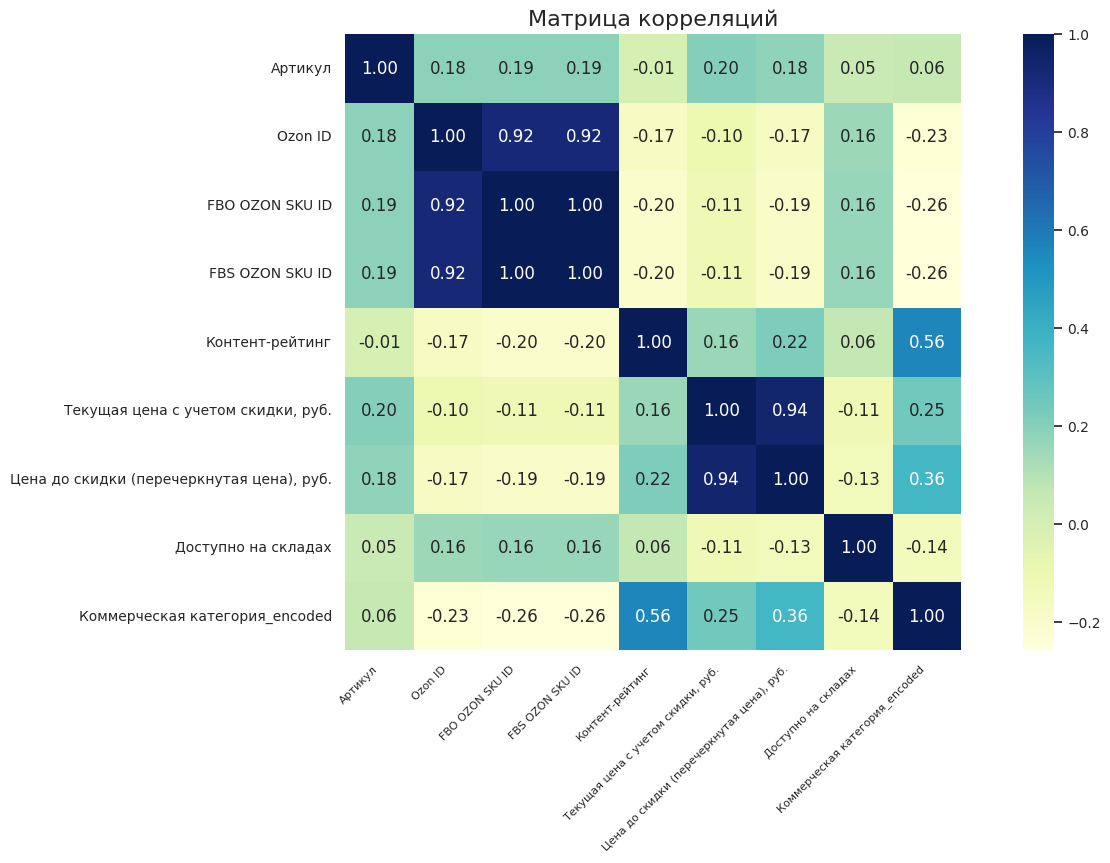

In [38]:
plt.figure(figsize=(16, 8), dpi=100)
heatmap = sns.heatmap(data=baza1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:** Из графика видно, что существует явная зависимость между "Коммерческая категория_encoded" и  Контент-рейтинг(0,56), также "Коммерческая категория_encoded" и Цены товара (0,36). Имеется небольшая корреляция между "Контент-рейтингом" и "Ценой".  

#### **1.1.2 Работаем с файлом analysts.xlsx**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx

In [39]:
# Загружаем базу и смотрим первые пять строк.
analysts = pd.read_excel('/content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx')
analysts.head()

Категория 3-го уровня                                Товары  \
0   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   
1   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   
2   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   
3   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   
4   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   

                                              Модель    Ozon ID Артикул  \
0  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074308   34599   
1  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074305   34599   
2  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074305   34599   
3  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074305   34599   
4  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074305   34599   

         День  Уникальные посетители, всего  \
0  2023-05-07                             1   
1  2023-05-04                             4   
2  2023-05-05                            12   
3  2023-05-06                             4   
4  2023-05-07                            14   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  1               1   
1                                                  0               5   
2                                                  2              18   
3                                                  1               4   
4                                                  2              16   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          1                           0   
1                          0                           4   
2                          2                           5   
3                          1                           2   
4                          2                           9   

  Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                        0,00                 0                 0   
1                      364,25                 0                 0   
2                        6,40                 0                 0   
3                      156,00                 0                 0   
4                      229,78                 0                 0   

   Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
0                 0                                 0                   0   
1                 0                                 0                   0   
2                 0                                 0                   0   
3                 0                                 0                   0   
4                 0                                 0                   0   

   Заказано на сумму  Отправления с премиум-подпиской, принятые в обработку  
0                  0                                                  0      
1                  0                                                  0      
2                  0                                                  0      
3                  0                                                  0      
4                  0                                                  0

In [40]:
# Смотрим общую информацию датафрейма
analysts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254748 entries, 0 to 254747
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  254748 non-null  object
 1   Товары                                                 254748 non-null  object
 2   Модель                                                 211411 non-null  object
 3   Ozon ID                                                254748 non-null  int64 
 4   Артикул                                                254748 non-null  object
 5   День                                                   254748 non-null  object
 6   Уникальные посетители, всего                           254748 non-null  int64 
 7   Уникальные посетители с просмотром карточки товара     254748 non-null  int64 
 8   Показы, всего                               

Наши данные содержат 254748 строк и 19 столбцов. Тип данных в 6 столбцах object и в 13 столбца тип данных int64. В столбце "День" нужно изменить тип данных с object на datetime. В столбце "Артикул" стоит тип данных object, хотя скорей всего там стоят числовые значения, нужно поисследовать эти данные и при необходимости их обработать, если они нам будут нужны для решения задач в Проекте.



In [41]:
# Найдём дубликаты
analysts.duplicated().sum()

1

In [42]:
# Удалим дубликаты
analysts = analysts.drop_duplicates()

In [43]:
# Посмотрим пропуски
analysts.isna().mean().sort_values(ascending=False)

Модель                                                   0.170114
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму                                        0.000000
Возвращено товаров                                       0.000000
Доставлено (за выбранный период)                         0.000000
Отменено товаров                                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные посетители, всего                             0.000000
День      

##### **Предобработка и EDA**

Удалим столбец `Отправления с премиум-подпиской, принятые в обработку`:

In [44]:
analysts.drop('Отправления с премиум-подпиской, принятые в обработку', axis=1, inplace=True)

Преобразуем столбец `День`:

In [45]:
# Изменим тип данных с object на Дату
analysts['День'] = pd.to_datetime(analysts['День'],format='%Y.%m.%d')

In [46]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", analysts['День'].min())
print("Максимальная дата создания:", analysts['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


Преобразуем столбец `Позиция в поиске и каталоге`:

In [47]:
#Заменим запятую на точку в числовых значениях  столбца "Позиция в поиске и каталоге", воспользовавшись методом .replace()
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].replace(',', '.', regex=True)
# Изменим тип данных с object на float
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].astype(float)

Исследуем столбец ``Артикул``. Смущает, что в столбце на первый взгляд стоят числа, но тип данных object.

In [48]:
# Посмотрим какие уникальные значения в столбце
unique_values = analysts['Артикул'].unique()
print(unique_values)

['34599' '34601' '34597' '34598' '34218' '34219' '30932' '34538' '34539'
 '34536' '33640' '33614' '33632' '33914' '30399' '31302' '30985' '33639'
 '30401' '33635' '30986' '31094' '29885' '33638' '30275' '30400' '33618'
 '34414' '34227' '33756' '33786' '30914' '30915' '30265' '30266' '30261'
 '29189' '28935' '26552' '29193' '28166' '29187' '28936' '28999' '29184'
 '30267' '28939' '26176' '26178' '28114' '28926' '26175' '29154' '28928'
 '28937' '28933' '29186' '28924' '28115' '29442' '26562' '24793' '30260'
 '26551' '29444' '28938' '29446' '30268' '29185' '30262' '29443' '28930'
 '30263' '28929' '29190' '30271' '33782' '34205' '28934' '34206' '30270'
 '34281' '34203' '33792' '34221' '30936' '34207' '30933' '30269' '34204'
 '33793' '34224' '33819' '34220' '30937' '33810' '33784' '33787' '30931'
 '33791' '34222' '30934' '33962' '33961' '34193' '28722' '28849' '25625'
 '25624' '28870' '26824' '28182' '26964' '26925' '25626' '34216' '34158'
 '34153' '34156' '34157' '34154' '34155' '34159' '3

Мы видим, что есть записи :числа с латинскими буквами: FL10NS,FL25W и т.д. Создадим отдельный датафрейм `object_values`, в который запишем такие данные:

In [49]:
# В этом коде мы используем метод .str.contains(), чтобы проверить наличие комбинации чисел и букв в каждой ячейке столбца analysts['Артикул'].
# Параметр regex=True указывает использовать регулярное выражение в поиске, а na=False отбрасывает пропущенные значения.
# Регулярное выражение r'\d.*[a-zA-Z]|[a-zA-Z].*\d' ищет комбинацию числа и буквы в строке.
# Если такая комбинация обнаружена, соответствующая строка будет включена в результат.
object_values = analysts[analysts['Артикул'].str.contains(r'\d.*[a-zA-Z]|[a-zA-Z].*\d', regex=True, na=False)]


In [50]:
# Посмотрим на сводную информацию о наборе данных
object_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 252191 to 253300
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Категория 3-го уровня                               119 non-null    object        
 1   Товары                                              119 non-null    object        
 2   Модель                                              119 non-null    object        
 3   Ozon ID                                             119 non-null    int64         
 4   Артикул                                             119 non-null    object        
 5   День                                                119 non-null    datetime64[ns]
 6   Уникальные посетители, всего                        119 non-null    int64         
 7   Уникальные посетители с просмотром карточки товара  119 non-null    int64         
 8   По

У нас отсортировалось 119 записей. Доля таких данных составляет 0,05% (119/254748*100=0,05%)

In [51]:
# Посмотрим уникальные артикулы в столбце "Артикул"
unique_artikul = object_values['Артикул'].unique()
print(unique_artikul)

['FL25W' 'FL10VW' 'FL10NS' '2A50']


Получилось , что 4 артикула имеют в оформлении цифры и латинские буквы в 119 строках. Теперь найдём долю этих артикулов в общем числе уникальных артикулов.

In [52]:
# Посчитаем количество уникальных аритикулов в датафрейме analysts
analysts['Артикул'].nunique()

994

Таким образом доля артикулов 'FL25W', 'FL10VW', 'FL10NS', '2A50' в общем датафрейме analysts составляет: 0,4% (119/994*100).  
 Для чистоты эксперимента будет лучше удалить эти аномальные данные, для того, чтобы тип данных столбца `Артикул` изменить с object на целочисленный.

In [53]:
# Используем метод drop(), передаем индексы этих строк в index=object_values.index,
# чтобы удалить соответствующие строки из исходного датафрейма analysts.

analysts = analysts.drop(index=object_values.index)
analysts['Артикул'] = analysts['Артикул'].astype(int)

In [54]:
# Посмотрим на сводную информацию о наборе данных
analysts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254628 entries, 0 to 254747
Data columns (total 18 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               254628 non-null  object        
 1   Товары                                              254628 non-null  object        
 2   Модель                                              211292 non-null  object        
 3   Ozon ID                                             254628 non-null  int64         
 4   Артикул                                             254628 non-null  int64         
 5   День                                                254628 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        254628 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  254628 non-null  int64         

Все получилось! Мы преобразовали типы данных в столбцах `День`, `Позиция в поиске и каталоге`и в  `Артикул`.

**Выполним исследовательский анализ данных(EDA)**

EDA мы будем проводить в направлении поиска корреляций в данных.  Поэтому при необходимости будем выполнять дополнительные преобразования: добавлять столбцы с новыми расчётами, удалять лишние столбцы и пр.  
Начнём с описательной статистики:

In [55]:
analysts.describe().T

count          mean  \
Ozon ID                                             254628.0  5.455757e+08   
Артикул                                             254628.0  2.771564e+04   
Уникальные посетители, всего                        254628.0  4.966025e+01   
Уникальные посетители с просмотром карточки товара  254628.0  1.861653e+00   
Показы, всего                                       254628.0  8.791001e+01   
Показы на карточке товара                           254628.0  2.924867e+00   
Показы в поиске и каталоге                          254628.0  2.876400e+01   
Позиция в поиске и каталоге                         254628.0  1.329888e+02   
В корзину, всего                                    254628.0  2.144030e-01   
Заказано товаров                                    254628.0  3.701871e-02   
Отменено товаров                                    254628.0  1.885103e-03   
Доставлено (за выбранный период)                    254628.0  3.353520e-02   
Возвращено товаров                                  254628.0  5.694582e-04   
Заказано на сумму                                   254628.0  1.233701e+02   

                                                             std          min  \
Ozon ID                                             8.741163e+07  260902271.0   
Артикул                                             7.967049e+03        139.0   
Уникальные посетители, всего                        2.202782e+02          0.0   
Уникальные посетители с просмотром карточки товара  9.181210e+00          0.0   
Показы, всего                                       4.162419e+02          0.0   
Показы на карточке товара                           1.587694e+01          0.0   
Показы в поиске и каталоге                          1.468513e+02          0.0   
Позиция в поиске и каталоге                         1.834617e+02          0.0   
В корзину, всего                                    1.136372e+00          0.0   
Заказано товаров                                    2.730429e-01          0.0   
Отменено товаров                                    4.922932e-02          0.0   
Доставлено (за выбранный период)                    2.576318e-01          0.0   
Возвращено товаров                                  2.620984e-02          0.0   
Заказано на сумму                                   1.152483e+03          0.0   

                                                            25%           50%  \
Ozon ID                                             510662709.0  5.115731e+08   
Артикул                                                 26788.0  2.973800e+04   
Уникальные посетители, всего                                4.0  1.000000e+01   
Уникальные посетители с просмотром карточки товара          0.0  0.000000e+00   
Показы, всего                                               5.0  1.400000e+01   
Показы на карточке товара                                   0.0  0.000000e+00   
Показы в поиске и каталоге                                  2.0  6.000000e+00   
Позиция в поиске и каталоге                                31.0  8.696000e+01   
В корзину, всего                                            0.0  0.000000e+00   
Заказано товаров                                            0.0  0.000000e+00   
Отменено товаров                                            0.0  0.000000e+00   
Доставлено (за выбранный период)                            0.0  0.000000e+00   
Возвращено товаров                                          0.0  0.000000e+00   
Заказано на сумму                                           0.0  0.000000e+00   

                                                             75%          max  
Ozon ID                                             5.784897e+08  966074308.0  
Артикул                                             3.097600e+04      34601.0  
Уникальные посетители, всего                        3.000000e+01      12798.0  
Уникальные посетители с просмотром карточки товара  1.000000e+00        838.0  
Показы, всего                                       

Выполним доп.вычисления: посмотрим суммы по столбцам `Заказано товаров`и `Отменено товаров`

In [56]:
print("Сумма по столбцу 'Заказано товаров':", analysts['Заказано товаров'].sum())
print("Сумма по столбцу 'Отменено товаров':", analysts['Отменено товаров'].sum())

Сумма по столбцу 'Заказано товаров': 9426
Сумма по столбцу 'Отменено товаров': 480


Доля отменённых товаров по независимым причинам составила 5,1%

In [57]:
# Найдём уникальные категорий товаров в наших данных:
unique_categories = analysts['Категория 3-го уровня'].unique()
print(unique_categories)

['Лампа автомобильная' 'Комплектующие светодиодной лампы для авто'
 'Комплектующие для ксеноновых фар' 'Разное автопринадлежности'
 'Фара автомобильная' 'Фонарь задний для авто' 'Другое'
 'Автохимия - Герметик, клей' 'Светодиодный модуль']


**Построим матрицу корреляций и отобразим её**  

Сначала преобразуем категориальные значения столбца `Категория 3-го уровня` в числовые, выполним преобразования в копии датафрейма analysts:

In [58]:
label_encoder = LabelEncoder()
analysts1 = analysts.copy()
analysts1['Категория 3-го уровня_encoded'] = label_encoder.fit_transform(analysts1['Категория 3-го уровня'])
unique_categories_encoded = analysts1['Категория 3-го уровня_encoded'].unique()
print(unique_categories_encoded)

[4 3 2 5 7 8 1 0 6]


Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:  

In [59]:
unique_categories_encoded = analysts1['Категория 3-го уровня'].unique()
encoded_categories = label_encoder.transform(unique_categories_encoded)

for category, encoded_category in zip(unique_categories_encoded, encoded_categories):
    print(f'{category}: {encoded_category}')

Лампа автомобильная: 4
Комплектующие светодиодной лампы для авто: 3
Комплектующие для ксеноновых фар: 2
Разное автопринадлежности: 5
Фара автомобильная: 7
Фонарь задний для авто: 8
Другое: 1
Автохимия - Герметик, клей: 0
Светодиодный модуль: 6


**Построим матрицу корреляций и отобразим её**

<ipython-input-60-1d58a1981919>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=analysts1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


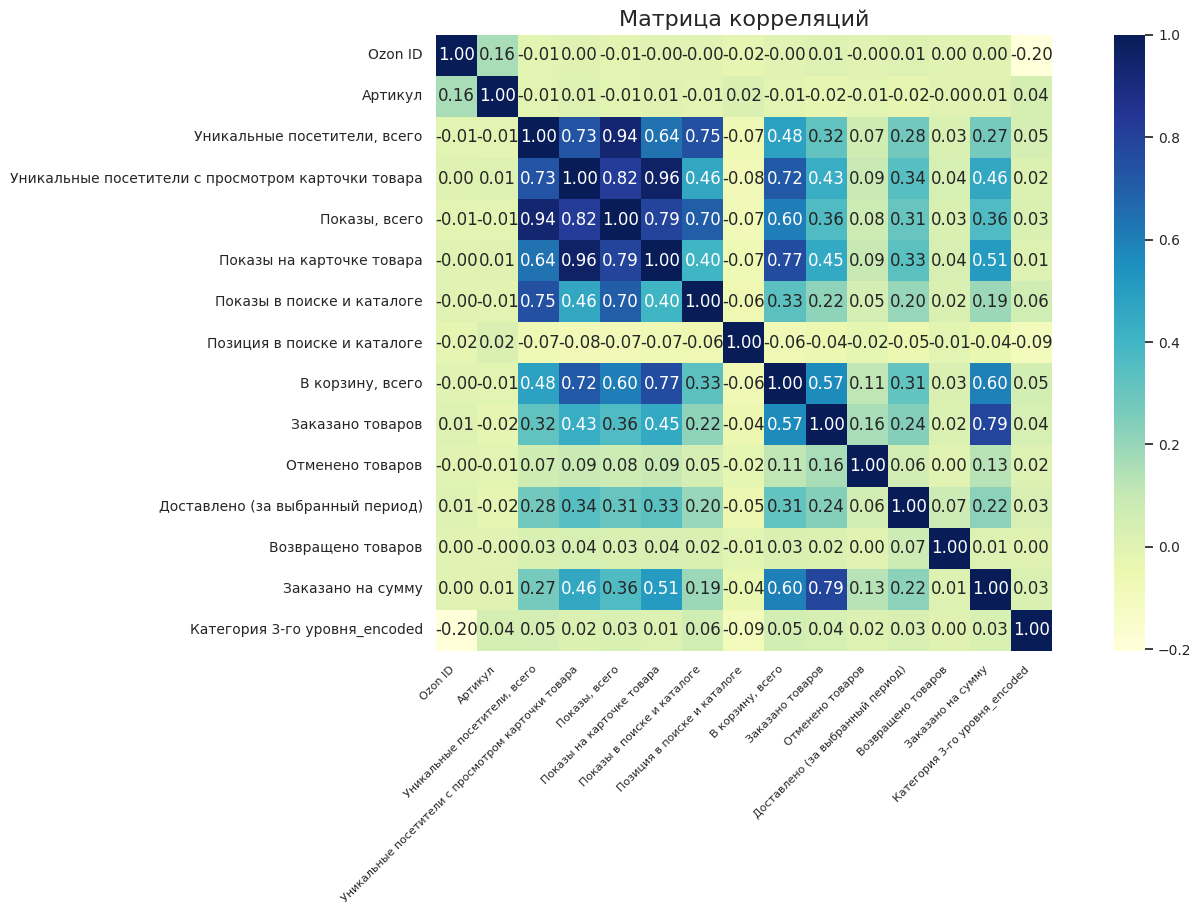

In [60]:
plt.figure(figsize=(16, 8), dpi=100)
heatmap = sns.heatmap(data=analysts1.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:**

Явной зависимости категорий от признаков не обнаружено.Есть сильная зависимость прохождения товаров по воронке продаж.

**Вывод:**

В этом разделе я:  
1.  Выполнила преобразование типы данных в столбцах День, Позиция в поиске и каталоге и в Артикул.;   
2. Для чистоты эксперимента удалила строки с  артикулами 'FL25W', 'FL10VW', 'FL10NS', '2A50' Их доля составляет менее 0,4% в общем датафрейме analysts ;  
3. Выполнила исследовательский анализ данных(EDA);  
4. Преобразовала столбец 'Категория 3-го уровня' в числовой формат для построения Модели обучения;  
5. Построила общую матрицу корреляции и отдельно для каждой категории;  
6. Обнаружила пять мультиколлинеарных признака:   
- Уникальные посетители - Показы,всего(0,94);  
- Уникальные посетители с просмотром карточки товара - Показы на карточке товара(0,96);  
- Показы всего - Уникальные посетители с просмотром карточки товара (0,82);  
- Заказано на сумму - Заказано товаров (0,79);  
- Заказано товаров - В корзину всего (0,57);  
7. Пришла к выводу, но не очень уверена,что для построения Модели прогнозирования нужно удалить эти пять мультиколлинеарных признака.  

#### **1.1.3 Работаем с файлом Аналитика Акции 01.06.2022-31.05.2023.xlsx"** здесь звучит как **promotions**

Путь к файлу : /content/gdrive/MyDrive/УИИ/Стажировка/promotions.xlsx

In [61]:
# Загружаем базу и смотрим первые пять строк.
promotions = pd.read_excel('/content/gdrive/MyDrive/УИИ/Стажировка/promotions.xlsx')
promotions.head()

Категория 3-го уровня                         Товары  \
0  Разное автопринадлежности  Светодиодная подсветка салона   
1  Разное автопринадлежности  Светодиодная подсветка салона   
2  Разное автопринадлежности  Светодиодная подсветка салона   
3  Разное автопринадлежности  Светодиодная подсветка салона   
4  Разное автопринадлежности  Светодиодная подсветка салона   

                          Модель    Ozon ID  Артикул Акции        День  \
0  Светодиодная подсветка салона  882353427    34414   NaN  2023-03-05   
1  Светодиодная подсветка салона  882353427    34414   NaN  2023-03-06   
2  Светодиодная подсветка салона  882353427    34414   NaN  2023-03-07   
3  Светодиодная подсветка салона  882353427    34414   NaN  2023-03-08   
4  Светодиодная подсветка салона  882353427    34414   NaN  2023-03-09   

   Уникальные посетители, всего  \
0                            65   
1                            85   
2                            44   
3                            47   
4                            27   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  3              69   
1                                                  3             109   
2                                                  2              50   
3                                                  1              54   
4                                                  2              39   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          3                          40   
1                          3                          46   
2                          2                          37   
3                          2                          47   
4                          4                          30   

  Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                      110,33                 0                 0   
1                      103,43                 0                 0   
2                       97,14                 0                 0   
3                      115,06                 0                 0   
4                      114,37                 0                 0   

   Доставлено (за выбранный период)  Заказано на сумму  \
0                                 0                  0   
1                                 0                  0   
2                                 0                  0   
3                                 0                  0   
4                                 0                  0   

   Заказано товаров по акции  Заказано на сумму по акции  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Отправления с премиум-подпиской, принятые в обработку  
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0

In [62]:
# Посмотрим на сводную информацию о наборе данных
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  239957 non-null  object
 1   Товары                                                 239957 non-null  object
 2   Модель                                                 200817 non-null  object
 3   Ozon ID                                                239957 non-null  int64 
 4   Артикул                                                239957 non-null  int64 
 5   Акции                                                  35605 non-null   object
 6   День                                                   239957 non-null  object
 7   Уникальные посетители, всего                           239957 non-null  int64 
 8   Уникальные посетители с просмотром карточки 

In [63]:
#Смотрим доли пропусков в столбцах
promotions.isna().mean().sort_values(ascending=False)

Акции                                                    0.851619
Модель                                                   0.163113
Категория 3-го уровня                                    0.000000
Показы в поиске и каталоге                               0.000000
Заказано на сумму по акции                               0.000000
Заказано товаров по акции                                0.000000
Заказано на сумму                                        0.000000
Доставлено (за выбранный период)                         0.000000
Заказано товаров                                         0.000000
В корзину, всего                                         0.000000
Позиция в поиске и каталоге                              0.000000
Показы на карточке товара                                0.000000
Товары                                                   0.000000
Показы, всего                                            0.000000
Уникальные посетители с просмотром карточки товара       0.000000
Уникальные

**Вывод:** Наши данные содержат 239957 строк и 20 столбцов. Тип данных в 6 столбцах object и в 14 столбца тип данных int64. В столбце "День" нужно изменить тип данных с object на datetime. Также следует преобразовать  и изменить тип данных в столбце "Позиция в поиске и каталоге" с object на вещественный.

##### **Предобработка и EDA**

In [64]:
# Изменим тип данных с object на Дату
promotions['День'] = pd.to_datetime(promotions['День'],format='%Y.%m.%d')

In [65]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", promotions['День'].min())
print("Максимальная дата создания:", promotions['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


In [66]:
#Заменим запятую на точку в числовых значениях  столбца "Позиция в поиске и каталоге", воспользовавшись методом .replace()
promotions['Позиция в поиске и каталоге'] = promotions['Позиция в поиске и каталоге'].replace(',', '.', regex=True)
# Изменим тип данных с object на float
promotions['Позиция в поиске и каталоге'] = promotions['Позиция в поиске и каталоге'].astype(float)

In [67]:
# Посмотрим на сводную информацию о наборе данных после преобразований
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Категория 3-го уровня                                  239957 non-null  object        
 1   Товары                                                 239957 non-null  object        
 2   Модель                                                 200817 non-null  object        
 3   Ozon ID                                                239957 non-null  int64         
 4   Артикул                                                239957 non-null  int64         
 5   Акции                                                  35605 non-null   object        
 6   День                                                   239957 non-null  datetime64[ns]
 7   Уникальные посетители, всего                           2

### **1.2 Соединяем данные з-х датафреймов: promotions,analysts и baza**

Посмотрим на сводную информацию о наборе данных:

In [68]:
baza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1262
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1221 non-null   int64  
 1   Ozon ID                                    1221 non-null   int64  
 2   FBO OZON SKU ID                            1221 non-null   int64  
 3   FBS OZON SKU ID                            1221 non-null   int64  
 4   Наименование товара                        1221 non-null   object 
 5   Контент-рейтинг                            1221 non-null   float64
 6   Бренд                                      1221 non-null   object 
 7   Коммерческая категория                     1221 non-null   object 
 8   Текущая цена с учетом скидки, руб.         1221 non-null   float64
 9   Цена до скидки (перечеркнутая цена), руб.  1221 non-null   float64
 10  Доступно на складах     

In [69]:
analysts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254628 entries, 0 to 254747
Data columns (total 18 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               254628 non-null  object        
 1   Товары                                              254628 non-null  object        
 2   Модель                                              211292 non-null  object        
 3   Ozon ID                                             254628 non-null  int64         
 4   Артикул                                             254628 non-null  int64         
 5   День                                                254628 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        254628 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  254628 non-null  int64         

In [70]:
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239957 entries, 0 to 239956
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Категория 3-го уровня                                  239957 non-null  object        
 1   Товары                                                 239957 non-null  object        
 2   Модель                                                 200817 non-null  object        
 3   Ozon ID                                                239957 non-null  int64         
 4   Артикул                                                239957 non-null  int64         
 5   Акции                                                  35605 non-null   object        
 6   День                                                   239957 non-null  datetime64[ns]
 7   Уникальные посетители, всего                           2

In [71]:
baza.head(1)

Артикул    Ozon ID  FBO OZON SKU ID  FBS OZON SKU ID  \
0    30273  105606938        298131117        298131122   

                                 Наименование товара  Контент-рейтинг Бренд  \
0  Плата B003809.2 заднего фонаря BMW X3 F25 (дра...             15.0   GNX   

   Коммерческая категория  Текущая цена с учетом скидки, руб.  \
0  Фонарь задний для авто                              1200.0   

   Цена до скидки (перечеркнутая цена), руб.  Доступно на складах  
0                                     1800.0                   26

In [72]:
analysts.head(1)

Категория 3-го уровня                                Товары  \
0   Лампа автомобильная  Светодиодные лампы GNX NEON H1 6000K   

                                              Модель    Ozon ID  Артикул  \
0  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966074308    34599   

        День  Уникальные посетители, всего  \
0 2023-05-07                             1   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  1               1   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          1                           0   

   Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                          0.0                 0                 0   

   Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
0                 0                                 0                   0   

   Заказано на сумму  
0                  0

In [73]:
promotions.head(1)

Категория 3-го уровня                         Товары  \
0  Разное автопринадлежности  Светодиодная подсветка салона   

                          Модель    Ozon ID  Артикул Акции       День  \
0  Светодиодная подсветка салона  882353427    34414   NaN 2023-03-05   

   Уникальные посетители, всего  \
0                            65   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  3              69   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          3                          40   

   Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                       110.33                 0                 0   

   Доставлено (за выбранный период)  Заказано на сумму  \
0                                 0                  0   

   Заказано товаров по акции  Заказано на сумму по акции  \
0                          0                           0   

   Отправления с премиум-подпиской, принятые в обработку  
0                                                  0

##### **1.2.1 Объединим два датафрейма- analysts, promotions**

In [74]:
analysts_promotions = pd.merge(analysts, promotions[['Артикул', 'День', 'Акции',
                                                     'Заказано товаров по акции','Заказано на сумму по акции']
                                                    ], on=['Артикул', 'День'], how='inner')

In [75]:
# Посмотрим на сводную информацию о наборе данных
analysts_promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245210 entries, 0 to 245209
Data columns (total 21 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               245210 non-null  object        
 1   Товары                                              245210 non-null  object        
 2   Модель                                              205080 non-null  object        
 3   Ozon ID                                             245210 non-null  int64         
 4   Артикул                                             245210 non-null  int64         
 5   День                                                245210 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        245210 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  245210 non-null  int64         

In [76]:
#Посмотрим долю пропусков
analysts_promotions.isna().mean().sort_values(ascending=False)

Акции                                                 0.852502
Модель                                                0.163656
Категория 3-го уровня                                 0.000000
Позиция в поиске и каталоге                           0.000000
Заказано товаров по акции                             0.000000
Заказано на сумму                                     0.000000
Возвращено товаров                                    0.000000
Доставлено (за выбранный период)                      0.000000
Отменено товаров                                      0.000000
Заказано товаров                                      0.000000
В корзину, всего                                      0.000000
Показы в поиске и каталоге                            0.000000
Товары                                                0.000000
Показы на карточке товара                             0.000000
Показы, всего                                         0.000000
Уникальные посетители с просмотром карточки товара    0

##### **1.2.2 Объединим два датафрейма- baza и analysts_promotions**

In [77]:
baza_analysts_promotions = pd.merge(analysts_promotions, baza[['Цена до скидки (перечеркнутая цена), руб.',
                                                               'Контент-рейтинг',
                                                               'Текущая цена с учетом скидки, руб.',
                                                               'Артикул']], on=['Артикул'], how='inner')

In [78]:
baza_analysts_promotions.head()

Категория 3-го уровня                                       Товары  \
0   Лампа автомобильная  Светодиодные лампы GNX NEON 9012 HIR2 6000K   
1   Лампа автомобильная  Светодиодные лампы GNX NEON 9012 HIR2 6000K   
2   Лампа автомобильная  Светодиодные лампы GNX NEON 9012 HIR2 6000K   
3   Лампа автомобильная  Светодиодные лампы GNX NEON 9012 HIR2 6000K   
4   Лампа автомобильная  Светодиодные лампы GNX NEON 9012 HIR2 6000K   

                                              Модель    Ozon ID  Артикул  \
0  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966018019    34601   
1  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966018019    34601   
2  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966018019    34601   
3  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966018019    34601   
4  Светодиодные лампы GNX NEON H11 6000K, энергоэ...  966018019    34601   

        День  Уникальные посетители, всего  \
0 2023-05-04                             4   
1 2023-05-05                             8   
2 2023-05-06                             6   
3 2023-05-07                             7   
4 2023-05-08                            55   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  1               7   
1                                                  1              11   
2                                                  2              15   
3                                                  0               8   
4                                                  0              70   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          3                           3   
1                          2                           3   
2                          6                           4   
3                          0                           6   
4                          0                          15   

   Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                       516.67                 0                 0   
1                         5.67                 0                 0   
2                       147.00                 1                 0   
3                        40.00                 0                 0   
4                        34.40                 0                 0   

   Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
0                 0                                 0                   0   
1                 0                                 0                   0   
2                 0                                 0                   0   
3                 0                                 0                   0   
4                 0                                 0                   0   

   Заказано на сумму Акции  Заказано товаров по акции  \
0                  0   NaN                          0   
1                  0   NaN                          0   
2                  0   NaN                          0   
3                  0   NaN                          0   
4                  0   NaN                          0   

   Заказано на сумму по акции  Цена до скидки (перечеркнутая цена), руб.  \
0                           0                                     3875.0   
1                           0                                     3875.0   
2                           0                                     3875.0   
3                           0                                     3875.0   
4                           0                                     3875.0   

   Контент-рейтинг  Текущая цена с учетом скидки, руб.  
0             35.0                              1640.0  
1             35.0                              1640.0  
2             35.0                              1640.0  
3             35.0                              1640.0  
4             35.0                              1640.0

In [79]:
#Посмотрим на сводную информацию о наборе данных после преобразований
baza_analysts_promotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236685 entries, 0 to 236684
Data columns (total 24 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Категория 3-го уровня                               236685 non-null  object        
 1   Товары                                              236685 non-null  object        
 2   Модель                                              198860 non-null  object        
 3   Ozon ID                                             236685 non-null  int64         
 4   Артикул                                             236685 non-null  int64         
 5   День                                                236685 non-null  datetime64[ns]
 6   Уникальные посетители, всего                        236685 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара  236685 non-null  int64         

In [80]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", baza_analysts_promotions['День'].min())
print("Максимальная дата создания:", baza_analysts_promotions['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


### **1.3 Построим матрицу корреляций для датафрейма baza_analysts_promotions и отобразим её**

Сначала преобразуем категориальные значения столбца "Категория 3-го уровня" в числовые, выполним преобразования в  датафрейме baza_analysts_promotions:

In [81]:
unique_categories_encoded = baza_analysts_promotions['Категория 3-го уровня'].unique()
unique_categories_encoded

array(['Лампа автомобильная', 'Комплектующие светодиодной лампы для авто',
       'Комплектующие для ксеноновых фар', 'Разное автопринадлежности',
       'Фара автомобильная', 'Другое', 'Автохимия - Герметик, клей',
       'Фонарь задний для авто'], dtype=object)

Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:

In [82]:
# Обучаем LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(baza_analysts_promotions['Категория 3-го уровня'])

# Преобразуем значения с использованием LabelEncoder с параметром handle_unknown='ignore'
baza_analysts_promotions['Категория 3-го уровня_encoded'] = label_encoder.transform(baza_analysts_promotions['Категория 3-го уровня'])

# Выводим значения категорий и их преобразованные номера
encoded_categories = baza_analysts_promotions['Категория 3-го уровня_encoded'].unique()
for encoded_category in encoded_categories:
    category = baza_analysts_promotions[baza_analysts_promotions['Категория 3-го уровня_encoded'] == encoded_category]['Категория 3-го уровня'].iloc[0]
    print(f'{category}: {encoded_category}')

Лампа автомобильная: 4
Комплектующие светодиодной лампы для авто: 3
Комплектующие для ксеноновых фар: 2
Разное автопринадлежности: 5
Фара автомобильная: 6
Другое: 1
Автохимия - Герметик, клей: 0
Фонарь задний для авто: 7


Теперь преобразуем данные столбца "Акции":

In [83]:
#Посмотрим на уникальные значения
unique_action_encoded = baza_analysts_promotions['Акции'].unique()
unique_action_encoded

array([nan, 'Хиты. О!Распродажа',
       'Cкидки на товары для дачи и активных выходных от 10%',
       'СуперХиты. Звездная распродажа ', 'Хиты. Звездная распродажа ',
       'Cкидки на товары для дачи и активных выходных от 10%, Хиты. О!Распродажа',
       'Хиты мая', 'Хиты. Звездная распродажа , Хиты мая',
       'Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты Мая. Скидка на комиссию -5% (2), Хиты. О!Распродажа',
       'Хиты марта ', 'Скидка для автолюбителей Апрель 2023',
       'Скидка для автолюбителей Апрель 2023, Хиты. Звездная распродажа ',
       'Хиты мая, Хиты. Звездная распродажа ',
       'Cкидки на товары для дачи и активных выходных от 10%, Хиты мая',
       'СуперХиты. Звездная распродажа , Хиты. Звездная распродажа ',
       'Хиты мая, Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты мая, Хиты. О!Распродажа',
       'СуперХиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2)',
       'Хиты. О!Распродажа, Cкидки на товары для дачи и активных выходны

Мы видим , что в данных стоят значения с nan, будем избавляться от nan

In [84]:
# посмотрим, как соотносятся классы для нашего набора данных
baza_analysts_promotions['Акции'].value_counts()

Хиты. Звездная распродажа                                                                     14731
Cкидки на товары для дачи и активных выходных от 10%                                           6464
Хиты. Черная пятница                                                                           4491
Хиты мая                                                                                       2975
Хиты. О!Распродажа                                                                             2072
Хиты Мая. Скидка на комиссию -5% (2)                                                           1597
Хиты марта                                                                                     1457
Хиты марта. скидка на комиссию -5% (2)                                                          475
СуперХиты. Звездная распродажа                                                                  217
Хиты мая, Хиты Мая. Скидка на комиссию -5% (2)                                                  149


In [85]:
# Заменим все nan в столбце 'Акции' на 'Unknown'
baza_analysts_promotions['Акции'] = baza_analysts_promotions['Акции'].fillna('Unknown')

Преобразуем категориальные значения столбца "Акции" в числовые, выполним преобразования в датафрейме baza_analysts_promotions:

In [86]:
# Обучаем LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(baza_analysts_promotions['Акции'])

# Преобразуем значения с использованием LabelEncoder с параметром handle_unknown='ignore'
baza_analysts_promotions['Акции_encoded'] = label_encoder.transform(baza_analysts_promotions['Акции'])

# Выводим значения категорий и их преобразованные номера
encoded_actions = baza_analysts_promotions['Акции_encoded'].unique()
for encoded_action in encoded_actions:
    action = baza_analysts_promotions[baza_analysts_promotions['Акции_encoded'] == encoded_action]['Акции'].iloc[0]
    print(f'{action}: {encoded_action}')

Unknown: 4
Хиты. О!Распродажа: 44
Cкидки на товары для дачи и активных выходных от 10%: 0
СуперХиты. Звездная распродажа : 9
Хиты. Звездная распродажа : 34
Cкидки на товары для дачи и активных выходных от 10%, Хиты. О!Распродажа: 3
Хиты мая: 26
Хиты. Звездная распродажа , Хиты мая: 41
Хиты Мая. Скидка на комиссию -5% (2): 16
Хиты Мая. Скидка на комиссию -5% (2), Хиты. О!Распродажа: 18
Хиты марта : 19
Скидка для автолюбителей Апрель 2023: 5
Скидка для автолюбителей Апрель 2023, Хиты. Звездная распродажа : 8
Хиты мая, Хиты. Звездная распродажа : 32
Cкидки на товары для дачи и активных выходных от 10%, Хиты мая: 1
СуперХиты. Звездная распродажа , Хиты. Звездная распродажа : 14
Хиты мая, Хиты Мая. Скидка на комиссию -5% (2): 29
Хиты мая, Хиты. О!Распродажа: 33
СуперХиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2): 10
Хиты. О!Распродажа, Cкидки на товары для дачи и активных выходных от 10%: 45
Хиты. Звездная распродажа , Хиты Мая. Скидка на комиссию -5% (2): 38
Хиты. Черная 

**Построим матрицу корреляций и отобразим её**

<ipython-input-87-a8c410900125>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=baza_analysts_promotions.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


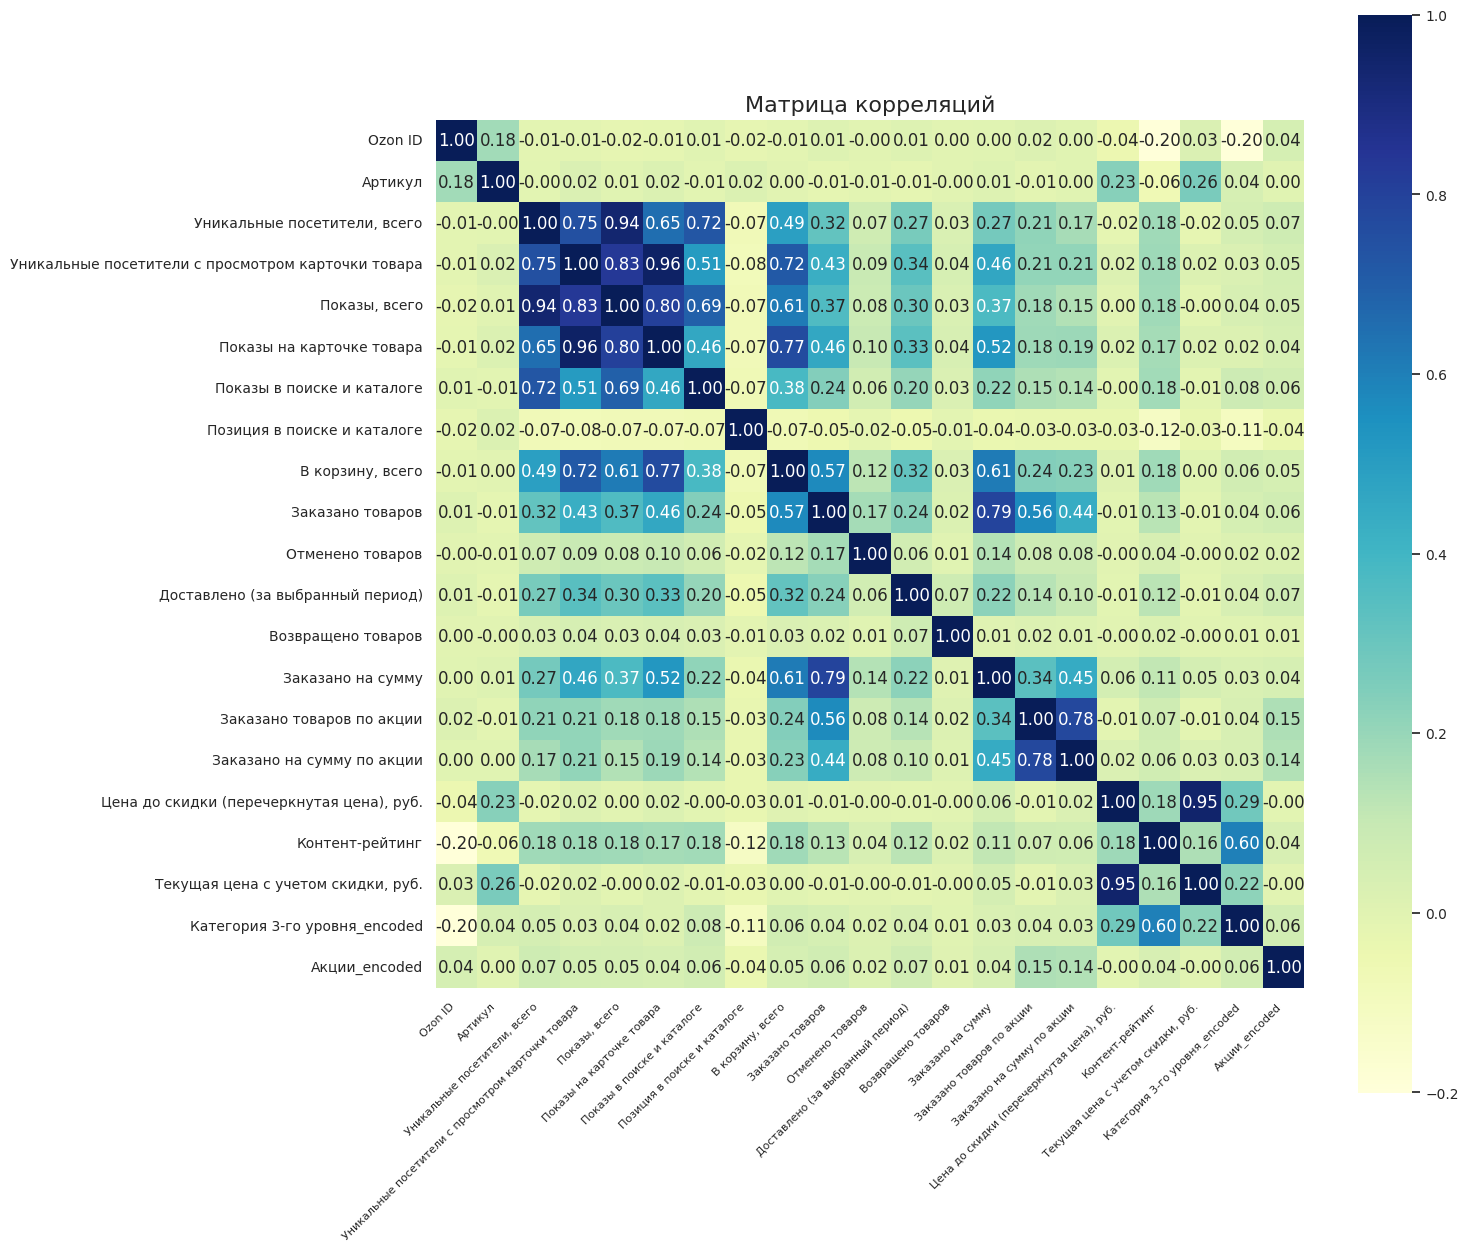

In [87]:
plt.figure(figsize=(14, 14), dpi=100)
heatmap = sns.heatmap(data=baza_analysts_promotions.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:**

- Присутствует явная зависимость Категорий от Контент-рейтинга (0,6) и Цены товара(0,29) и (0,22).   
- Также существует явная зависимость Заказано товаров от Заказано товаров по акции(0,56) и Заказано на сумму по акции (0,44).  
- Есть сильная зависимость прохождения товаров по воронке продаж.  
- В датасет «просочились» признаки, в общем отвечающие за одно и то же. Например: Показы,всего и Уникальные посетители всего (0,94), Уникальные посетители с просмотром карточки товара и Показы на карточке товара (0,96).  Если коэффициент корреляции между двумя признаками слишком большой (часто больше 0.8), с линейной регрессией возникнут проблемы. А именно — нерепрезентативные веса и переобученная под эти признаки модель.

 Чтобы избавиться от мультиколлинеарности, можно их удалять.  
 Но кроме ручного удаления скоррелированных признаков, есть регуляризация.  
 Но об этом мы поговорим позже.  


### **1.4 Для карточек товара лампы, лампы ксенон, фары - выявить влияние заполненности КТ на количество заказов товара.**

Посмотрим, какие уникальные данные находятся в столбце `Контент-рейтинг`:

In [88]:
unique_baza_analysts_promotions =baza_analysts_promotions['Контент-рейтинг'].unique()
print(unique_baza_analysts_promotions)

[35.  40.  45.   0.   5.  15.  10.  30.  12.5 22.5 52.5 20.  25.   7.5
 32.5 37.5 27.5 17.5]


Переименуем столбец `Категория 3-го уровня_encoded`, чтобы в запросе query не было ошибки:

In [89]:
baza_analysts_promotions.rename(columns={'Категория 3-го уровня_encoded': 'Категория_encoded'}, inplace=True)

#### **1.4.1 Для карточек товара категории "Лампа автомобильная", выявить влияние заполненности КТ на количество заказов товара.**

In [90]:
# Фильтруем данные по категории автомобильные фары
auto_lamp = baza_analysts_promotions.query('Категория_encoded == 4').copy()
auto_lamp.describe()

Ozon ID       Артикул  Уникальные посетители, всего  \
count  8.921000e+03   8921.000000                   8921.000000   
mean   8.161232e+08  27342.037664                     98.528752   
std    7.594556e+07   8528.407280                    500.526547   
min    2.609120e+08    161.000000                      0.000000   
25%    8.001840e+08  26964.000000                      4.000000   
50%    8.443294e+08  28939.000000                     11.000000   
75%    8.443342e+08  30932.000000                     35.000000   
max    9.660180e+08  34601.000000                   9518.000000   

       Уникальные посетители с просмотром карточки товара  Показы, всего  \
count                                        8921.000000     8921.000000   
mean                                            2.868400      159.724358   
std                                             7.616653      832.686164   
min                                             0.000000        0.000000   
25%                                             0.000000        5.000000   
50%                                             0.000000       14.000000   
75%                                             2.000000       48.000000   
max                                           105.000000    17430.000000   

       Показы на карточке товара  Показы в поиске и каталоге  \
count                8921.000000                 8921.000000   
mean                    4.274745                   62.633673   
std                    11.680834                  479.027357   
min                     0.000000                    0.000000   
25%                     0.000000                    1.000000   
50%                     0.000000                    5.000000   
75%                     3.000000                   17.000000   
max                   145.000000                 8430.000000   

       Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
count                  8921.000000       8921.000000       8921.000000   
mean                     83.998271          0.407578          0.119830   
std                     141.027838          1.565464          0.649672   
min                       0.000000          0.000000          0.000000   
25%                      13.000000          0.000000          0.000000   
50%                      49.000000          0.000000          0.000000   
75%                      97.500000          0.000000          0.000000   
max                    3392.440000         31.000000         18.000000   

       Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
count       8921.000000                       8921.000000         8921.000000   
mean           0.005156                          0.111647            0.001906   
std            0.095740                          0.619996            0.056987   
min            0.000000                          0.000000            0.000000   
25%            0.000000                          0.000000            0.000000   
50%            0.000000                          0.000000            0.000000   
75%            0.000000                          0.000000            0.000000   
max            2.000000                         14.000000            2.000000   

       Заказано на сумму  Заказано товаров по акции  \
count        8921.000000                8921.000000   
mean          214.678399                   0.044726   
std          1373.422486                   0.438755   
min             0.000000                   0.000000   
25%             0.000000                   0.000000   
50%             0.000000                   0.000000   
75%             0.000000                   0.000000   
max         26600.000000                  18.000000   

       Заказано на сумму по акции  Цена до скидки (перечеркнутая цена), руб.  \
count                 8921.000000                                8921.000000   
mean                    55.431678                                1787.305907   
std          

Проведём исследования о топ-товарах в категории 4 (автомобильные лампы):


In [91]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_lamp.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 4 (автомобильные лампы):")
print(top_10_items)

Топ-10 товаров для категории 4 (автомобильные лампы):
                                             Товары  Заказано товаров
0               Лампа Osram H7 Original 64210 (1шт)               246
1  Ксеноновая лампа D1S OSRAM 66140 Original Xenarc               202
2  Ксеноновая лампа D2S OSRAM 66240 Xenarc Original               167
3  Ксеноновая лампа D4S OSRAM 66440 Xenarc Original               124
4              Лампа Osram H11 Original 64211 (1шт)                69
5       Автолампа GNX Vega W21/5W LED красная (1шт)                20
6       Автолампа GNX Vega P21W LED оранжевая (1шт)                16
7    Автолампа GNX WY21W LED оранжевая canbus (1шт)                14
8     Автолампа GNX Vega P27/7W LED оранжевая (1шт)                14
9         Автолампа GNX Vega W21W LED красная (1шт)                12


Для начала, построим график зависимости контент-рейтинга от количества заказов

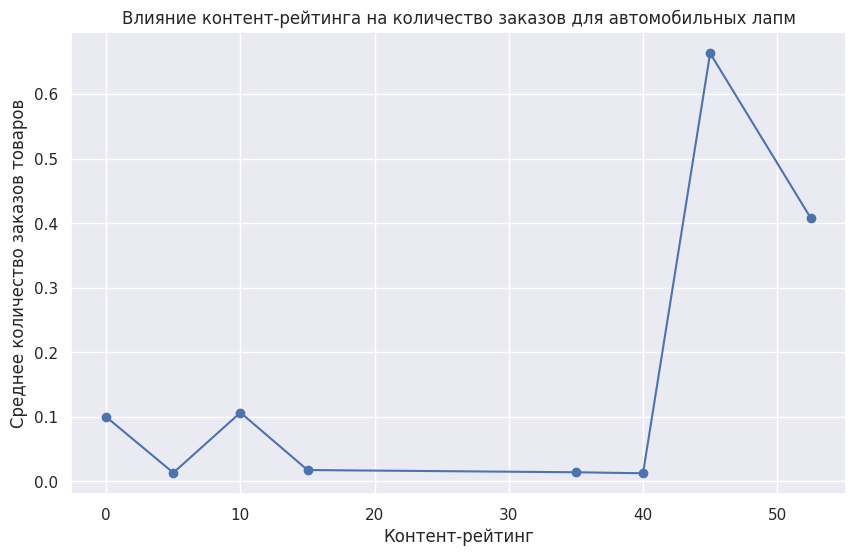

In [92]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_lamp.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов для автомобильных лапм')
plt.show()

На графике мы видим не однозначную картину: до рейтинга "40" зависимости кол-ва заказов от контент-рейтинга не наблюдается, после рейтинга "40" резкий скачок. Нужно провести доп.исследования: возможно есть выбросы и другие аномалии в данных.

**Градиентный бустинг:**  

Для выявления влияния контент-рейтинга на количество заказов товара в категории "автомобильные лампы" мы применим модель градиентного бустинга.  

Задача предсказания количества заказов является задачей регрессии, так как она предполагает непрерывные числовые значения в качестве целевой переменной.   

Когда мы имеем дело с задачей регрессии, градиентный бустинг обычно является хорошим выбором. Градиентный бустинг - это мощный ансамблевый метод, который строит последовательность деревьев решений и улучшает их путем минимизации градиента функции потерь.  
 Он может моделировать сложные нелинейные зависимости и обычно показывает хорошее качество предсказаний даже на небольших объемах данных. К тому же, градиентный бустинг обладает способностью обнаруживать важные признаки и учитывать их в моделировании.

Поэтому, на основании этой информации и из-за возможности градиентного бустинга построить хорошие прогнозы в задаче регрессии, я и предложила использовать градиентный бустинг.  


In [93]:
# Выделение признаков и целевой переменной
features = auto_lamp[['Контент-рейтинг']]
target = auto_lamp['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2663007531505272


В результате запуска кода, получено значение среднеквадратической ошибки (MSE) равное 0.2663007531505272.

Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказанных товаров на основе контент-рейтинга для категории "автомобильные лампы".

Для более полной оценки модели градиентного бустинга, будем использовать следующие метрики:  
1. Средняя абсолютная ошибка (MAE): MAE измеряет среднюю абсолютную разницу между фактическими и прогнозируемыми значениями. Чем ближе значение MAE к нулю, тем лучше модель. Можно рассчитать MAE с использованием функции mean_absolute_error из модуля sklearn.metrics.  

2. Коэффициент детерминации (R^2): R^2 измеряет долю объясненной дисперсии в целевой переменной. Значение R^2 варьируется от 0 до 1, где 1 означает идеальное соответствие прогнозируемых значений фактическим. Можно рассчитать R^2 с использованием метода score модели.  

In [94]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.19907335498696074
R^2 Score: -0.005892087488961417


Исходя из результатов, полученных при расчете MAE и R^2, можно сделать следующие общие выводы:    

1. Средняя абсолютная ошибка (MAE) равна 0.19907335498696074. Это означает, что средняя абсолютная разница между фактическими и прогнозируемыми значениями равна 0.199. Чем меньше значение MAE, тем точнее прогнозы модели. В данном случае, полученное значение MAE достаточно низкое, что указывает на хорошую предсказательную способность модели.  

2. Коэффициент детерминации (R^2) равен -0.005892087488961417. Значение R^2 варьируется от -inf до 1, где 1 означает идеальное соответствие прогнозируемых значений фактическим. Отрицательное значение R^2 может указывать на то, что модель не объясняет дисперсию в данных и предсказания не лучше случайных гаданий.   

С учетом полученных результатов, можно сказать, что модель градиентного бустинга на основе контент-рейтинга для категории "автомобильные лампы" может предсказывать количество заказанных товаров с некоторой точностью, как указывает низкая средняя абсолютная ошибка (MAE). Однако, отрицательное значение коэффициента детерминации (R^2) указывает на то, что модель не объясняет дисперсию в данных и не лучше случайного угадывания значений.  


**Общий вывод:**  
 **В итоге, модель градиентного бустинга позволяет предсказывать количество заказов товара на основе контент-рейтинга в категории "автомобильные лампы" с хорошей точностью.**     
  **Средняя абсолютная ошибка (MAE) составляет 0.19907335498696074, а среднеквадратическая ошибка (MSE) - 0.2663007531505272.**     
  **Однако, коэффициент детерминации (R^2) равен -0.005892087488961417, что означает, что модель не объясняет дисперсию в данных и требует дальнейшего улучшения.**    
   **Рекомендуется провести более глубокий анализ данных, настроить параметры модели и, возможно, исследовать альтернативные модели машинного обучения для улучшения качества предсказаний.**   

#### **1.4.2 Для карточек товара категории "Автомобильная фара", выявить влияние заполненности КТ на количество заказов товара.**

In [95]:
# Фильтруем данные по категории автомобильные фары
auto_fars = baza_analysts_promotions.query('Категория_encoded == 6').copy()
auto_fars.describe()

Ozon ID       Артикул  Уникальные посетители, всего  \
count  9.065000e+04  90650.000000                  90650.000000   
mean   5.127844e+08  28182.284545                     65.207910   
std    5.798783e+07   4595.703006                    258.158421   
min    2.754937e+08    343.000000                      0.000000   
25%    5.115723e+08  26789.000000                      4.000000   
50%    5.115731e+08  29140.000000                     14.000000   
75%    5.226468e+08  30080.000000                     44.000000   
max    8.810331e+08  34227.000000                  12798.000000   

       Уникальные посетители с просмотром карточки товара  Показы, всего  \
count                                       90650.000000    90650.000000   
mean                                            2.277904      108.634429   
std                                             7.408972      417.107046   
min                                             0.000000        0.000000   
25%                                             0.000000        6.000000   
50%                                             0.000000       21.000000   
75%                                             2.000000       69.000000   
max                                           261.000000    20098.000000   

       Показы на карточке товара  Показы в поиске и каталоге  \
count               90650.000000                90650.000000   
mean                    3.448582                   41.024468   
std                    11.329578                  109.145803   
min                     0.000000                    0.000000   
25%                     0.000000                    2.000000   
50%                     0.000000                   10.000000   
75%                     2.000000                   32.000000   
max                   308.000000                 4115.000000   

       Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
count                 90650.000000      90650.000000      90650.000000   
mean                    111.235063          0.311076          0.051693   
std                     145.554986          1.064806          0.273480   
min                       0.000000          0.000000          0.000000   
25%                      28.000000          0.000000          0.000000   
50%                      79.920000          0.000000          0.000000   
75%                     147.560000          0.000000          0.000000   
max                    3808.260000         22.000000          6.000000   

       Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
count      90650.000000                      90650.000000        90650.000000   
mean           0.003078                          0.045207            0.000750   
std            0.061436                          0.253183            0.028945   
min            0.000000                          0.000000            0.000000   
25%            0.000000                          0.000000            0.000000   
50%            0.000000                          0.000000            0.000000   
75%            0.000000                          0.000000            0.000000   
max            3.000000                          8.000000            2.000000   

       Заказано на сумму  Заказано товаров по акции  \
count       90650.000000               90650.000000   
mean          170.812686                   0.018533   
std           958.138558                   0.170942   
min             0.000000                   0.000000   
25%             0.000000                   0.000000   
50%             0.000000                   0.000000   
75%             0.000000                   0.000000   
max         31004.000000                   5.000000   

       Заказано на сумму по акции  Цена до скидки (перечеркнутая цена), руб.  \
count                90650.000000                               90650.000000   
mean                    57.627159                                8109.907402   
std          

Проведём исследования о топ-товарах в категории 6 (автомобильные фары):

In [96]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_fars.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 6 (автомобильные фары):")
print(top_10_items)

Топ-10 товаров для категории 6 (автомобильные фары):
                                              Товары  Заказано товаров
0  Биксеноновая линза GNX Hella 3R Crystal Vision...               356
1  Стекла фар Mazda 3 BK седан 2003-2009, комплек...               177
2                 Линзы для фар GNX Hella 3R H7, D2S               155
3  Стекло фары Mazda 6 GH (2007 - 2012), левое, G...               146
4  Стекло фары Mazda 6 GH (2007 - 2012), правое, ...               142
5  Стекла на фары Toyota Camry V40 2006-2009, ком...               114
6  Стекла для фар Volkswagen Passat B5 1996-2000,...               108
7  Стекло фары Ford Focus 2 2008-2010, левое, GNX...               102
8  Стекло фары Mazda 3 BK седан (2003 - 2009 г.в....                90
9  Стекло фары Mazda 3 BK седан (2003 - 2009 г.в....                78


Для начала, построим график зависимости контент-рейтинга от количества заказов

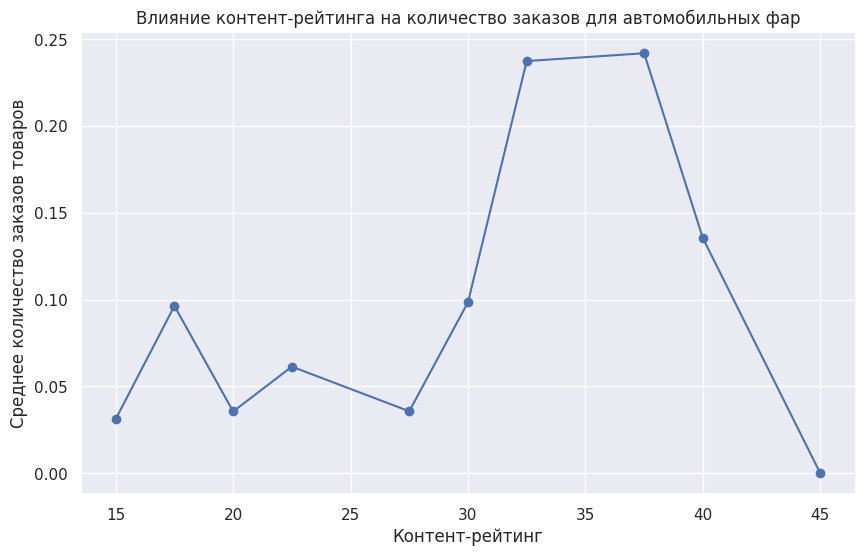

In [97]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_fars.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов для автомобильных фар')
plt.show()

На графике мы видим не однозначную картину: существует зависимость числа рейтинга на рост заказов. Но для контент-рейтинга с числом "45" количество заказов обнуляется. Нужно провести доп.исследования: возможно есть выбросы и другие аномалии.

Продолжим наше исследование и построим градиентный бустинг:  

In [98]:
# Выделение признаков и целевой переменной
features = auto_fars[['Контент-рейтинг']]
target = auto_fars['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06997570382980053


Результаты модели показывают среднеквадратическую ошибку (MSE) равную 0.06997570382980053. Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказов товара.

Таким образом, наша модель градиентного бустинга демонстрирует хорошие результаты для предсказания количества заказов товара в 6-й категории. Ошибки модели достаточно низкие, что указывает на хорошую точность предсказаний.  
 Найдем MAE и коэффициент детерминации R^2:  

In [99]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.09511900190751414
R^2 Score: 0.03845511493957099


MAE составила 0.09511900190751414 и показывает среднюю абсолютную разницу между фактическими и прогнозируемыми значениями. Более низкое значение MAE указывает на более точные прогнозы модели.

Коэффициент детерминации (R^2) равен 0.03845511493957099. Значение R^2 варьируется от 0 до 1, где значение ближе к 1 указывает на лучшее соответствие прогнозируемых значений фактическим. Полученное значение R^2 говорит о том, что модель не достаточно хорошо объясняет дисперсию в данных и прогнозы не лучше случайных гаданий.  

**Вывод:**  
 **Таким образом, модель градиентного бустинга в данном случае показывает некоторую способность предсказывать количество заказов товаров в 6-й категории, но она требует дальнейшего улучшения для более точных прогнозов.**    

#### **1.4.3 Для карточек товара категории "Комплектующие для ксеноновых фар", выявить влияние заполненности КТ на количество заказов товара.**

In [100]:
# Фильтруем данные по категории Комплектующие для ксеноновых фар
auto_xenon = baza_analysts_promotions.query('Категория_encoded == 2').copy()
auto_xenon.describe()

Ozon ID        Артикул  Уникальные посетители, всего  \
count  1.354370e+05  135437.000000                 135437.000000   
mean   5.506961e+08   27619.627244                     40.292010   
std    6.755480e+07    9224.734438                    167.707025   
min    4.975441e+08     139.000000                      0.000000   
25%    5.015899e+08   26858.000000                      4.000000   
50%    5.106641e+08   30357.000000                      9.000000   
75%    5.798428e+08   33634.000000                     25.000000   
max    9.046040e+08   34216.000000                   6269.000000   

       Уникальные посетители с просмотром карточки товара  Показы, всего  \
count                                      135437.000000   135437.000000   
mean                                            1.743866       76.005464   
std                                            10.885653      386.392922   
min                                             0.000000        0.000000   
25%                                             0.000000        4.000000   
50%                                             0.000000       12.000000   
75%                                             1.000000       38.000000   
max                                           838.000000    17807.000000   

       Показы на карточке товара  Показы в поиске и каталоге  \
count              135437.000000               135437.000000   
mean                    2.828776                   19.474014   
std                    19.304927                   74.675714   
min                     0.000000                    0.000000   
25%                     0.000000                    2.000000   
50%                     0.000000                    5.000000   
75%                     1.000000                   14.000000   
max                  1665.000000                 4393.000000   

       Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
count                135437.000000     135437.000000     135437.000000   
mean                    152.447334          0.160414          0.024292   
std                     204.196375          1.221306          0.225813   
min                       0.000000          0.000000          0.000000   
25%                      36.500000          0.000000          0.000000   
50%                      99.000000          0.000000          0.000000   
75%                     191.000000          0.000000          0.000000   
max                    4584.000000        106.000000         15.000000   

       Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
count     135437.000000                     135437.000000       135437.000000   
mean           0.001078                          0.023000            0.000458   
std            0.036440                          0.216315            0.023370   
min            0.000000                          0.000000            0.000000   
25%            0.000000                          0.000000            0.000000   
50%            0.000000                          0.000000            0.000000   
75%            0.000000                          0.000000            0.000000   
max            4.000000                         12.000000            2.000000   

       Заказано на сумму  Заказано товаров по акции  \
count      135437.000000              135437.000000   
mean           93.798334                   0.005995   
std          1279.048077                   0.107637   
min             0.000000                   0.000000   
25%             0.000000                   0.000000   
50%             0.000000                   0.000000   
75%             0.000000                   0.000000   
max        101526.000000                   9.000000   

       Заказано на сумму по акции  Цена до скидки (перечеркнутая цена), руб.  \
count               135437.000000                              135437.000000   
mean                    19.447743                                5168.724905   
std 

Проведём исследования о топ-товарах в категории 2 (Комплектующие для ксеноновых фар):

In [101]:
# Группировка данных по товарам и подсчет числа заказанных товаров
top_items = auto_xenon.groupby('Товары')['Заказано товаров'].sum().reset_index()

# Сортировка топ-товаров по количеству заказанных товаров
top_items = top_items.sort_values(by='Заказано товаров', ascending=False).reset_index(drop=True)

# Вывод топ-10 товаров
top_10_items = top_items.head(10)
print("Топ-10 товаров для категории 2 (Комплектующие для ксеноновых фар):")
print(top_10_items)

Топ-10 товаров для категории 2 (Комплектующие для ксеноновых фар):
                                              Товары  Заказано товаров
0           Бигалогенная линза GNX Hella 3R H7 (2шт)               463
1          Светодиодные линзы Eneg A3 MAX (комплект)               423
2  Биксеноновая линза GNX Hella 3R Crystal Vision...               167
3     Биксеноновая линза GNX Hella 5R Diamond Vision                97
4  Переходная рамка Mazda 6 gg 2002-2008 Hella 3R...                72
5   Линзы GNX Mini H1 2.5 дюйма ксенон/галоген (2шт)                68
6  Переходная рамка Mazda 3 BK 03-09 для линз Hel...                64
7       Светодиодные линзы GNX Silver 3.0 (комплект)                62
8  Линзы Hella 3R H7 для фар Nissan Almera N16 20...                61
9  Отражатели Ford Focus 3 11-15 для линз Hella 3...                51


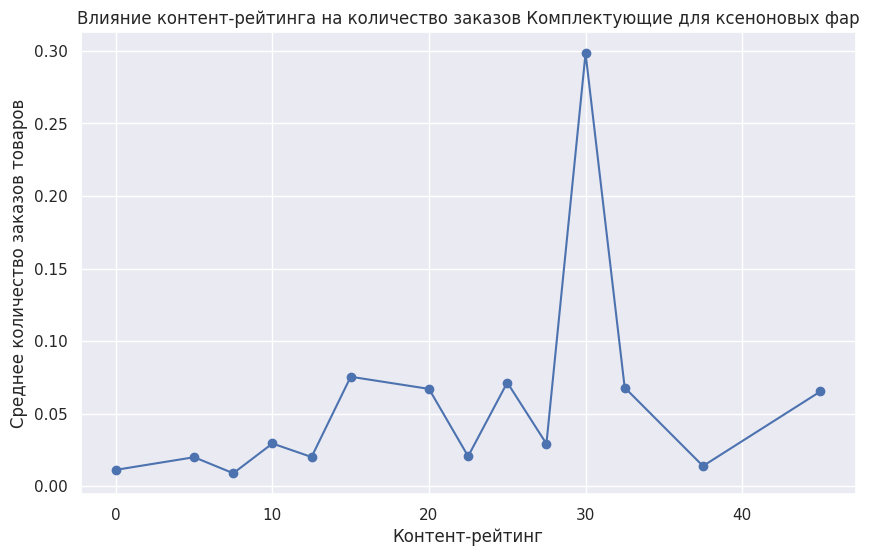

In [102]:
# Группировка данных по контент-рейтингу и расчет среднего количества заказов товара
avg_orders_by_rating = auto_xenon.groupby('Контент-рейтинг')['Заказано товаров'].mean()

# Построение графика зависимости контент-рейтинга от количества заказов
plt.figure(figsize=(10, 6))
plt.plot(avg_orders_by_rating.index, avg_orders_by_rating.values, marker='o')
plt.xlabel('Контент-рейтинг')
plt.ylabel('Среднее количество заказов товаров')
plt.title('Влияние контент-рейтинга на количество заказов Комплектующие для ксеноновых фар')
plt.show()

На графике мы видим также неоднозначную картину: существует зависимость числа рейтинга на рост заказов. Но для контент-рейтинга с числом от "30" до "40" количество заказов почти обнуляется. Нужно провести доп.исследования: возможно есть выбросы или другие аномалии в данных

Продолжим наше исследование и построим градиентный бустинг:

In [103]:
# Выделение признаков и целевой переменной
features = auto_xenon[['Контент-рейтинг']]
target = auto_xenon['Заказано товаров']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе и оценка модели
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04825353167127476


Значение среднеквадратической ошибки (MSE) составляет 0.04825353167127476. MSE показывает среднеквадратическую разницу между фактическими и прогнозируемыми значениями. Чем ближе значение MSE к нулю, тем лучше модель способна предсказывать количество заказанных товаров.

Таким образом, модель градиентного бустинга в данном случае показывает хорошие результаты с низким значением MSE. Это указывает на высокую точность предсказаний модели для количества заказов товаров во 2-й категории.

По результатам исследования можно заключить, что модель градиентного бустинга хорошо предсказывает количество заказов товаров для 2-й категории на основе контент-рейтинга. Однако, для полноценной оценки модели нужно также учесть другие метрики и провести дополнительные анализы, такие как средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).   

In [104]:
# Прогнозирование на тестовом наборе
predictions = model.predict(X_test)

# Расчет и вывод MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

# Расчет и вывод R^2
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

Mean Absolute Error: 0.04652746381236374
R^2 Score: 0.03845986704095217


**Полученные результаты показывают, что модель имеет невысокую точность предсказаний с Mean Squared Error (MSE) приблизительно равным 0.0483, Mean Absolute Error (MAE) равным 0.0465 и R^2 Score равным 0.0385.**   

#### **1.4.4 Общий вывод**

В данном решении был проведен анализ влияния контент-рейтинга на количество заказов товаров категорий "автомобильные фары", "комплектующие для ксеноновых фар" и "автомобильных ламп" - 6,2 и 4 категории соответственно, с использованием модели градиентного бустинга из библиотеки scikit-learn.

Полученные результаты показывают, что модель имеет невысокую точность предсказаний с MSE ,MAE и R^2 Score.

Поэтому, можно рассмотреть другие методы машинного обучения, а также провести дополнительную предобработку данных или использовать другие признаки для более точного предсказания количества заказов товаров.

## **2. Эксперименты для решения задачи: ML-регрессия, временные ряды.**

### **2.1 ML-регрессия эксперименты для ПРЕДСКАЗАНИЯ метрики: Заказано товаров**

🎓 В данном коде мы решили применить модели машинного обучения для предсказания количества заказанных товаров.  

Целевая переменная в нашем случае представляет собой количество товаров, которое было заказано.  

С учётом наиболее грамотного разбиения на train/test, возможных вариантов алгоритмов и подходящих для данной задачи метрик, мы сравним модели и выбрать лучшую.  

Создадим список моделей для алгоритмов:  
Lasso(),  
Ridge(),  
DecisionTreeRegressor(),  
RandomForestRegressor(),  
GradientBoostingRegressor(),  

Напишем функцию, которая будет обучать каждую модель на train-выборке, делать прогноз на тестовых данных и выводить метрики MSE, MAE, R2, а также MAPE.   

🎓 Простые линейные модели нетрудно реализовать и легко интерпретировать. Однако и они дают сбои. Например, из-за мультиколлинеарности.  
В разделе 1.3 мы установили, что в наш датасет «просочились» признаки, в общем отвечающие за одно и то же. Мультиколлинеарность возникает, когда есть группа линейно зависимых признаков — взаимозависимых или очень сильно скоррелированных.
Чтобы избавиться от мультиколлинеарности, мы будем проводить регуляризацию.  
 У линейных моделей регуляризация — ограничение веса.  
 Ограничить можно двумя способами:  
1. **Lasso-регрессия** - модель линейной регрессии со встроенной L1-регуляризацией весов (ограничение на сумму модулей весов).   
2. **Ridge-регрессия** - модель линейной регрессии со встроенной L2-регуляризацией весов (ограничение на сумму квадратов весов).       




#### **2.1.1 ML-регрессия эксперименты: Lasso-регрессия и Ridge-регрессия**

🖥 Вернёмся к задаче про Заказы товаров.   
- Применим к ней линейный алгоритм. Объявим нашу модель как элемент класса Lasso (линейная модель с L1-регуляризацией) из модуля linear_model sklearn. Обучим модель и сделаем прогноз для тестовой выборки.  
- Воспользуемся важным преимуществом линейных моделей и посмотрим на значения коэффициентов, соответствующих оптимальной функции. Создадим датафрейм features: признаки поместим в столбец feature, значения коэффициентов — в столбец coeff, а модули значений коэффициентов — в coeff_abs. Выведим датафрейм на экран, отсортировав его по модулю коэффициента (coeff_abs) в порядке убывания.
Посмотрим: какие признаки оказались в топе?
Посмотрим на весь датафрейм с признаками. Коэффициенты при каких признаках стали равными нулю в результате обработки алгоритмом Lasso и Ridge?  

In [105]:
from sklearn.preprocessing import StandardScaler # для стандартизации признаков. Он масштабирует признаки таким образом,
                                                #чтобы они имели среднее значение 0 и стандартное отклонение 1.
from sklearn.linear_model import Lasso, Ridge # являются линейными моделями регрессии.
                                              #Они используются для аппроксимации линейной зависимости между признаками
                                              # и целевой переменной, при этом минимизируя сумму квадратов отклонений.
from sklearn.tree import DecisionTreeRegressor # является моделью регрессии на основе решающих деревьев.
                                               #Он используется для построения дерева решений, которое разбивает данные на более
                                              #мелкие подгруппы с целью предсказания значений целевой переменной.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # RandomForestRegressor является ансамблевой
                                              #моделью регрессии на основе случайных лесов. Он используется для комбинирования нескольких
                                              #деревьев решений, чтобы получить более точные предсказания.
                                              # GradientBoostingRegressor является ансамблевой моделью регрессии,
                                              # но на этот раз на основе градиентного бустинга.
                                              #Он используется для последовательного создания и добавления моделей,
                                              #чтобы снизить ошибку прогнозирования.
from sklearn.metrics import mean_absolute_error, mean_squared_error #mean_absolute_error используется для вычисления средней
                                              #абсолютной ошибки между прогнозируемыми и фактическими значениями.
                                              #mean_squared_error используется для вычисления средней квадратичной ошибки
                                              # между прогнозируемыми и фактическими значениями.

Для обучения нашей модели выполним дополнительные преобразования:

In [106]:
# Удаляем столбцы col1 и col2
baza_analysts_promotions_model = baza_analysts_promotions.drop(['Категория 3-го уровня', 'Товары', 'Модель','Акции','День'], axis=1)

In [107]:
#Изменим тип данных
#baza_analysts_promotions_model['День'] = pd.to_numeric(baza_analysts_promotions_model['День'].astype(int))

In [108]:
#Посмотрим уникальные значения в столбце "Заказано товаров"
unique_baza_analysts_promotions_model =baza_analysts_promotions_model['Заказано товаров'].unique()
unique_baza_analysts_promotions_model

array([ 0,  1,  2,  3,  6,  4,  8, 10, 18,  5,  7,  9, 16, 20, 15, 11])

In [109]:
# Подсчет количества заказов для каждого значения
order_counts = baza_analysts_promotions_model['Заказано товаров'].value_counts()

# Вывод результата
print(order_counts)

0     229837
1       5347
2       1081
3        192
4        120
5         39
6         28
7         12
8         11
10         9
9          4
18         1
16         1
20         1
15         1
11         1
Name: Заказано товаров, dtype: int64


В наших данных только 3% -заказано товаров, или другими словами конверсия продаж.  

In [110]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = baza_analysts_promotions_model.drop('Заказано товаров', axis=1)
y = baza_analysts_promotions_model['Заказано товаров']

In [111]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Построим гистограммы целевой переменной - 'Заказано товаров' на обучающей и валидационной выборках методом kdeplot() библиотеки seaborn. Посмотрим как они различаются.

<Axes: xlabel='Заказано товаров', ylabel='Density'>

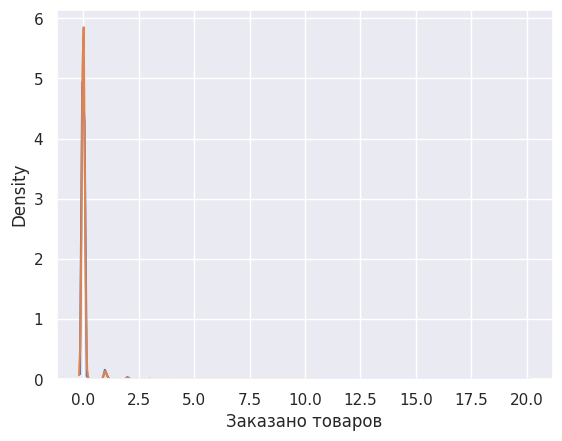

In [112]:
# гистограмма целевой переменной на train
sns.kdeplot(y_train, bw_adjust=2)
# гистограмма целевой переменной на test
sns.kdeplot(y_test, bw_adjust=2)

Из графика мы видим, что между данными обучающей и валидационной выборках нет различий. Кроме того, большая часть данных столбца `"Заказано товаров"` содержит нулевые значения.

In [113]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для нашей модели
model = Lasso()

# обучим модель
model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test_st)

# создадим датафрейм с признаками и их весами
features = pd.DataFrame({'feature':X_train.columns, 'coeff': model.coef_})# воспользуйтемся методом coef_
features['coeff_abs'] = features['coeff'].abs()


# выведим упорядоченный по модулю коэффициентов датафрейм с признаками
print(features.sort_values(by='coeff_abs', ascending=False))

                                              feature  coeff  coeff_abs
0                                             Ozon ID    0.0        0.0
1                                             Артикул   -0.0        0.0
18                                  Категория_encoded    0.0        0.0
17                 Текущая цена с учетом скидки, руб.   -0.0        0.0
16                                    Контент-рейтинг    0.0        0.0
15          Цена до скидки (перечеркнутая цена), руб.   -0.0        0.0
14                         Заказано на сумму по акции    0.0        0.0
13                          Заказано товаров по акции    0.0        0.0
12                                  Заказано на сумму    0.0        0.0
11                                 Возвращено товаров    0.0        0.0
10                   Доставлено (за выбранный период)    0.0        0.0
9                                    Отменено товаров    0.0        0.0
8                                    В корзину, всего    0.0    

Модель Lasso применяет регуляризацию, которая штрафует модель за включение сильно коррелирующих признаков, и, в итоге, зануляет их коэффициенты.   
Применим другие методы для регуляризации, такие как **Ridge регрессия**.  

In [114]:
# Задаем алгоритм Ridge регрессии
model = Ridge(alpha=1.0)  # Можно настраивать параметр alpha для регуляризации

# Обучаем модель
model.fit(X_train_st, y_train)

# Используем обученную модель для предсказания
predictions = model.predict(X_test_st)

# Выводим веса признаков
features = pd.DataFrame({'feature': X_train.columns, 'coeff': model.coef_})
features['coeff_abs'] = features['coeff'].abs()
print(features.sort_values(by='coeff_abs', ascending=False))

                                              feature     coeff  coeff_abs
12                                  Заказано на сумму  0.197925   0.197925
13                          Заказано товаров по акции  0.158235   0.158235
14                         Заказано на сумму по акции -0.094176   0.094176
4                                       Показы, всего -0.058678   0.058678
2                        Уникальные посетители, всего  0.053115   0.053115
8                                    В корзину, всего  0.027886   0.027886
9                                    Отменено товаров  0.012439   0.012439
17                 Текущая цена с учетом скидки, руб. -0.007942   0.007942
16                                    Контент-рейтинг  0.005554   0.005554
3   Уникальные посетители с просмотром карточки то...  0.005457   0.005457
19                                      Акции_encoded -0.004664   0.004664
5                           Показы на карточке товара -0.003472   0.003472
6                        

**Исходя из результатов модели Ridge регрессии, можно сделать следующие выводы:**  

- Наибольшее влияние на целевую переменную "Заказано товаров" оказывают признаки "Заказано на сумму", "Заказано товаров по акции" и "Заказано на сумму по акции". При увеличении значений этих признаков на единицу, ожидается увеличение значения целевой переменной.
- Некоторые другие признаки, такие как "Показы, всего", "Уникальные посетители, всего" и "В корзину, всего", также оказывают некоторое влияние на целевую переменную, но в меньшей степени.
- Остальные признаки имеют незначительное влияние на целевую переменную.

**Ridge регрессия** не только подходит для решения задачи регрессии, но и помогает справляться с негативным эффектом мультиколлинеарности среди признаков.  Однако, для полного анализа важно также учитывать статистическую значимость коэффициентов и проводить дополнительное исследование данных.

#### **2.1.2 ML-регрессия эксперименты: Проведем дополнительные исследования**

Функцией scatterplot() построим попарные корреляции между каждым признаком и целевой переменной(Заказано товаров):  

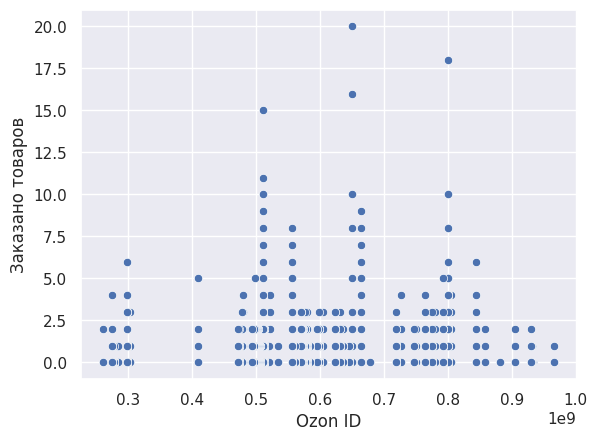

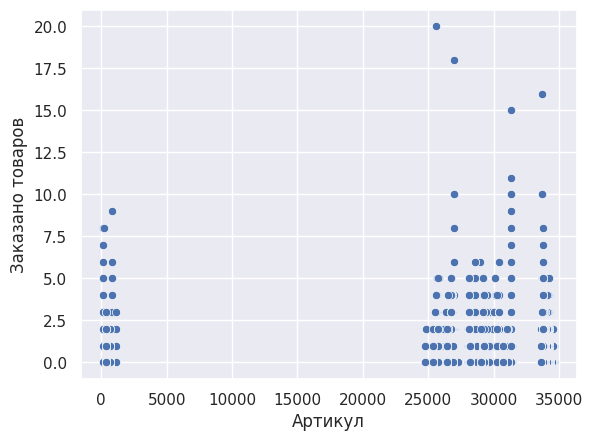

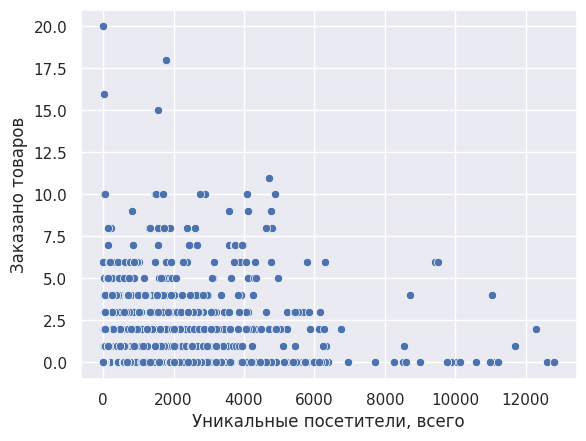

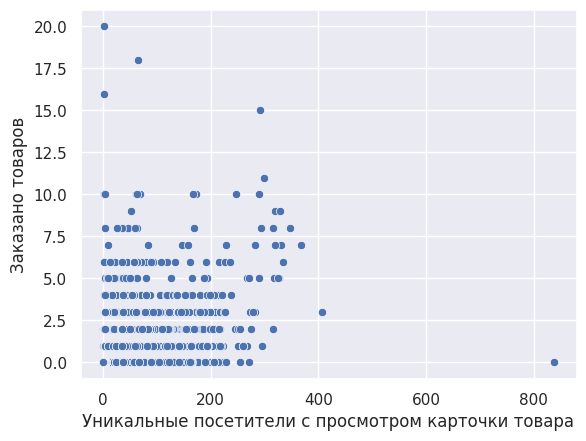

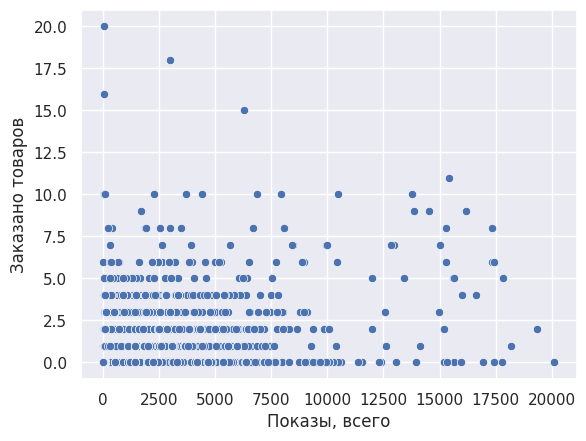

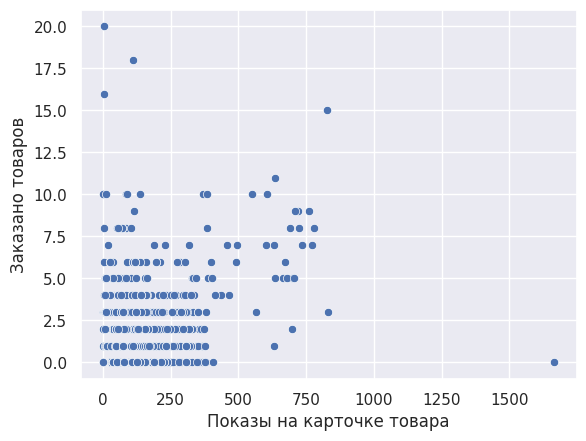

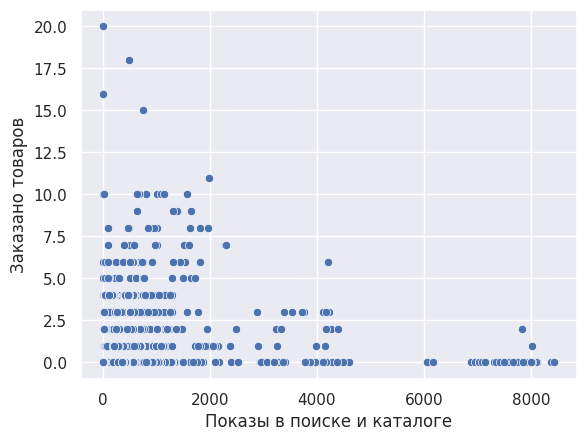

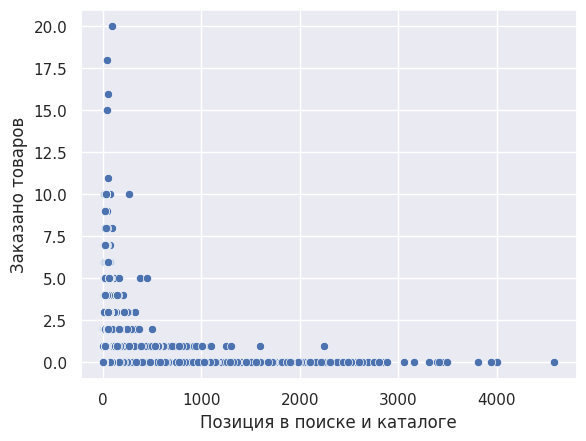

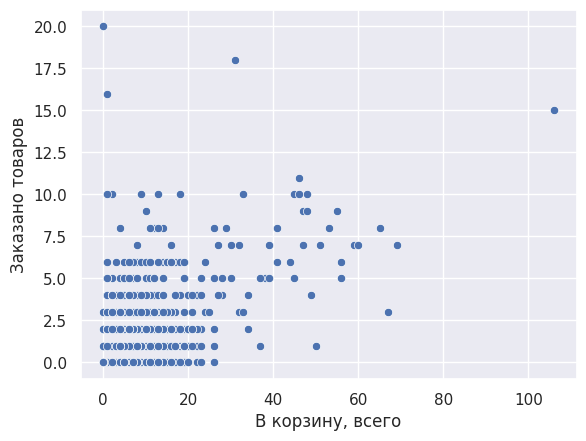

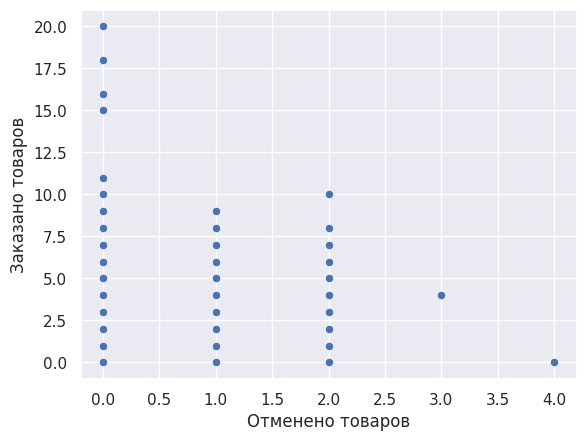

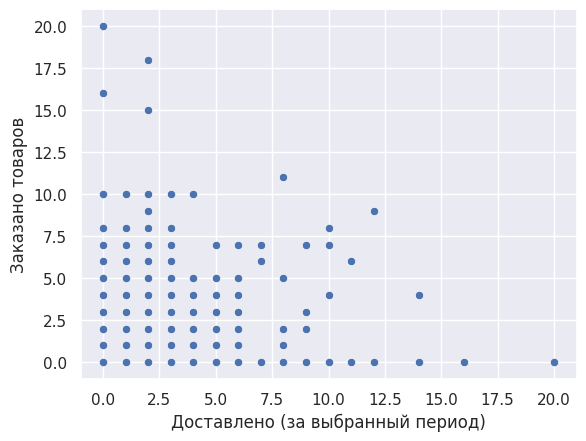

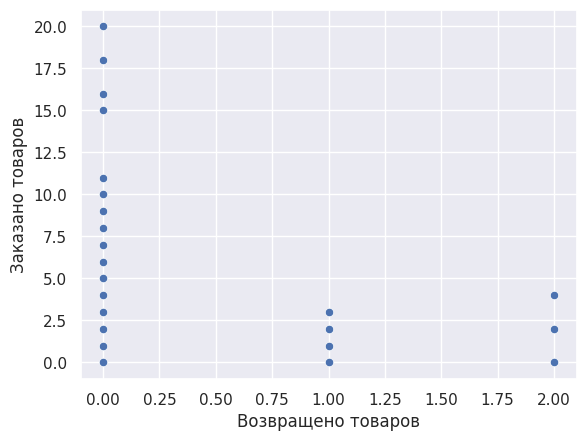

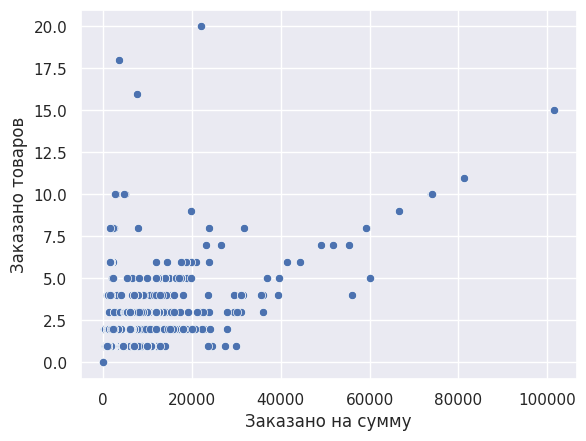

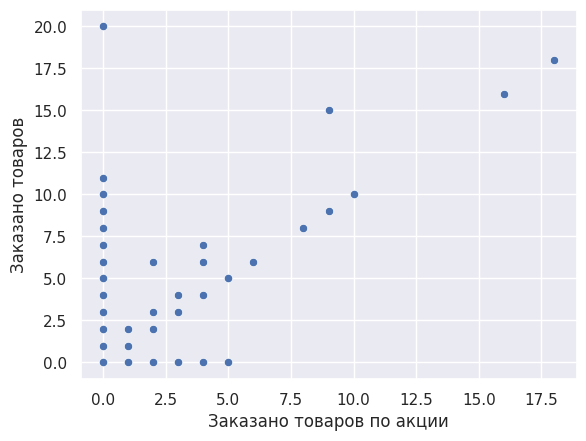

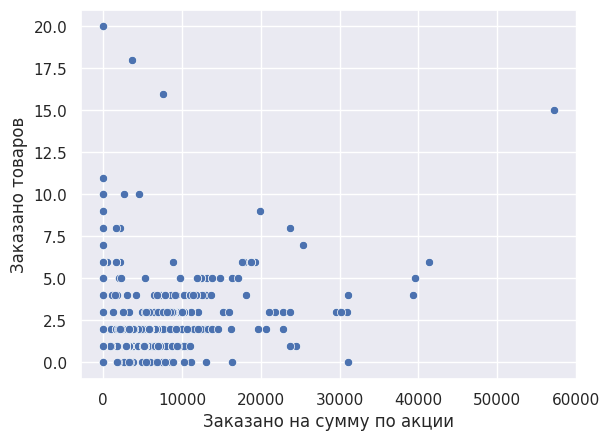

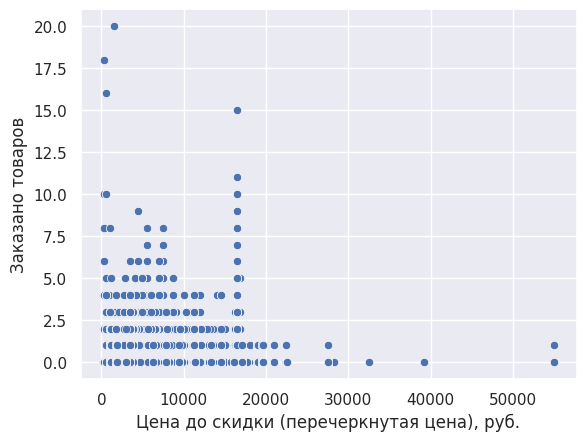

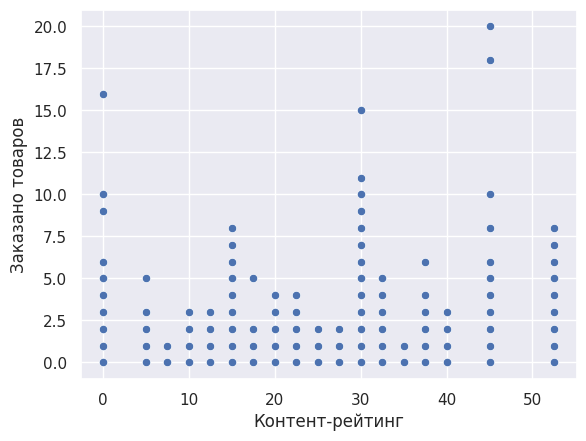

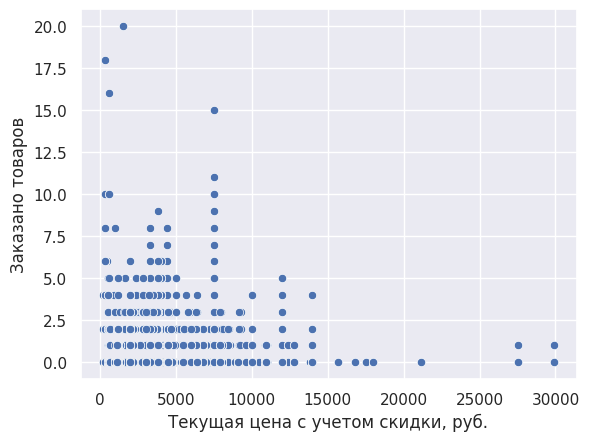

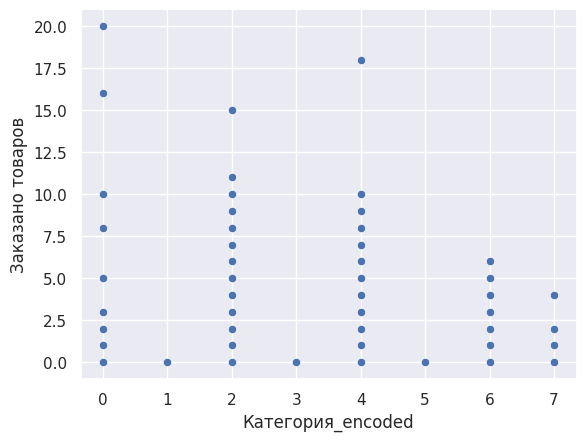

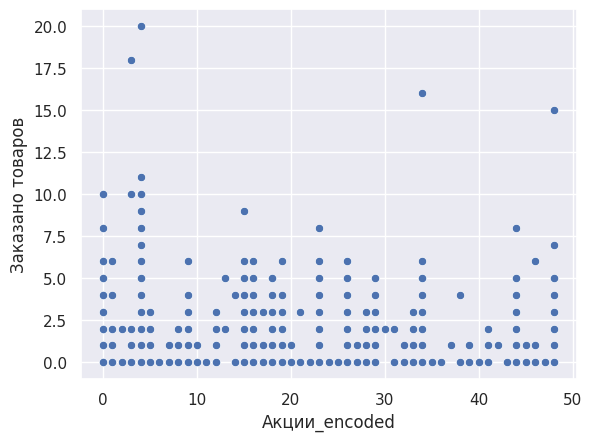

In [115]:
for col in baza_analysts_promotions_model.drop('Заказано товаров', axis = 1).columns:
    sns.scatterplot(x=baza_analysts_promotions_model[col], y = baza_analysts_promotions_model['Заказано товаров'])
    plt.show()

Что касается попарных графиков — мы уже можем заметить, что половина признаков достаточно сильно коррелирует с целевой переменной:  
- Скорее всего, чем больше заказов, тем больше выручка.  
- Артикулы категорий: 2 и 4 больше всего заказываются.  
- "Заказано товаров" хорошо коррелируется с прохождением товара по воронке продаж.  
- В период проведения акции заказывается больше товаров.
- Чаще всего заказывают товары стоимостью до 10 т.р.   
 **Даже не построив модель, и только на основании EDA, мы уже можем предположить, что и как влияет на целевую переменную «Заказано товаров».**     

#### **2.1.3 ML-регрессия эксперименты: Обучаем модели и выбираем лучшую**  

- С учётом наиболее грамотного разбиения на train/test, возможных вариантов алгоритмов и подходящих для данной задачи метрик, мы можем сравнить модели и выбрать лучшую.
- Создади список моделей для алгоритмов:  
Lasso(),  
Ridge(),  
DecisionTreeRegressor(),  
RandomForestRegressor(),  
GradientBoostingRegressor(),  
- Напишем функцию, которая будет обучать каждую модель на train-выборке, делать прогноз на тестовых данных и выводить метрики MSE, MAE, R2, а также MAPE.  
- Запустим циклом вывод метрик для всех алгоритмов,
посмотрим на вывод. Какой алгоритм показал наилучшие метрики?    

In [116]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(
    X_train
)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

# задаем список моделей
models = [
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = perc_error_abs.sum() / len(y_true)
    return mape


# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(
            mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            mape(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )


# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train_st, y_train=y_train,X_test=X_test_st, y_test=y_test)

Lasso()
MAE:0.08 MSE:0.08 MAPE:inf R2:-0.00 
Ridge()
MAE:0.03 MSE:0.02 MAPE:inf R2:0.79 
DecisionTreeRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:0.98 
RandomForestRegressor()
MAE:0.00 MSE:0.00 MAPE:0.00 R2:0.98 
GradientBoostingRegressor()
MAE:0.00 MSE:0.00 MAPE:inf R2:0.97 


**Вывод:**  

По результатам выполнения кода видно следующее:

- Модель Lasso показывает среднюю абсолютную ошибку (MAE) 0.08, довольно высокую среднюю квадратичную ошибку (MSE) 0.07 и неопределенное значение MAPE, что может быть вызвано делением на ноль в вычислении процентной ошибки. Также R2 близок к нулю, что указывает на то, что модель не объясняет многое из дисперсии данных.  
- Модель Ridge показывает более низкую MAE 0.03, более низкую MSE 0.01, также возвращает неопределенное значение MAPE. Значение R2 равно 0.78, что говорит о более лучшей объясняющей способности модели по сравнению с Lasso.  
- Модель DecisionTreeRegressor показывает очень низкую MAE и MSE, равные 0.00, а также нулевое значение MAPE и высокое значение R2 (0.98), что указывает на отличную объясняющую способность модели.  
- Модель RandomForestRegressor также показывает низкие значения MAE и MSE, равные 0.00, нулевое значение MAPE и R2 равное 1.00, что свидетельствует о еще лучшей объясняющей способности модели по сравнению с DecisionTreeRegressor.  
- Модель GradientBoostingRegressor также показывает низкие значения MAE и MSE, и неопределенное значение MAPE. R2 равен 0.98, что говорит о хорошей объясняющей способности модели.  

**На основании предоставленных метрик и результатов можно сделать вывод, что модели DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor показывают хорошие результаты предсказания целевых переменных.**  
 Они имеют очень низкие значения средней абсолютной ошибки и средней квадратичной ошибки, приближающиеся к нулю, а также высокие значения коэффициента детерминации (R2), близкие к 1. Это говорит о том, что эти модели хорошо объясняют вариацию в данных и имеют хорошую точность предсказания. Таким образом, можно сказать, что эти модели работают хорошо для данного набора данных.  

#### **2.1.4 Выполним предсказание модели и сравним его с фактическими значениями**  

In [117]:
# создадим список моделей
models = [Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

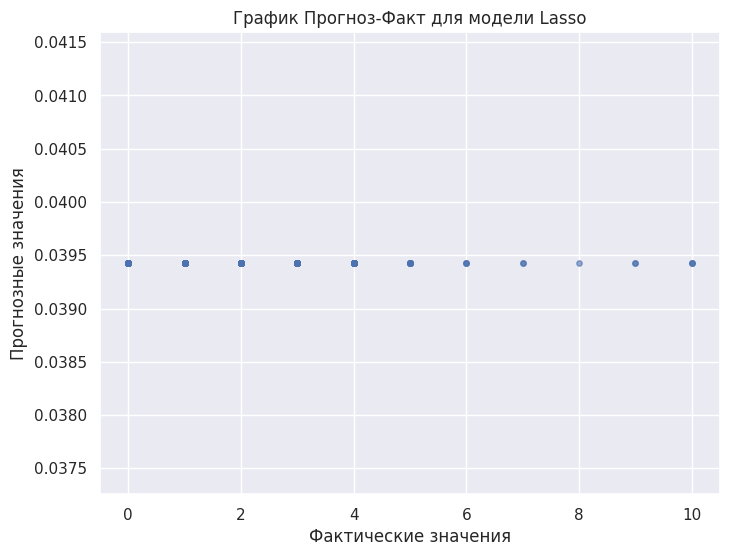

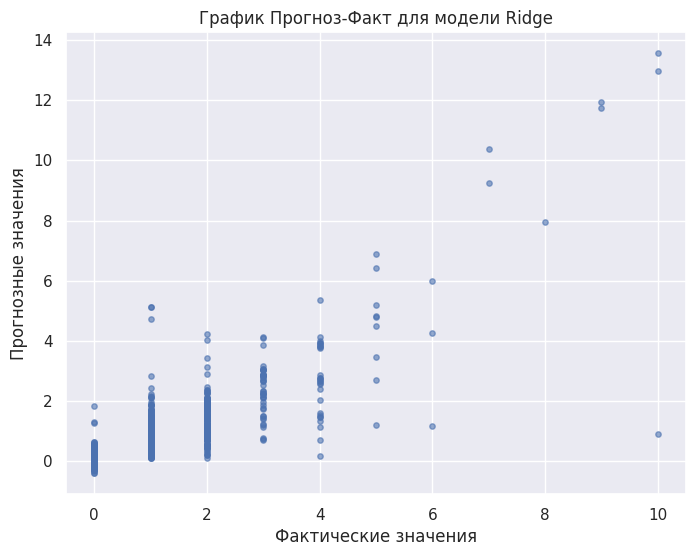

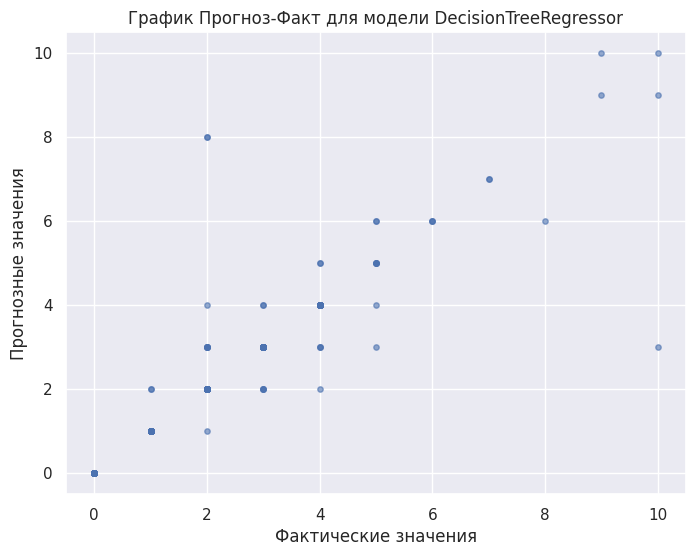

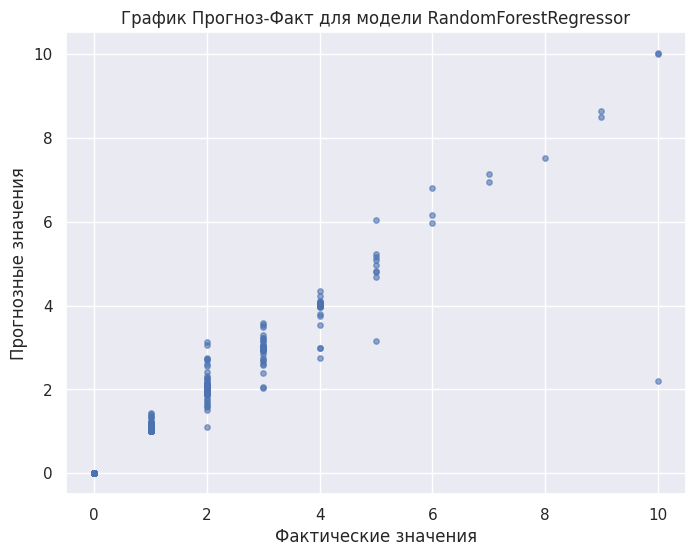

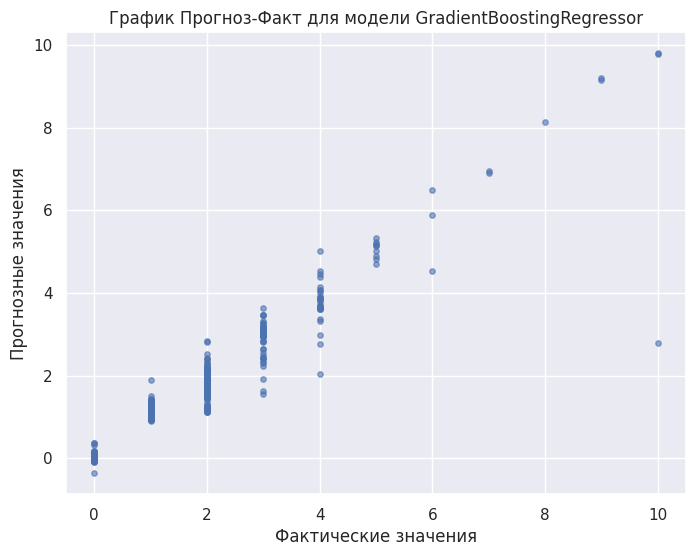

In [118]:
# Создаем отдельный график для каждой модели
for i, model in enumerate(models):
    # Создаем новый график
    plt.figure(figsize=(8, 6))

    # Обучаем модель и делаем предсказания
    model.fit(X_train_st, y_train)
    predictions = model.predict(X_test_st)

    # Строим график прогноз-факт
    plt.scatter(y_test, predictions, s=15, alpha=0.6)
    plt.title(f"График Прогноз-Факт для модели {model.__class__.__name__}")
    plt.xlabel('Фактические значения')
    plt.ylabel('Прогнозные значения')

    # Отображаем график
    plt.show()

#### **2.1.5 Важность признаков для модели GradientBoostingRegressor()**


Заново обучим  модель и сделаем прогноз;  

Создадим датафрейм с важностью, выведем его в порядке убывания важности признаков;  

Какие признаки наиболее важны для моделей?    

In [119]:
# обучим финальную модель
final_model = GradientBoostingRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': final_model.feature_importances_})
fi_df.sort_values('importance', ascending=False)


feature  importance
12                                  Заказано на сумму    0.781854
13                          Заказано товаров по акции    0.091727
17                 Текущая цена с учетом скидки, руб.    0.058628
15          Цена до скидки (перечеркнутая цена), руб.    0.027212
8                                    В корзину, всего    0.022824
18                                  Категория_encoded    0.003489
16                                    Контент-рейтинг    0.003139
4                                       Показы, всего    0.002988
6                          Показы в поиске и каталоге    0.002608
2                        Уникальные посетители, всего    0.001346
3   Уникальные посетители с просмотром карточки то...    0.001143
14                         Заказано на сумму по акции    0.000748
7                         Позиция в поиске и каталоге    0.000703
9                                    Отменено товаров    0.000691
1                                             Артикул    0.000460
5                           Показы на карточке товара    0.000228
0                                             Ozon ID    0.000102
19                                      Акции_encoded    0.000069
10                   Доставлено (за выбранный период)    0.000042
11                                 Возвращено товаров    0.000000

#### **2.1.6 Важность признаков для модели RandomForestRegressor()**

In [120]:
# обучим финальную модель
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': final_model.feature_importances_})
fi_df.sort_values('importance', ascending=False)

feature  importance
12                                  Заказано на сумму    0.787198
13                          Заказано товаров по акции    0.095799
17                 Текущая цена с учетом скидки, руб.    0.049742
15          Цена до скидки (перечеркнутая цена), руб.    0.029691
8                                    В корзину, всего    0.014274
4                                       Показы, всего    0.003376
0                                             Ozon ID    0.003324
18                                  Категория_encoded    0.003254
3   Уникальные посетители с просмотром карточки то...    0.002274
6                          Показы в поиске и каталоге    0.002210
5                           Показы на карточке товара    0.001983
7                         Позиция в поиске и каталоге    0.001510
2                        Уникальные посетители, всего    0.001460
1                                             Артикул    0.001018
14                         Заказано на сумму по акции    0.000854
19                                      Акции_encoded    0.000853
16                                    Контент-рейтинг    0.000630
10                   Доставлено (за выбранный период)    0.000352
9                                    Отменено товаров    0.000200
11                                 Возвращено товаров    0.000000

#### **2.1.7 Важность признаков для модели DecisionTreeRegressor()**

In [121]:
# обучим финальную модель
final_model = DecisionTreeRegressor()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
fi_df = pd.DataFrame(data={'feature': X.columns, 'importance': final_model.feature_importances_})
fi_df.sort_values('importance', ascending=False)

feature  importance
12                                  Заказано на сумму    0.809969
13                          Заказано товаров по акции    0.088496
17                 Текущая цена с учетом скидки, руб.    0.063090
6                          Показы в поиске и каталоге    0.014432
15          Цена до скидки (перечеркнутая цена), руб.    0.008318
7                         Позиция в поиске и каталоге    0.003598
0                                             Ozon ID    0.003433
5                           Показы на карточке товара    0.002390
4                                       Показы, всего    0.001828
8                                    В корзину, всего    0.001415
18                                  Категория_encoded    0.001200
2                        Уникальные посетители, всего    0.000396
1                                             Артикул    0.000360
19                                      Акции_encoded    0.000349
10                   Доставлено (за выбранный период)    0.000341
14                         Заказано на сумму по акции    0.000221
16                                    Контент-рейтинг    0.000097
3   Уникальные посетители с просмотром карточки то...    0.000066
11                                 Возвращено товаров    0.000000
9                                    Отменено товаров    0.000000

#### **2.1.8 Важность признаков для модели Ridge() и Lasso() мы рассмотрели в разделе 2.1.1**  

### **2.2 TS AI -Временные ряды. Эксперименты для ПРОГНОЗА метрики: Заказано товаров**


❗  В нашем проекте мы попробуем поэкспериментировать и попробуем использовать фреймворк **Orbit** от компании **Uber**, специально разработанный для прогнозирования временных рядов. Он предназначен для решения различных задач прогнозирования, таких как прогнозирование продаж, спроса на товары, посещаемости веб-сайтов и т. д.

### Как запустить Orbit <img align="right" src="https://media.giphy.com/media/fsoCk5kgOcYMM/giphy-downsized-large.gif" width="250">

* [Документация](https://orbit-ml.readthedocs.io/en/latest/)
* [Github](https://github.com/uber/orbit)
* [Техблог Uber](https://eng.uber.com/) - там много интересного помимо Orbit
* [Оригинальная статья](https://arxiv.org/abs/2004.08492)

In [122]:
!pip install orbit-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 40.9 MB/s eta 0:00:00
  Created wheel for orbit-ml: filename=orbit_ml-1.1.4.2-py3-none-any.whl size=475066 sha256=477d1118a5c86799fcae785529ca7a5e57668a8b55fc40222ceb29fed87406d3
  Stored in directory: /root/.cache/pip/wheels/d6/d5/12/29fb5179003c5899b3a9281d268f9579df35bb263b985c6456
Successfully built orbit-ml


In [123]:
import orbit #общий пакет
from orbit.models import DLT #один из вариантов модели
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components #для рисования предсказаний

#общие штуки для кручения данных
import os

#общие штуки для рисования
import arviz as az #это полезно для визуализации MCMC

#эксплораторные штуки
from orbit.eda import eda_plot

In [124]:
# Удаляем столбцы col1 и col2
baza_analysts_promotions_orbit = baza_analysts_promotions.drop(['Категория 3-го уровня', 'Товары', 'Модель','Акции'], axis=1)

In [125]:
# Посмотрим на сводную информацию о наборе данных
baza_analysts_promotions_orbit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236685 entries, 0 to 236684
Data columns (total 22 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   Ozon ID                                             236685 non-null  int64         
 1   Артикул                                             236685 non-null  int64         
 2   День                                                236685 non-null  datetime64[ns]
 3   Уникальные посетители, всего                        236685 non-null  int64         
 4   Уникальные посетители с просмотром карточки товара  236685 non-null  int64         
 5   Показы, всего                                       236685 non-null  int64         
 6   Показы на карточке товара                           236685 non-null  int64         
 7   Показы в поиске и каталоге                          236685 non-null  int64         

In [126]:
baza_analysts_promotions_orbit.head(10)

Ozon ID  Артикул       День  Уникальные посетители, всего  \
0  966018019    34601 2023-05-04                             4   
1  966018019    34601 2023-05-05                             8   
2  966018019    34601 2023-05-06                             6   
3  966018019    34601 2023-05-07                             7   
4  966018019    34601 2023-05-08                            55   
5  966018019    34601 2023-05-09                            51   
6  966018019    34601 2023-05-10                            50   
7  966018019    34601 2023-05-11                            41   
8  966018019    34601 2023-05-12                            23   
9  966018019    34601 2023-05-13                            55   

   Уникальные посетители с просмотром карточки товара  Показы, всего  \
0                                                  1               7   
1                                                  1              11   
2                                                  2              15   
3                                                  0               8   
4                                                  0              70   
5                                                  3              72   
6                                                  4              79   
7                                                  2              57   
8                                                  0              31   
9                                                  4              73   

   Показы на карточке товара  Показы в поиске и каталоге  \
0                          3                           3   
1                          2                           3   
2                          6                           4   
3                          0                           6   
4                          0                          15   
5                          3                          35   
6                          4                          28   
7                          3                          20   
8                          0                          12   
9                          5                          12   

   Позиция в поиске и каталоге  В корзину, всего  Заказано товаров  \
0                       516.67                 0                 0   
1                         5.67                 0                 0   
2                       147.00                 1                 0   
3                        40.00                 0                 0   
4                        34.40                 0                 0   
5                        35.09                 0                 0   
6                        18.25                 2                 1   
7                        20.55                 0                 0   
8                        57.42                 0                 0   
9                        37.25                 0                 0   

   Отменено товаров  Доставлено (за выбранный период)  Возвращено товаров  \
0                 0                                 0                   0   
1                 0                                 0                   0   
2                 0                                 0                   0   
3                 0                                 0                   0   
4                 0                                 0                   0   
5                 0                                 0                   0   
6                 0                                 0                   0   
7                 0                                 0                   0   
8                 0                                 0                   0   
9                 0                                 0                   0   

   Заказано на сумму  Заказано товаров по акции  Заказано на сумму по акции  \
0                  0                          0                           0   
1                  0                          0

In [127]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", baza_analysts_promotions_orbit['День'].min())
print("Максимальная дата создания:", baza_analysts_promotions_orbit['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


<Axes: xlabel='День', ylabel='Заказано товаров'>

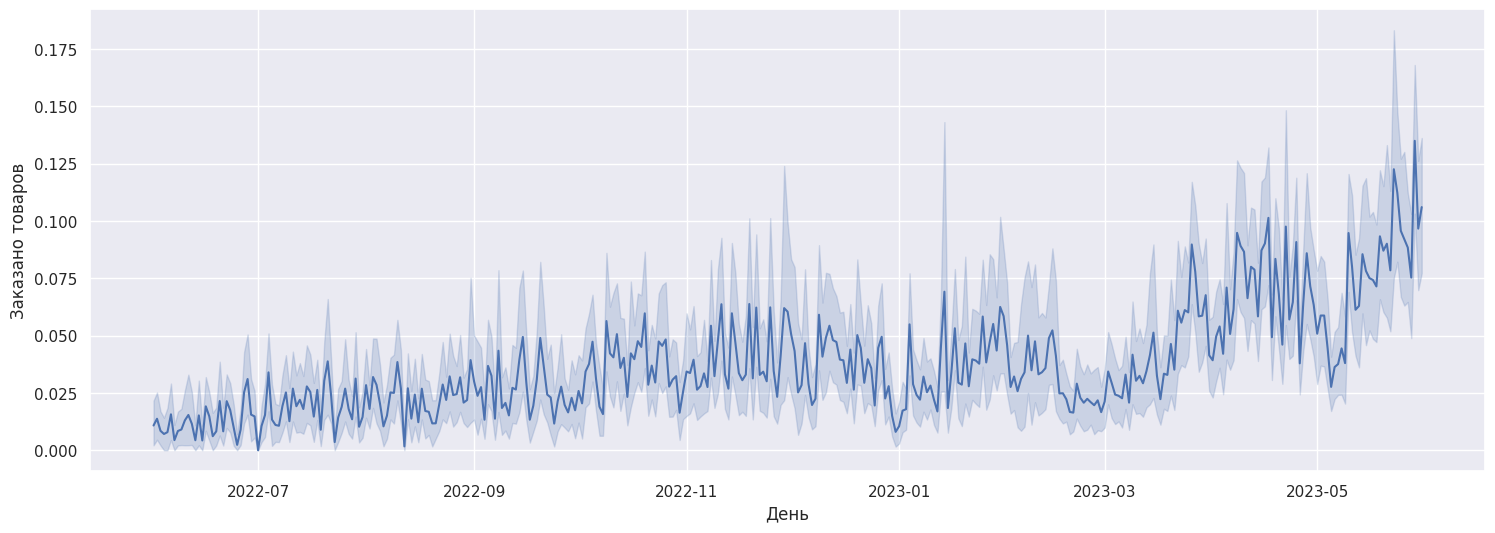

In [128]:
#как менялся "Заказано товаров"
# Указываем размеры графика
plt.figure(figsize=(18, 6))
sns.lineplot(x="День", y="Заказано товаров", data=baza_analysts_promotions_orbit)

Можно посмотреть, какие компоненты у нас вообще есть в Orbit:

In [129]:
dir(orbit)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'constants',
 'diagnostics',
 'eda',
 'estimators',
 'exceptions',
 'forecaster',
 'models',
 'name',
 'template',
 'utils']

Но не все разделы так видно - например, модуль эксплораторного анализа:

In [130]:
#эксплораторные штуки
from orbit.eda import eda_plot

### Строим модель

В Orbit есть три основные модели (плюс пара базовых больше для демонстрации):

* **Local-Global Trend** - учитывает как общие глобальные изменения, так и более мелкие локальные - но сами разработчики хотят её упразднить
* **Damped Local Trend** - гибрид предыдущей модели и классического экспоненциального сглаживания + коэффициент угасания тренда
* **Kernel-based time-varying regression** - экспериментальная модель с множественной сезонностью и динамической регрессией (может баговать!)

Используем вторую модель, так как она наиболее отлажена. Для начала инициализируем модель с основными параметрами:

In [131]:
grouped_df = baza_analysts_promotions_orbit.groupby('День')['Заказано товаров'].sum().reset_index()

In [132]:
sorted_grouped_df = grouped_df.sort_values(by='День')

In [133]:
sorted_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   День              365 non-null    datetime64[ns]
 1   Заказано товаров  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [134]:
sorted_grouped_df.head(10)

День  Заказано товаров
0 2022-06-01                 5
1 2022-06-02                 6
2 2022-06-03                 4
3 2022-06-04                 3
4 2022-06-05                 3
5 2022-06-06                 7
6 2022-06-07                 2
7 2022-06-08                 4
8 2022-06-09                 4
9 2022-06-10                 6

А теперь обучаем её на данных.

### ❗️ НЕ ПУГАЙТЕСЬ КУЧИ КРАСНОГО! Это так модель предварительно компилируется.

In [135]:
dlt = DLT(response_col="Заказано товаров",
          date_col="День",
          seasonality=30,
          estimator="stan-map",
          n_bootstrap_draws=1000)

dlt.fit(sorted_grouped_df)

2023-09-27 15:14:55 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
2023-09-27 15:14:55 - orbit - INFO - First time in running stan model:dlt. Expect 3 - 5 minutes for compilation.
INFO:orbit:First time in running stan model:dlt. Expect 3 - 5 minutes for compilation.


Теперь нам надо создать датафрейм с горизонтом прогнозирования - то есть теми датами, которые мы хотим предсказать! Для этого есть вспомогательный метод .make_future_df():

In [136]:
future_df = dlt.make_future_df(periods=30*3) #горизонт будет 3 месяца - то есть 3 раза по 30 дней
future_df.head(25)

День
0  2023-06-01
1  2023-06-02
2  2023-06-03
3  2023-06-04
4  2023-06-05
5  2023-06-06
6  2023-06-07
7  2023-06-08
8  2023-06-09
9  2023-06-10
10 2023-06-11
11 2023-06-12
12 2023-06-13
13 2023-06-14
14 2023-06-15
15 2023-06-16
16 2023-06-17
17 2023-06-18
18 2023-06-19
19 2023-06-20
20 2023-06-21
21 2023-06-22
22 2023-06-23
23 2023-06-24
24 2023-06-25

А дальше остаётся только сделать прогноз!

In [137]:
predicted_df = dlt.predict(df=future_df)
predicted_df.head()

День  prediction_5  prediction  prediction_95
0 2023-06-01     63.663873   77.209482      90.458142
1 2023-06-02     61.786224   76.719406      91.541265
2 2023-06-03     61.824395   76.722851      91.423902
3 2023-06-04     61.016893   76.744605      93.267516
4 2023-06-05     60.550986   76.774411      93.679004

Нарисуем, как он выглядит:

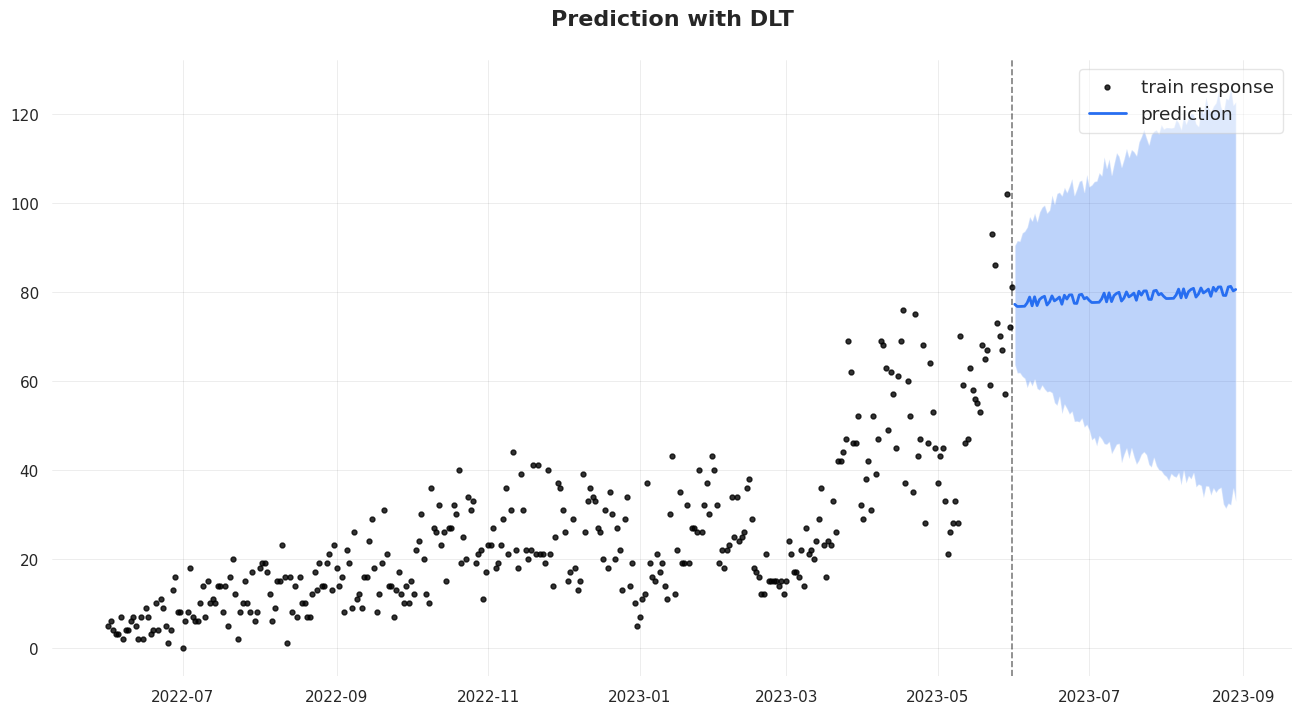

In [138]:
_ = plot_predicted_data(sorted_grouped_df, predicted_df, "День", 'Заказано товаров', title='Prediction with DLT')

А ещё мы можем нарисовать отдельные компоненты нашей модели:

In [139]:
predicted_df = dlt.predict(df=future_df,
                           decompose=True) #говорит, что нам нужна декомпозиция предсказания
predicted_df.head()

День  prediction_5  prediction  prediction_95    trend_5      trend  \
0 2023-06-01     65.311761   77.209482      92.815612  65.757633  77.655354   
1 2023-06-02     62.115989   76.719406      91.956542  63.081676  77.685093   
2 2023-06-03     61.779390   76.722851      94.219658  62.771371  77.714832   
3 2023-06-04     61.331117   76.744605      94.195839  62.331083  77.744571   
4 2023-06-05     59.827326   76.774411      93.729710  60.827225  77.774310   

    trend_95  seasonality_5  seasonality  seasonality_95  regression_5  \
0  93.261484      -0.445872    -0.445872       -0.445872           0.0   
1  92.922229      -0.965687    -0.965687       -0.965687           0.0   
2  95.211639      -0.991981    -0.991981       -0.991981           0.0   
3  95.195805      -0.999966    -0.999966       -0.999966           0.0   
4  94.729609      -0.999899    -0.999899       -0.999899           0.0   

   regression  regression_95  
0         0.0            0.0  
1         0.0            0.0  
2         0.0            0.0  
3         0.0            0.0  
4         0.0            0.0

Рисуем:

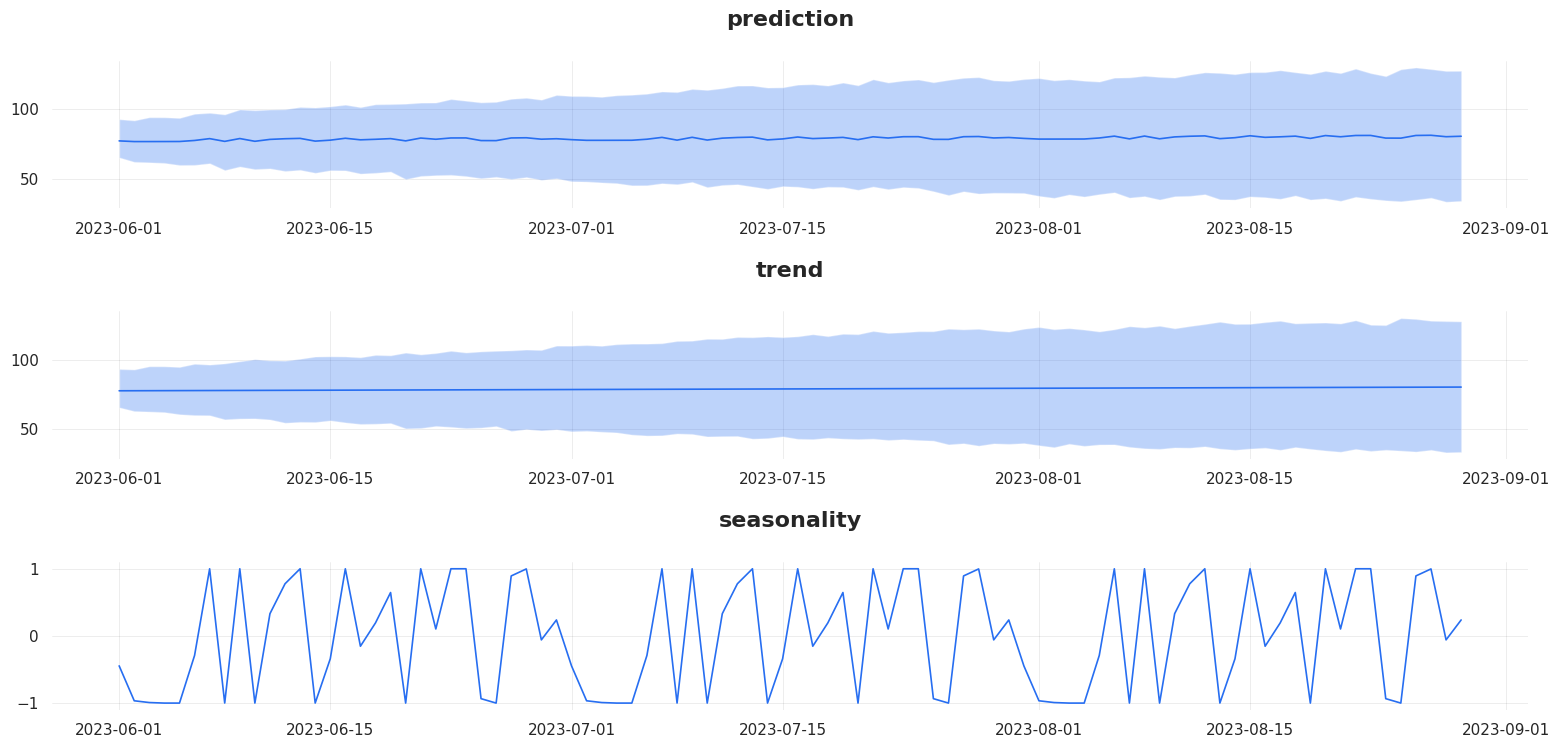

In [140]:
_ = plot_predicted_components(predicted_df, "День", plot_components=['prediction', 'trend', 'seasonality'])

Обратите внимание, что доверительный интервал есть только у тренда, но его нет у сезонности! Это недостаток текущего алгоритма оценки (Maximum A Posteriori, MAP) - он очень быстрый, но не очень точный и часто недооценивает изменчивость в данных. Какая у нас альтернатива?

### Снова строим модель (MCMC)

Метод Markov Chain Monte Carlo (MCMC) - ровная противоположность MAP! Он оценивает доверительные интервалы для всего, и имеет гораздо больше теоретических гарантий точности - но при этом не самый шустрый. Попробуем оценить модель с помощью него:

In [141]:
dlt_mcmc = DLT(seasonality=30, response_col="Заказано товаров", date_col="День",
               estimator='stan-mcmc', #новый алгоритм оценки
               num_warmup=2000, #время "разогрева"
               num_sample=1000) #время сэмплирования

Запускаем:

In [142]:
dlt_mcmc.fit(sorted_grouped_df)

2023-09-27 15:15:59 - orbit - INFO - Sampling (PyStan) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 250.
INFO:orbit:Sampling (PyStan) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 500 and samples(per chain): 250.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

Дальше всё то же самое:

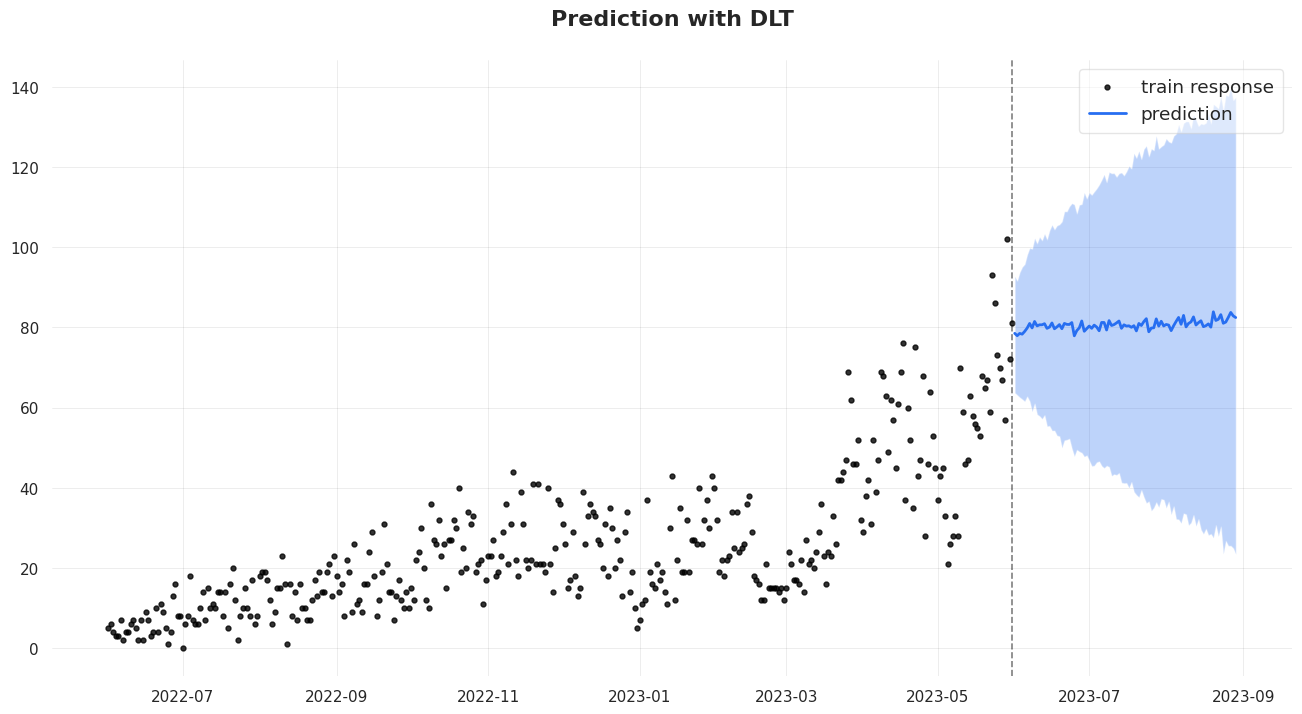

In [143]:
future_df = dlt_mcmc.make_future_df(periods=30*3)

predicted_df = dlt_mcmc.predict(df=future_df)
_ = plot_predicted_data(sorted_grouped_df, predicted_df, "День", 'Заказано товаров', title='Prediction with DLT')

Очень похоже! А если декомпозировать?

In [144]:
predicted_df = dlt_mcmc.predict(df=future_df, decompose=True)

predicted_df.head()

День  prediction_5  prediction  prediction_95    trend_5      trend  \
0 2023-06-01     64.401426   78.327682      91.676772  64.902483  78.585548   
1 2023-06-02     62.490642   78.008468      93.069668  62.921616  78.346062   
2 2023-06-03     64.144627   79.305794      94.322799  64.399084  79.490989   
3 2023-06-04     62.011952   78.588783      94.542383  62.724011  79.363476   
4 2023-06-05     61.944554   78.938569      96.357127  62.399806  79.359761   

    trend_95  seasonality_5  seasonality  seasonality_95  regression_5  \
0  92.077391      -1.150804    -0.389505        0.554517           0.0   
1  93.332267      -1.265287    -0.475782        0.554663           0.0   
2  94.580374      -0.911480    -0.160312        0.717798           0.0   
3  95.052965      -1.573084    -0.688510        0.369907           0.0   
4  96.914879      -1.092139    -0.396301        0.579021           0.0   

   regression  regression_95  
0         0.0            0.0  
1         0.0            0.0  
2         0.0            0.0  
3         0.0            0.0  
4         0.0            0.0

И нарисуем:

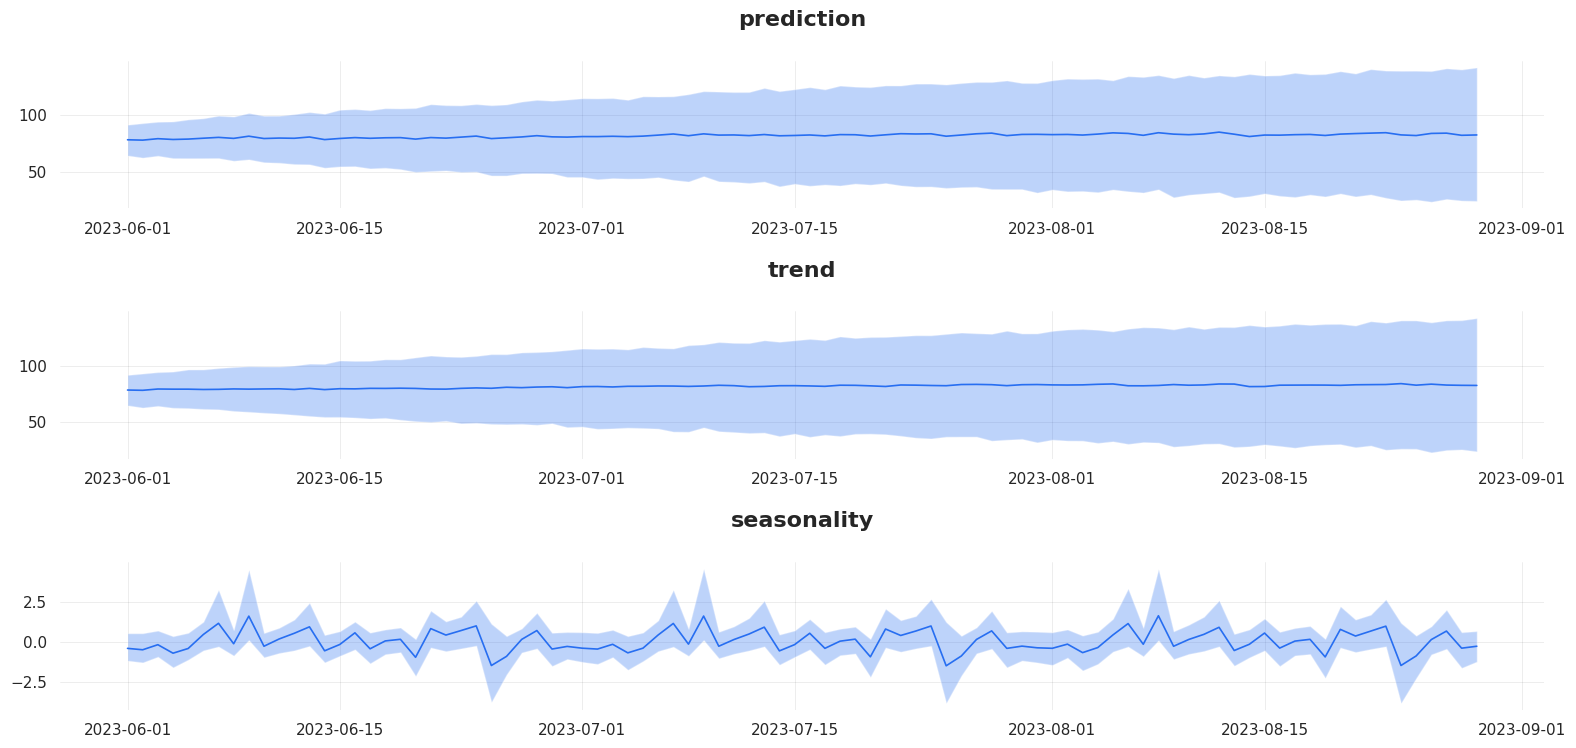

In [145]:
_ = plot_predicted_components(predicted_df, "День", plot_components=['prediction', 'trend', 'seasonality'])

Можете видеть, что теперь у сезонности тоже есть доверительный интервал!

### Проверка качества моделей

Мы построили нашу первую модель! Однако нас может мучить вопрос: а насколько эта модель хороша? Насколько сильные ошибки стоит для неё ожидать?

Вы можете знать, что в машинном обучении это решают тремя основными способами:

* Разделением на *тренировочную* (трейн, train) и *тестовую* (тест, test) выборки - на первой мы модель обучаем, на второй проверяем, насколько хорошо она предсказывается
* *Кроссвалидацией* - как прошлый метод, только выборка дробится на трейн и тест несколькими способами
* Комбинация двух выше - выделяем тест, на трейне делаем кроссвалидацию, а потом дополнительно ещё проверяем модель на тесте

Однако в классической версии эти подходы не работают для временных рядов - так как наблюдения у нас не независимые, а связанные между собой временем! Приходится это учитывать - и в Orbit это реализовано через концепцию **бэктестинга**. Как это работает - мы сейчас увидим!

In [146]:
from orbit.diagnostics.backtest import BackTester #основной класс для бэктестинга
from orbit.utils.params_tuning import grid_search_orbit #для подбора оптимальных параметров

Реализован бэктестинг в Orbit в двух разных вариантах - расширяющееся (expanding) и скользящее (rolling) окно. Давайте посмотрим, в чём разница между ними:

In [147]:
#expanding

bt_exp = BackTester(
    model=dlt, #наша моделька
    df=sorted_grouped_df, #датафрейм для обучения
    min_train_len=30*3, #самый маленький кусочек данных, с которого начинается обучение
    incremental_len=30, #на сколько происходит прирост тренировочных данных
    forecast_len=30, #горизонт пронозирования
    window_type="expanding" #тип окошка
)

Расширяющееся окно начинает с небольшого размера тренировочных данных и постепенно его увеличивает, пока не кончатся данные. Так можно оценить, как меняется точность предсказания с наращиванием количества информации. Такой вариант окна лучше всего подходит, если данные не слишком волатильны и в далеком прошлом есть важная информация, полезная для предсказания в будущем:


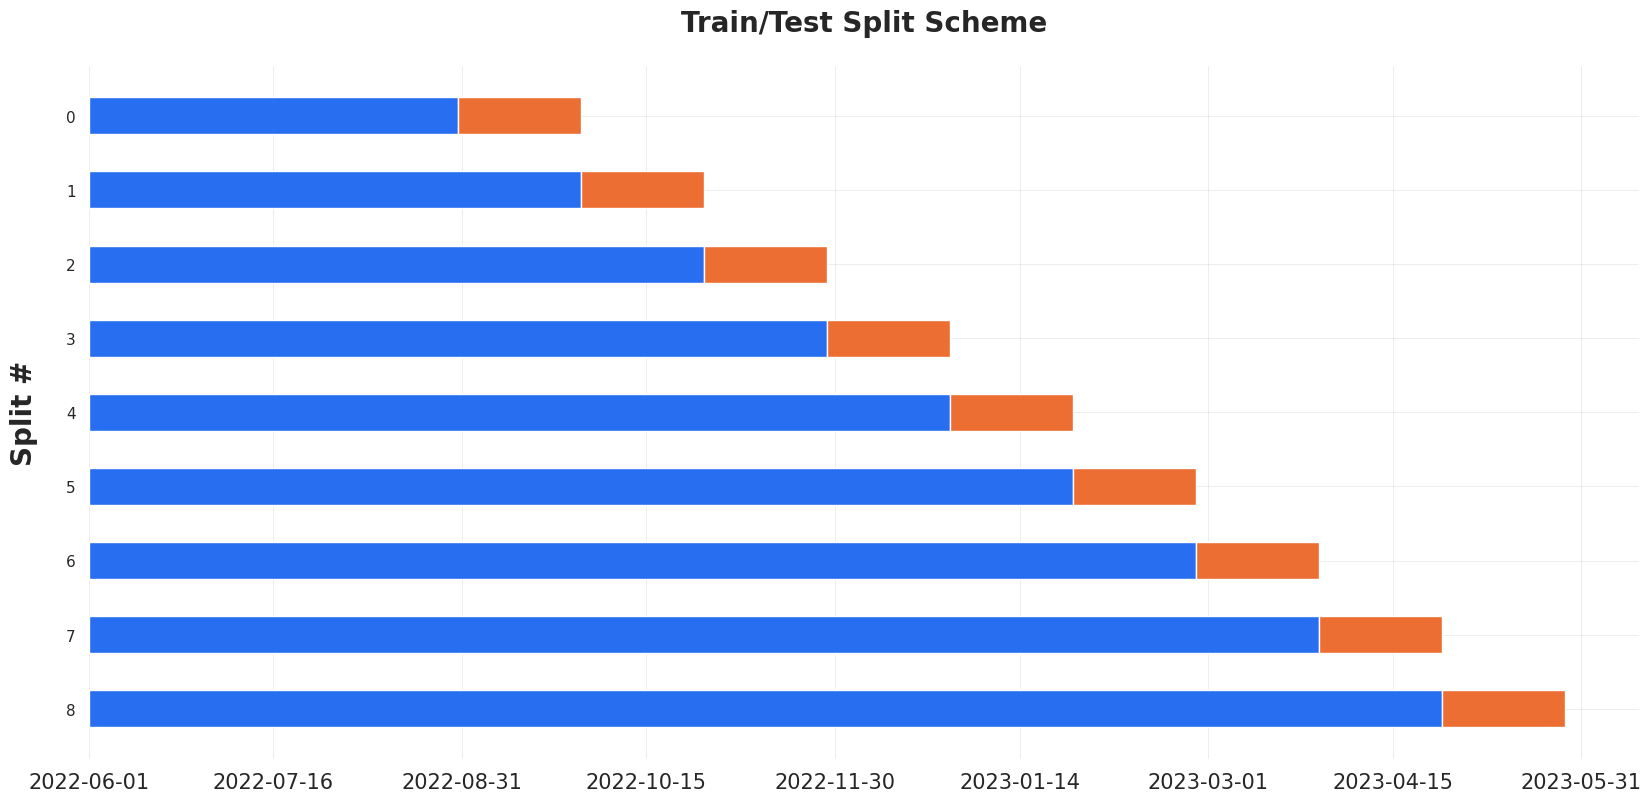

In [148]:
bt_exp.plot_scheme()

In [149]:
#rolling

bt_roll = BackTester(
    model=dlt,
    df=sorted_grouped_df,
    min_train_len=30*3,
    incremental_len=30,
    forecast_len=30,
    window_type="rolling",
)

В скользящем размер тренировочных данных не меняется - он сдвигается во времени. Такой вариант полезен, если наши данные волатильны и основная информация о предсказании находится в ближайшем прошлом:

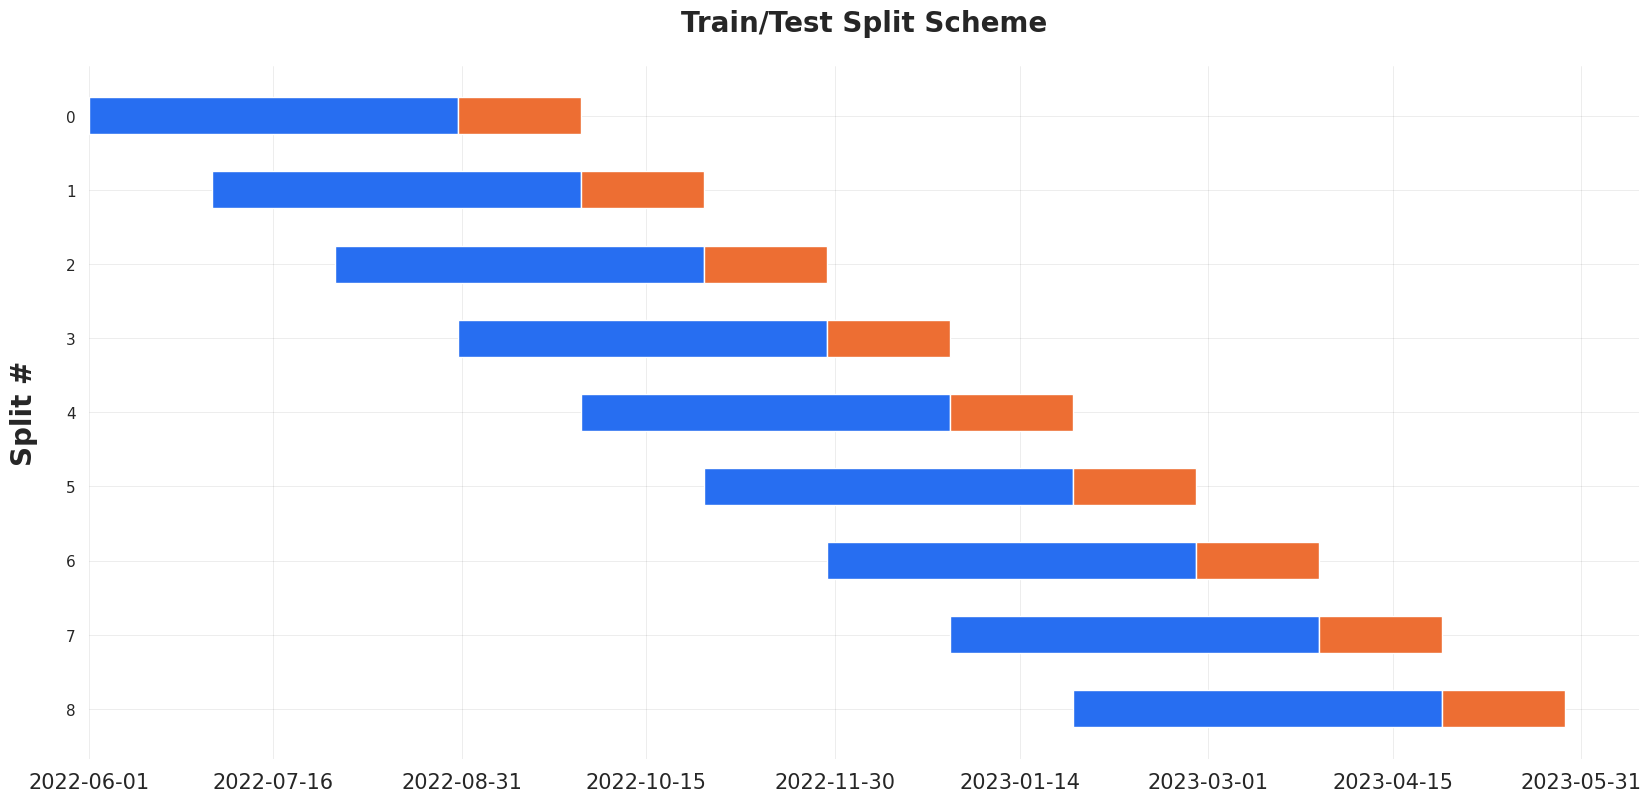

In [150]:
bt_roll.plot_scheme()

Давайте для примера посмотрим, что нам покажет расширяющееся окно:

In [151]:
bt_exp.fit_predict() #обучаем
bt_exp.score() #выводим метрики

metric_name  metric_values  is_training_metric
0       smape       0.343179               False
1       wmape       0.324812               False
2        mape       0.424222               False
3         mse     151.350282               False
4         mae       9.670987               False
5       rmsse       1.084954               False

Судя по всему, по нашим метрикам эта модель справляется неплохо! Но это ещё не всё: мы можем так подбирать оптимальные параметры для нашей модели! Делается это через grid search - перебор возможных параметров модели и проверка, какой из них выдаёт минимальное значение функционала ошибки.

Давайте, например, сделаем это для параметра угасания тренда:

In [152]:
best_params, tuned_df = grid_search_orbit(param_grid={"damped_factor": np.arange(0.1, 1.0, 0.1)}, #наш параметр
                                        model=dlt,
                                        df=sorted_grouped_df,
                                        min_train_len=30*3,
                                        incremental_len=30,
                                        forecast_len=30,
                                        metrics=None, #смотрим smape по умолчанию
                                        criteria="min", #говорим, что нам нужна минимизация
                                        verbose=True) #пусть печатает процесс выполнения

  0%|          | 0/9 [00:00<?, ?it/s]

2023-09-27 15:16:29 - orbit - INFO - tuning hyper-params {'damped_factor': 0.1}
INFO:orbit:tuning hyper-params {'damped_factor': 0.1}
2023-09-27 15:16:29 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
2023-09-27 15:16:31 - orbit - INFO - tuning metric:0.34311
INFO:orbit:tuning metric:0.34311
2023-09-27 15:16:31 - orbit - INFO - tuning hyper-params {'damped_factor': 0.2}
INFO:orbit:tuning hyper-params {'damped_factor': 0.2}
2023-09-27 15:16:31 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.
2023-09-27 15:16:33 - orbit - INFO - tuning metric:0.34309
INFO:orbit:tuning metric:0.34309
2023-09-27 15:16:33 - orbit - INFO - tuning hyper-params {'damped_factor': 0.30000000000000004}
INFO:orbit:tuning hyper-params {'damped_factor': 0.30000000000000004}
2023-09-27 15:16:33 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) wit

Давайте глянем на лучшие параметры модели, а также полный список всех вариантов:

In [153]:
best_params

[{'damped_factor': 0.8}]

In [154]:
tuned_df #уж сильно различаются варианты

damped_factor   metrics
0            0.1  0.343110
1            0.2  0.343095
2            0.3  0.343124
3            0.4  0.343084
4            0.5  0.343120
5            0.6  0.343097
6            0.7  0.343095
7            0.8  0.343073
8            0.9  0.343096

🤣  Показатель 0.343073 представляет значение целевой метрики, которая в данном случае является SMAPE (симметричное среднее абсолютное процентное отклонение).Большое значение SMAPE (близкое к 1) указывает на большие расхождения между фактическими значениями и прогнозными значениями модели. Чем меньше значение SMAPE, тем лучше точность модели.  
🤣 В данном случае, значение SMAPE равное 0.343073 означает, что средняя абсолютная процентная ошибка составляет около 34.31%. Это может указывать на относительно большие расхождения между фактическими значениями и прогнозными значениями модели.

Чтобы более точно оценить качество модели и понять, насколько большие эти расхождения, полезно сравнить значение SMAPE со средним значением целевой переменной и рассмотреть другие метрики оценки модели.

### Дополнительно: проверка MCMC   

Хотя MCMC и является более точным методам, он также более требователен к настройке параметров и соблюдению допущений. Им можно проверять графически для разных параметров - главное смотреть на глобальные показатели!

In [155]:
params = dlt_mcmc.get_posterior_samples(permute=False) #достаём информацию о параметрах

params.keys() #их названия - можно залезть в оригинальный код на Stan, чтобы вычислить их значение

dict_keys(['l', 'b', 'lev_sm', 'slp_sm', 'obs_sigma', 'nu', 'lt_sum', 's', 'sea_sm', 'gt_sum', 'gb', 'gl', 'loglk'])

In [156]:
params["obs_sigma"].shape #лучше смотреть те, у которых третьего измерения либо нет, либо оно равно 1

(4, 250)

Есть очень много разных вариантов проверок, реализованных в библиотеке Arviz. Есть очень много разных интересных диагностик, но самая важная их них - сходимость цепей. Визуально она должна выглядеть как 4 временных ряда, скачущих вокург примерно одного значения. Это значит, что разные инстанции алгоритма пришли к одному и тому же выводу в плане параметров!

array([[<Axes: title={'center': 'obs_sigma'}>,
        <Axes: title={'center': 'obs_sigma'}>]], dtype=object)

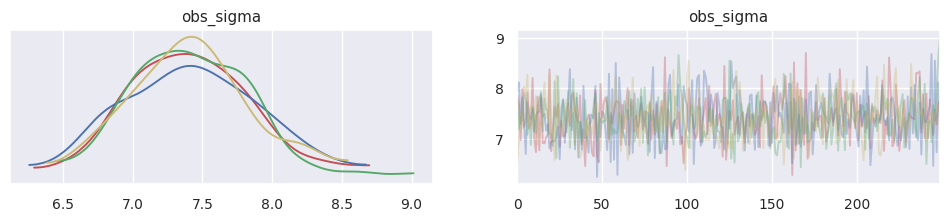

In [157]:
az.plot_trace(params, chain_prop={"color": ['r', 'b', 'g', 'y']}, var_names = "obs_sigma")

## Регрессоры в моделях  

Во временных рядах информация необязательно должна браться из прошлых значений показателя. Мы можем брать другие временные ряды и оценивать их взаимосвязь с нашим - вдруг они хорошо его предсказывают! Такие временные ряды называются **регрессорами**.

Впрочем, есть одно но. Если мы хотим предсказывать что-то вместе с регрессорами, мы должны знать будущие значения этих регрессоров - иначе ничего не заработает! Как можно подойти к этой проблеме?

* Ориентироваться на фиксированные ежегодные события - например, праздники!
* Пытаться предсказать самостоятельно другой временной ряд либо взять какие-то официальные прогнозы, если это какой-то невнутренний показатель.
* Сценарное пронозирование - "что мы можем ожидать, если переменные поведут себя вот так?". В целом предыдущий вариант вполне можно оформить именно так, но можно подбирать значения хоть вручную.

Давайте попробуем взять количество просматриваемых постов в каждый час! Вряд ли мы будем знать это заранее, но в рамках демонстрации принципа должно быть неплохо.

In [158]:
# Выбор необходимых столбцов
data_reg = baza_analysts_promotions_orbit[['День', 'Заказано товаров', 'Уникальные посетители с просмотром карточки товара']]

# Группировка данных и суммирование
data_reg = data_reg.groupby('День').sum().reset_index()

# Сортировка от меньшего к большему
data_reg = data_reg.sort_values(by='День')

# Вывод результата
print(data_reg)

          День  Заказано товаров  \
0   2022-06-01                 5   
1   2022-06-02                 6   
2   2022-06-03                 4   
3   2022-06-04                 3   
4   2022-06-05                 3   
..         ...               ...   
360 2023-05-27                67   
361 2023-05-28                57   
362 2023-05-29               102   
363 2023-05-30                72   
364 2023-05-31                81   

     Уникальные посетители с просмотром карточки товара  
0                                                  256   
1                                                  248   
2                                                  262   
3                                                  207   
4                                                  241   
..                                                 ...   
360                                               2801   
361                                               3537   
362                                          

Можем даже сразу глянуть на корреляцию между ними:

In [159]:
data_reg.drop("День", axis=1).corr() #по Пирсону  большая

Заказано товаров  \
Заказано товаров                                            1.000000   
Уникальные посетители с просмотром карточки товара          0.844695   

                                                    Уникальные посетители с просмотром карточки товара  
Заказано товаров                                                                             0.844695   
Уникальные посетители с просмотром карточки товара                                           1.000000

In [160]:
data_reg.drop("День", axis=1).corr(method="spearman") # по Спирмену немного хуже

Заказано товаров  \
Заказано товаров                                            1.000000   
Уникальные посетители с просмотром карточки товара          0.839693   

                                                    Уникальные посетители с просмотром карточки товара  
Заказано товаров                                                                             0.839693   
Уникальные посетители с просмотром карточки товара                                           1.000000

Давайте посмотрим, как это будет выглядеть в модели. Реально лучше строить их через MCMC, но здесь для скорости используем MAP:

In [161]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   День                                                365 non-null    datetime64[ns]
 1   Заказано товаров                                    365 non-null    int64         
 2   Уникальные посетители с просмотром карточки товара  365 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.4 KB


In [162]:
data_reg.head()

День  Заказано товаров  \
0 2022-06-01                 5   
1 2022-06-02                 6   
2 2022-06-03                 4   
3 2022-06-04                 3   
4 2022-06-05                 3   

   Уникальные посетители с просмотром карточки товара  
0                                                256   
1                                                248   
2                                                262   
3                                                207   
4                                                241

In [163]:
train_dat = data_reg.query("День < '2023-02-01'") #возьмём часть данных для обучения
test_dat = data_reg.query("День >= '2023-02-01'").astype({"Уникальные посетители с просмотром карточки товара":"int64"}) #а это будем предсказывать - важно сконвертировать в инт

In [164]:
reg_model = DLT(response_col="Заказано товаров",
                date_col="День",
                seasonality=30,
                estimator="stan-map",
                n_bootstrap_draws=1000,
                regressor_col=["Уникальные посетители с просмотром карточки товара"] #наша колонка с регрессором! Должна быть списком
               )

reg_model.fit(train_dat)

2023-09-27 15:16:55 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Дальше всё то же самое:

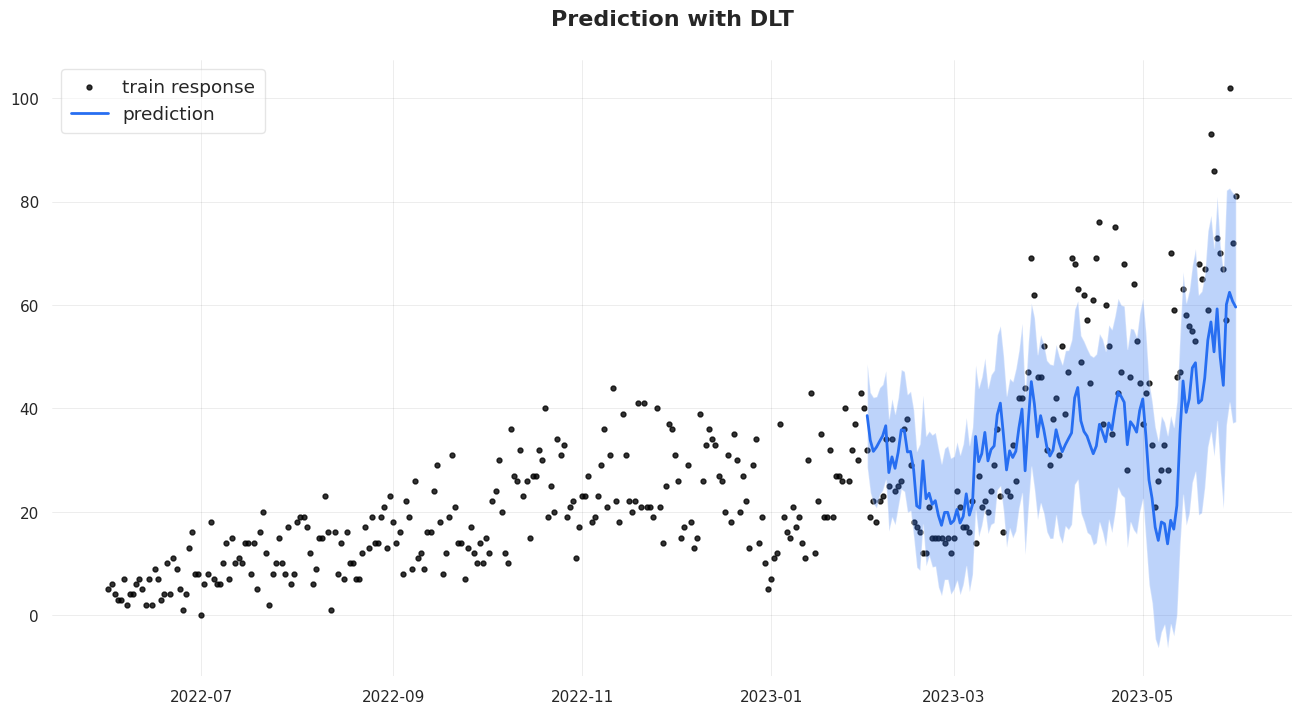

In [165]:
predicted_df_reg = reg_model.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_reg, "День", 'Заказано товаров', title='Prediction with DLT') #так себе

И декомпозируем:

In [166]:
predicted_df = reg_model.predict(df=test_dat, decompose=True)

predicted_df.head()

День  prediction_5  prediction  prediction_95    trend_5     trend  \
0 2023-02-01     28.652626   38.612263      49.003973 -11.987195 -2.027558   
1 2023-02-02     23.919582   33.846500      44.294033 -12.006061 -2.079143   
2 2023-02-03     20.827563   31.682916      41.622487 -12.986100 -2.130748   
3 2023-02-04     22.088471   32.501364      42.735989 -12.595260 -2.182368   
4 2023-02-05     22.359744   33.611371      43.163047 -13.485627 -2.234000   

   trend_95  seasonality_5  seasonality  seasonality_95  regression_5  \
0  8.364152      -0.995850    -0.995850       -0.995850     41.635671   
1  8.368390      -0.990811    -0.990811       -0.990811     36.916454   
2  7.808824       0.417593     0.417593        0.417593     33.396071   
3  8.052258      -0.976802    -0.976802       -0.976802     35.660533   
4  7.317677      -0.975938    -0.975938       -0.975938     36.821309   

   regression  regression_95  
0   41.635671      41.635671  
1   36.916454      36.916454  
2   33.396071      33.396071  
3   35.660533      35.660533  
4   36.821309      36.821309

И нарисуем:

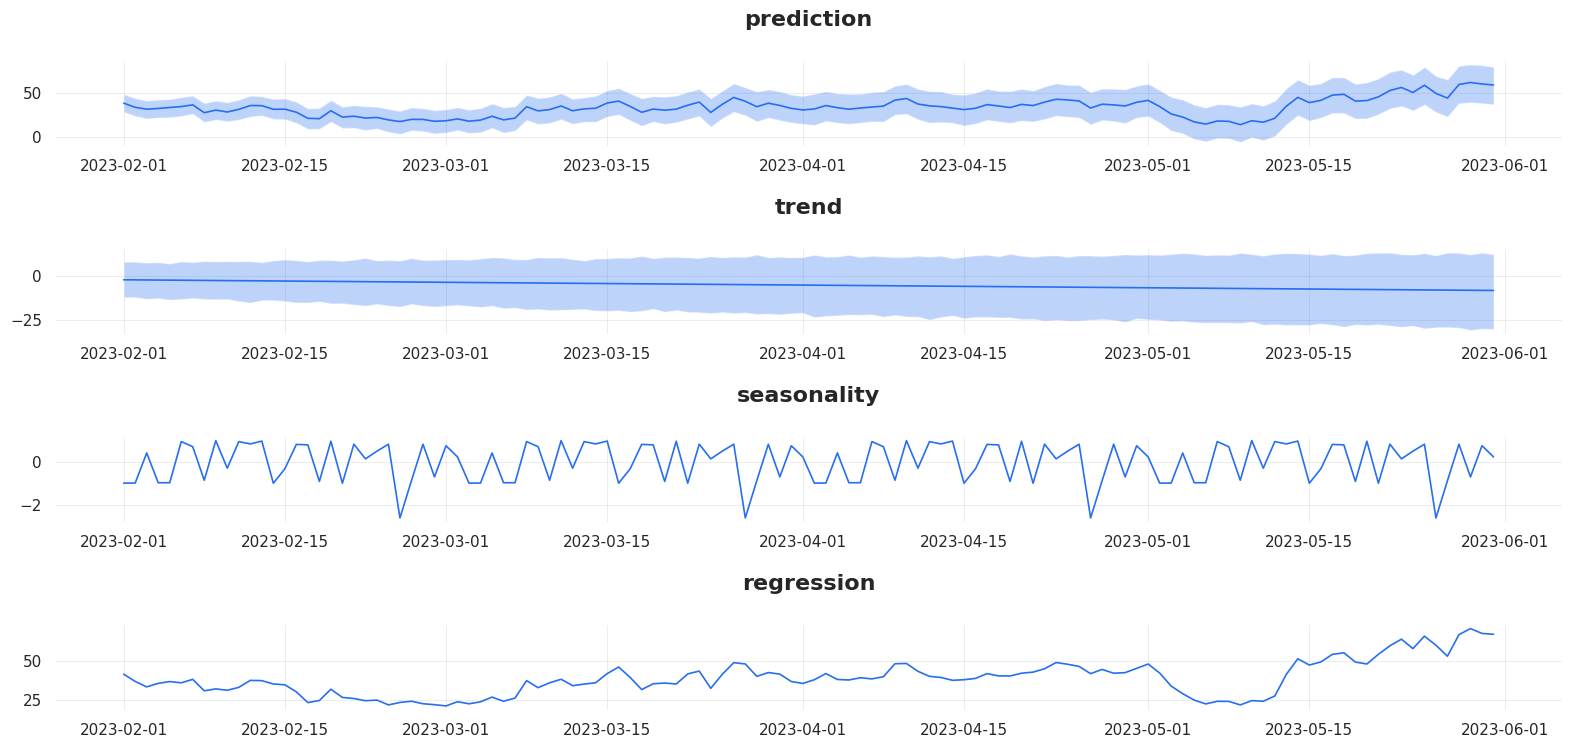

In [167]:
_ = plot_predicted_components(predicted_df, "День", plot_components=['prediction', 'trend', 'seasonality', "regression"])

Взглянем на коэффициент регрессии:

In [168]:
reg_model.get_regression_coefs()

regressor regressor_sign  \
0  Уникальные посетители с просмотром карточки то...        Regular   

   coefficient  
0     0.019029

🔹 Итак, выводом является то, что при увеличении значения регрессора "Уникальные посетители с просмотром карточки товара" на единицу, ожидается увеличение величины регрессируемой переменной (в данном случае "Заказано товаров") на 0.019029. Это можно рассматривать как вклад или влияние данного регрессора на объяснение вариации регрессируемой переменной.  

🔹 Обратите внимание, что коэффициент регрессии может быть положительным или отрицательным, в зависимости от направления связи между регрессором и регрессируемой переменной. Здесь коэффициент положительный, что указывает на положительную связь между "Уникальными посетителями с просмотром карточки товара" и "Заказанными товарами".  

### Априорные распределения

Если у нас есть какие-то предварительные убеждения о том, в какую сторону должен быть направлен регрессор, какое его наиболее вероятное значение, насколько мы в этом значении уверены - это можно включить в модель как дополнительный источник информации!

In [169]:
reg_model_prior = DLT(response_col="Заказано товаров",
                date_col="День",
                seasonality=30,
                estimator="stan-map",
                n_bootstrap_draws=1000,
                regressor_col=["Уникальные посетители с просмотром карточки товара"],
                regressor_sign=["+"], #допустим, мы считаем, что связь обязательно положительная
                regressor_beta_prior=[0.3], #пусть мы думаем, что истинное значение коэффициента - вот такое
                regressor_sigma_prior=[0.1] #и зададим уровень уверенности
               )

reg_model_prior.fit(train_dat)

2023-09-27 15:16:59 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


<Axes: ylabel='Count'>

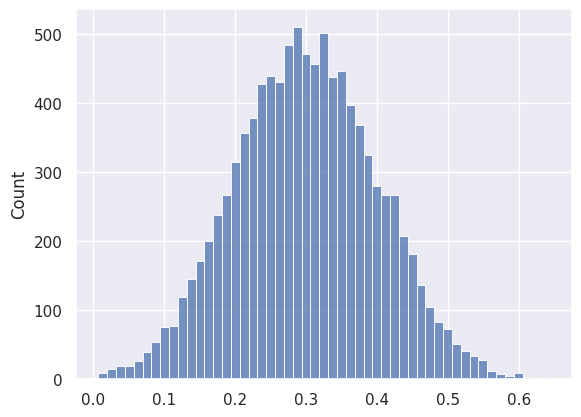

In [170]:
#чтобы вы поняли, что именно мы тут задали

dist = np.random.normal(0.3, 0.1, size=10000) #это вот такое нормальное распределение
dist = dist[dist >= 0.0] #но только значения больше нуля

sns.histplot(x=dist) #truncated normal distribution

Предиктим:

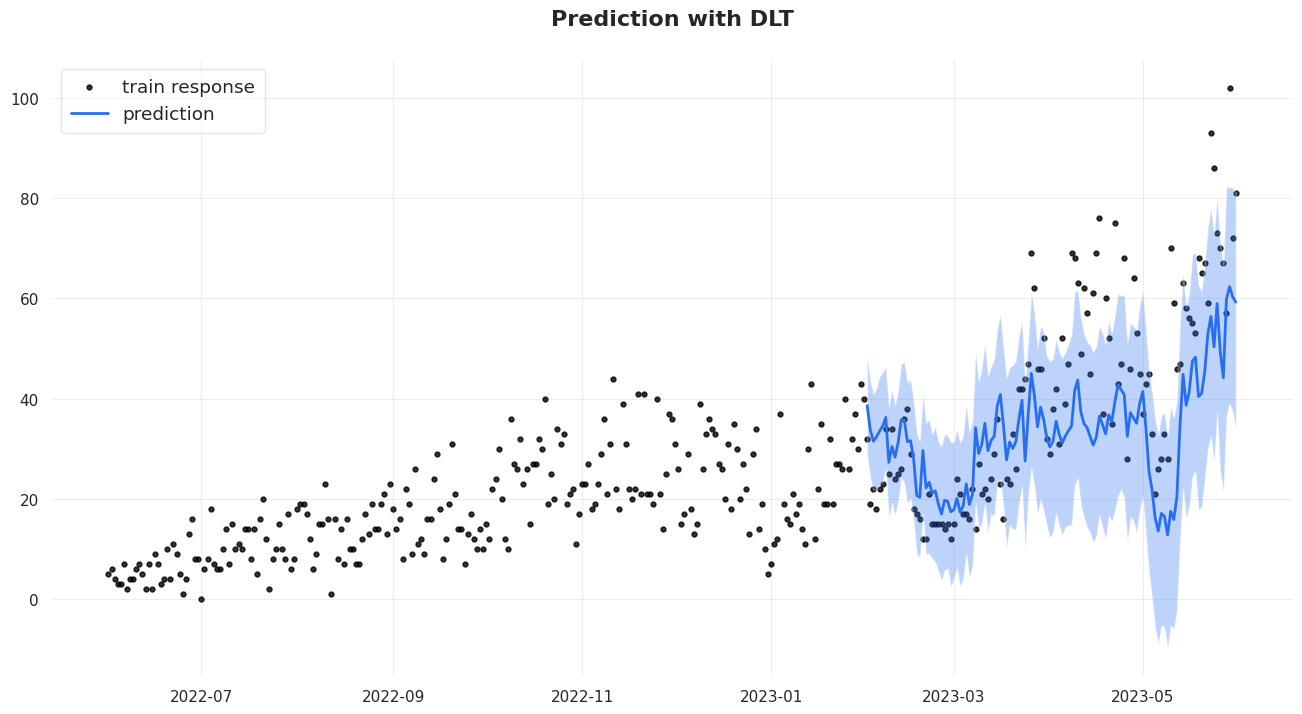

In [171]:
predicted_df_prior = reg_model_prior.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_prior, "День", 'Заказано товаров', title='Prediction with DLT') #кажется, стало хуже

Сравним коэффициенты:

In [172]:
print(f"Модель с неинформативным априорным распределением: {reg_model.get_regression_coefs()['coefficient'][0]}")
print(f"Модель с информативным априорным распределением: {reg_model_prior.get_regression_coefs()['coefficient'][0]}")

Модель с неинформативным априорным распределением: 0.0190291
Модель с информативным априорным распределением: 0.0193008


💁‍♂️ Оба значения коэффициента регрессии очень близки друг к другу, что означает, что обе модели примерно согласны в отношении влияния регрессора на регрессируемую переменную.

💁‍♂️ Значение коэффициента регрессии, равное 0.0193 в модели с информативным априорным распределением, немного выше, чем значение 0.0190291 в модели с неинформативным априорным распределением.

💁‍♂️ Это может указывать на то, что при использовании информативного априорного распределения модель представляет собой комбинацию данных обучения и сведений о природе связи, которые учитываются в априорных предположениях. В свою очередь, это может приводить к более точным и лучшим прогнозам.

### Регуляризация

Очень часто, чтобы решить проблемы с переобучением, ML-специалисты прибегают к технике **регуляризации** - дополнительных штрафов к коэффициентам модели, чтобы они не становились слишком большими, особенно если регрессор плохой. В целом задавание априорных распределений выполняет в том числе эту задачу - но мы можем задать немного другие опции регуляризации!

По умолчанию оно стоит как `fixed_ridge`. Давайте зададим `auto_ridge` - эта опция адаптивно подбирает оптимальную степень регуляризации на основе данных.

In [173]:
reg_model_auto = DLT(response_col="Заказано товаров",
                date_col="День",
                seasonality=24,
                estimator="stan-map",
                n_bootstrap_draws=1000,
                regressor_col=["Уникальные посетители с просмотром карточки товара"],
                regression_penalty="auto_ridge" #наш новый параметр
               )

reg_model_auto.fit(train_dat)

2023-09-27 15:17:00 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

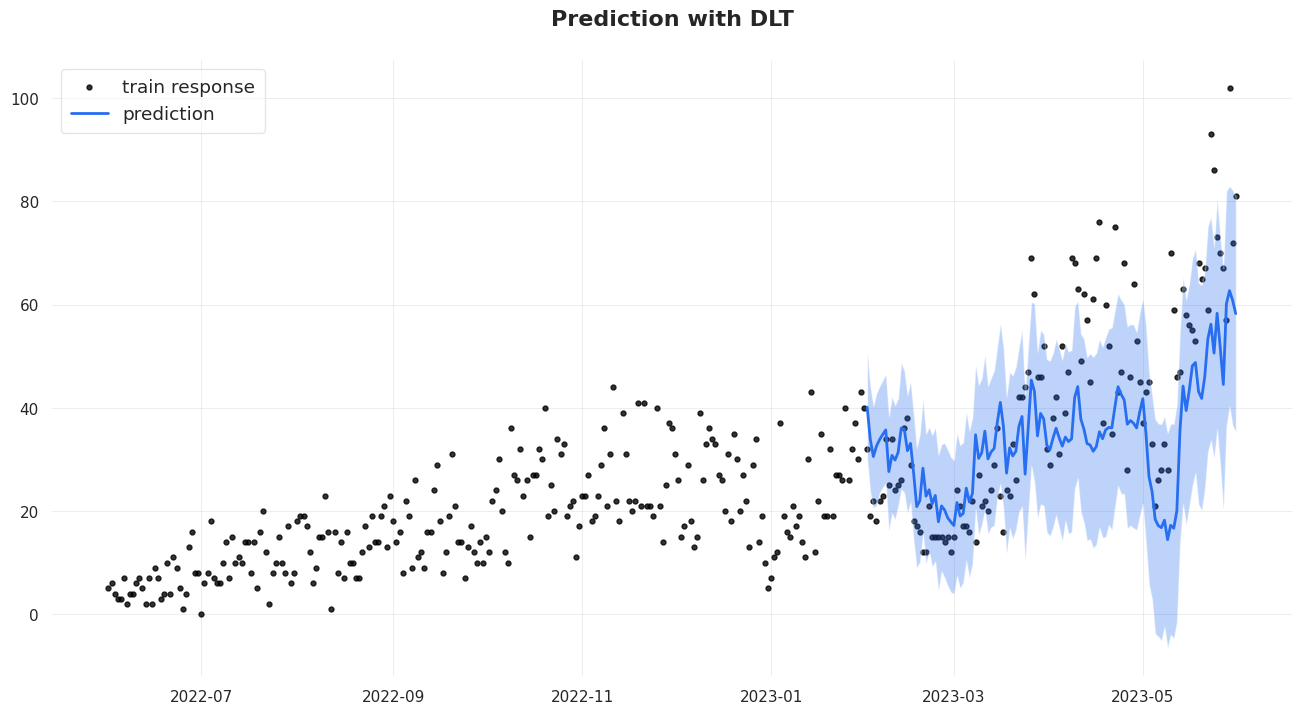

In [174]:
predicted_df_auto = reg_model_auto.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_auto, "День", 'Заказано товаров', title='Prediction with DLT')

In [175]:
reg_model_auto.get_regression_coefs()

regressor regressor_sign  \
0  Уникальные посетители с просмотром карточки то...        Regular   

   coefficient  
0     0.018634

✅ В результате выполнения нашего кода с использованием регуляризации "auto_ridge", мы получили значение коэффициента регрессии для регрессора "Уникальные посетители с просмотром карточки товара", которое равно 0.018634.

✅ Выводом является то, что при использовании регуляризации "auto_ridge" исходная модель DLT оценивает коэффициент регрессии для регрессора "Уникальные посетители с просмотром карточки товара" как 0.018634. Это значение показывает, что изменение регрессора на одну единицу влечет изменение регрессируемой переменной на примерно 0.018634 единицы.

✅ Обратите внимание, что при использовании регуляризации "auto_ridge", модель автоматически определяет наиболее подходящий штрафной коэффициент для регуляризации с учетом данных. Это позволяет контролировать переобучение модели и улучшать ее обобщающую способность.

Также сделаем lasso - оно обычно "зануляет" плохие регрессоры:

In [176]:
reg_model_lasso = DLT(response_col="Заказано товаров",
                date_col="День",
                seasonality=30,
                estimator="stan-map",
                n_bootstrap_draws=1000,
                regressor_col=["Уникальные посетители с просмотром карточки товара"],
                regression_penalty="lasso"
               )

reg_model_lasso.fit(train_dat)

2023-09-27 15:17:01 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

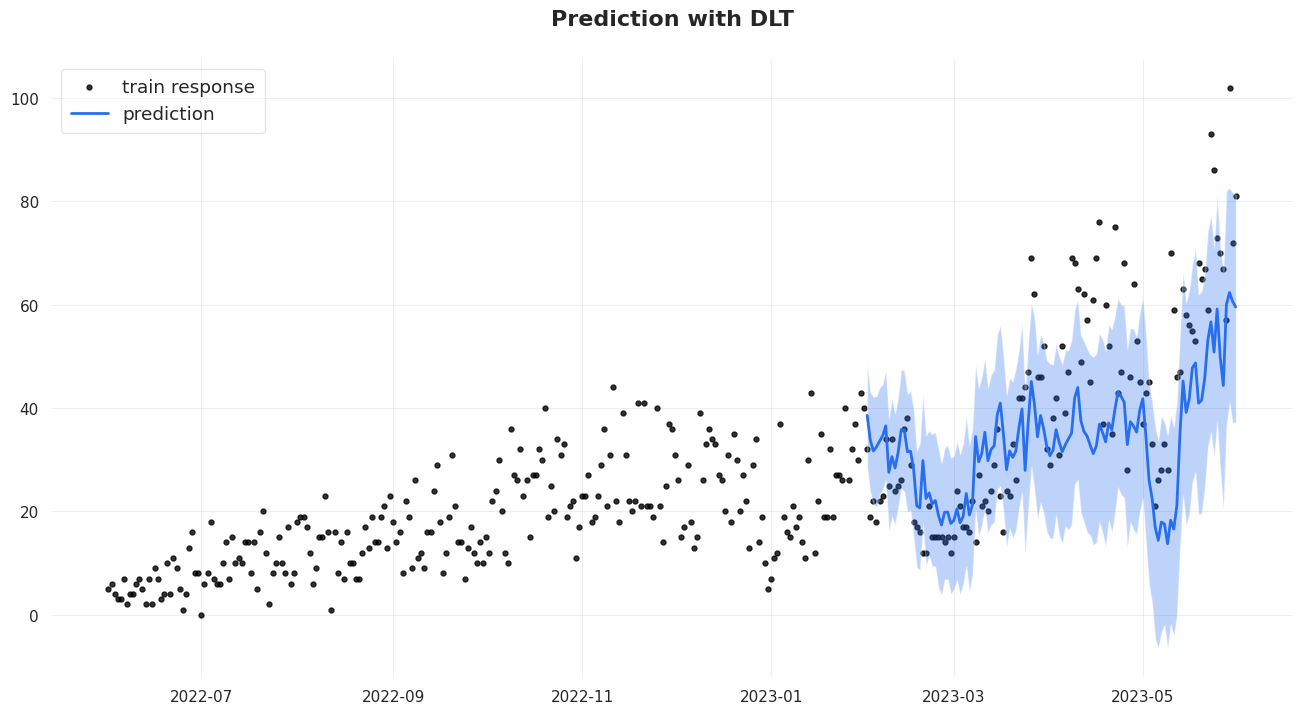

In [177]:
predicted_df_lasso = reg_model_lasso.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df_lasso, "День", 'Заказано товаров', title='Prediction with DLT') #кажется, не очень

In [178]:
reg_model_lasso.get_regression_coefs()

regressor regressor_sign  \
0  Уникальные посетители с просмотром карточки то...        Regular   

   coefficient  
0     0.019028

✅ Результат для модели, использующей регуляризацию LASSO, показывает, что коэффициент регрессии для регрессора "Уникальные посетители с просмотром карточки товара" составляет 0.019028.

✅ Вывод: При использовании регуляризации LASSO, модель DLT оценивает коэффициент регрессии для регрессора "Уникальные посетители с просмотром карточки товара" как 0.019028. Это означает, что изменение значения регрессора на одну единицу приводит к изменению регрессируемой переменной на примерно 0.019028 единицы. Регуляризация LASSO также служит для сжатия коэффициентов регрессии, что может приводить к отбору наиболее важных регрессоров и уменьшению влияния незначимых регрессоров.

### Информационные критерии

Если вы когда-нибудь работали с регрессионными моделями, то могли видеть аббревиатуры AIC/BIC. Это так называемые [информационные критерии](https://docs.displayr.com/wiki/Information_Criteria#:~:text=An%20information%20criterion%20is%20a,the%20complexity%20of%20the%20model.) - мера относительного качества модели. Их задача - отобрать модель с максимальной предсказательной способностью и минимумом предикторов.

Мы можем использовать их, чтобы выбрать лучшую модель!

In [179]:
#для полноты обучим модель без регрессора, но на тех же данных

no_reg_model = DLT(response_col="Заказано товаров",
                date_col="День",
                seasonality=30,
                estimator="stan-map",
                n_bootstrap_draws=1000
               )

no_reg_model.fit(train_dat)

2023-09-27 15:17:02 - orbit - INFO - Optimizing (PyStan) with algorithm: LBFGS.
INFO:orbit:Optimizing (PyStan) with algorithm: LBFGS.


Предиктим:

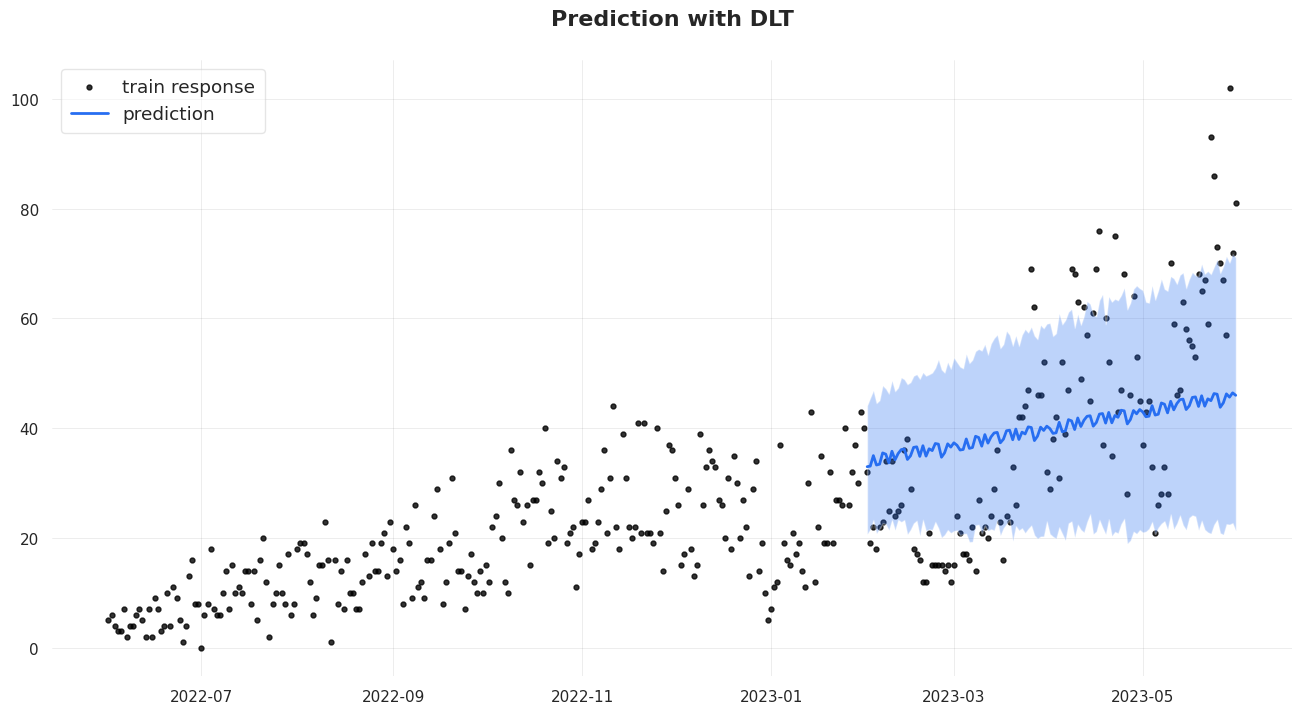

In [180]:
predicted_df = no_reg_model.predict(df=test_dat)

_ = plot_predicted_data(data_reg, predicted_df, "День", 'Заказано товаров', title='Prediction with DLT')

Извлекаем BIC-и!

In [181]:
print(f"Без регрессора: {no_reg_model.get_bic()}")
print(f"С регрессором: {reg_model.get_bic()}")
print(f"С информативным распределением: {reg_model_prior.get_bic()}")
print(f"С auto-ridge: {reg_model_auto.get_bic()}")
print(f"С lasso: {reg_model_lasso.get_bic()}")

Без регрессора: 1703.3774387035182
С регрессором: 1642.4330469288118
С информативным распределением: 1642.2821469288115
С auto-ridge: 1642.1180469288117
С lasso: 1642.3828469288117


✅ Вывод: Чем меньше значение BIC, тем лучше модель. Сравнивая значения BIC, можно сделать вывод, что модель с одним регрессором и модель с информативным априорным распределением имеют более низкое значение BIC по сравнению с базовой моделью (без регрессора). Это говорит о том, что модели с регрессором или с информативным априорным распределением имеют лучшую прогностическую способность и лучше соответствуют данным, чем базовая модель.

✅ Модель с авто-ридж регуляризацией и модель с LASSO регуляризацией также показывают низкое значение BIC, что свидетельствует о их хорошей прогностической способности и возможности обобщения. Однако их BIC незначительно выше, чем у модели с регрессором и модели с информативным априорным распределением.

✅ Таким образом, модель с регрессором или с информативным априорным распределением может быть предпочтительной, учитывая лучшую прогностическую способность и более низкое значение BIC по сравнению с базовой моделью.

Давайте сравним с выводами на тесте через метрику RMSSE:

In [182]:
from orbit.diagnostics.metrics import rmsse

In [183]:
print(f"Без регрессора: {rmsse(test_dat['Заказано товаров'].values, predicted_df['prediction'].values, train_dat['Заказано товаров'].values)}")
print(f"С регрессором: {rmsse(test_dat['Заказано товаров'].values, predicted_df_reg['prediction'].values, train_dat['Заказано товаров'].values)}")
print(f"С информативным распределением: {rmsse(test_dat['Заказано товаров'].values, predicted_df_prior['prediction'].values, train_dat['Заказано товаров'].values)}")
print(f"С auto-ridge: {rmsse(test_dat['Заказано товаров'].values, predicted_df_auto['prediction'].values, train_dat['Заказано товаров'].values)}")
print(f"С lasso: {rmsse(test_dat['Заказано товаров'].values, predicted_df_lasso['prediction'].values, train_dat['Заказано товаров'].values)}")

Без регрессора: 1.3438053950117907
С регрессором: 1.2317576603028364
С информативным распределением: 1.249966584411439
С auto-ridge: 1.232519160644988
С lasso: 1.2338639176558552


✅ Вывод: RMSSE - это метрика, которая измеряет точность прогнозирования временных рядов, учитывая их масштаб. Чем меньше значение RMSSE, тем лучше прогнозирующая модель.   
✅Сравнивая результаты, можно сделать вывод, что модель с регрессорами показывает более низкое значение RMSSE по сравнению с базовой моделью без регрессора.   
✅ Кроме того, модель с информативным априорным распределением и модель с auto-ridge также получают достаточно низкие значения RMSSE, что указывает на их хорошую прогностическую способность.  

✅ Таким образом, регрессоры и априорные распределения могут улучшить точность прогнозов и обобщающую способность модели, о чем свидетельствуют меньшие значения RMSSE.  

### А имело ли это смысл?  

Вопрос любопытный. Думаю, что по уникальным посетителям с просмотром карточки товара предсказать заказы товаров - было бы слишком просто и поэтому совсем невозможно. Для красоты нарисуем каузальную диаграмму:

In [184]:
import graphviz #чтобы рисовать графы - нужен установленный локально Graphviz!

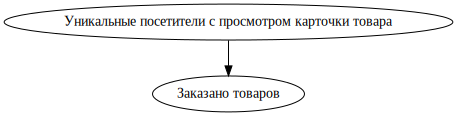

In [185]:
dag = graphviz.Digraph("Каузальные связи перед Заказано товаров") #каузальная диаграмма

#узлы

dag.node("A", "Уникальные посетители с просмотром карточки товара")

dag.node("D", "Заказано товаров")


#рёбра

dag.edges(["AD"])

dag

![Header](https://i.gifer.com/9dsD.gif)

## **3. NN Regression. Эксперименты для  ПРЕДСКАЗАНИЯ метрики: Оборот (целевой). Решение задачи регрессии с помощью нейронных сетей ⚡️⚡️⚡️**

 ### **3.1 Сбор таблицы по задаче 2 из 3 от заказчика, отбор и подготовка данных,получение первой модели регрессии.**

Задачи заказчика: https://docs.google.com/spreadsheets/d/1us6CrfdIPl30cbgERXlAT_lDeEP-pJzz/edit?usp=sharing&ouid=111073237956529254962&rtpof=true&sd=true

**План :** ⬇️

⏩ Подготовим данные.
Если данные представляют собой не фильтрованные данные, то необходимо сделать парсер, который преобразует их в табличный, удобный для обучения нейронной сети вид. Обработка должна производиться после фильтрации данных. Желательно проверить гипотезу о том, что нормированные данные дают лучший результат при обучении сети. (Надо проверить обучение сети на нормированных и ненормированных данных). Важно нормировать только численные значения, при этом оставляя без изменений векторы OneHot (при наличии категориальных данных).   

⏩ Разделим данные на обучающую и проверочную выборки.
Разделение важно производить в процентном соотношении, допускающем адекватную проверку точности нейронной сети на тестовых данных. (К примеру, для 10000 примеров в тестовой выборке не могут находиться 1, 10, 100 и даже 1000 примеров).  

⏩ Напишем сеть для регрессии.

⏩ Оценим качество работы созданной сети, определив средний процент ошибки на проверочной выборке.

⏩ Сделаем визуализацию результата.  
Визуализация результата может быть осуществлена только на сравнении ошибок между реальными и предсказанными данными.

⏩ Напишем  результаты и выводы.  


**Решение:**

Для решения задачи, мы воспользуемся готовым датафреймом, который собран из нескольких таблиц, представленных Заказчиком согласно ТЗ.

In [186]:
# Загружаем базу
df_all_merge_6 = pd.read_excel('/content/gdrive/MyDrive/УИИ/df_all_merge_6.xlsx')
df_all_merge_6.head()

День    Ozon ID Артикул  \
0  2022-06-01  260957663   24761   
1  2022-06-01  275493676   29276   
2  2022-06-01  275500058   30741   
3  2022-06-01  276736911   28907   
4  2022-06-01  276737362   28908   

                                     Название товара Категория MPStats неделя  \
0  Ксеноновая лампа D1S OSRAM 66140CLC Xenarc Cla...                        0   
1        Светодиодные линзы Aozoom A3+ RU (комплект)                        0   
2            Светодиодные линзы Aozoom A7 (комплект)                        0   
3  Лампа газоразрядная MTF Light DxS (D1S/D2S/D3S...                        0   
4  Ксеноновая лампа MTF light DxS 5000K универсал...                        0   

                   Категория MPStats Продавцы Категория Ozon Графики  \
0                                           0    Лампа автомобильная   
1       Автотовары/Автозапчасти/Автосвет/Фары     Фара автомобильная   
2       Автотовары/Автозапчасти/Автосвет/Фары     Фара автомобильная   
3  Автотовары/Автозапчасти/Автосвет/Автолампы    Лампа автомобильная   
4  Автотовары/Автозапчасти/Автосвет/Автолампы    Лампа автомобильная   

   Медиан. цена  Количество товаров с остатком (недельные данные)  \
0             0                                                 0   
1         10900                                                 6   
2         14900                                                 6   
3             0                                                 0   
4          5500                                                 7   

   Средний чек  Показы  Посетители  Посетители на карточке товара  В Корзину  \
0          0.0       1           1                              0          0   
1          0.0     351         223                             14          0   
2          0.0      83          63                              6          0   
3          0.0       1           1                              0          0   
4          0.0       2           2                              0          0   

   Заказано  Доставлено  Отменено  Возвращено  Позиция в поиске и каталоге  \
0         0           0         0           0                            0   
1         0           0         0           0                           59   
2         0           0         0           0                           64   
3         0           0         0           0                          226   
4         0           0         0           0                          157   

   Заказано по Акции  Заказано на сумму по Акции  Трафареты_Охват  \
0                  0                           0                0   
1                  0                           0                0   
2                  0                           0                0   
3                  0                           0                0   
4                  0                           0                0   

   Трафареты_Количество_заказов  Трафареты_Сумма_заказов  Трафареты_Клики  \
0                             0                        0                0   
1                             0                        0                0   
2                             0                        0                0   
3                             0                        0                0   
4                             0                        0                0   

   Трафареты_Расходы_всего  Продвижение в поиске. Количество заказов  \
0                        0                                         0   
1                        0                                         0   
2                        0                                         0   
3                        0                                         0   
4                        0                                         0   

   Продвижение в поиске. Сумма заказов  Продвижение в поиске. Ставка  \
0                                    0                             0   
1                                    0              

In [187]:
# Посмотрим на сводную информацию о наборе данных
df_all_merge_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254052 entries, 0 to 254051
Data columns (total 43 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   День                                              254052 non-null  object 
 1   Ozon ID                                           254052 non-null  int64  
 2   Артикул                                           254052 non-null  object 
 3   Название товара                                   254052 non-null  object 
 4   Категория MPStats неделя                          254052 non-null  object 
 5   Категория MPStats Продавцы                        254052 non-null  object 
 6   Категория Ozon Графики                            254052 non-null  object 
 7   Медиан. цена                                      254052 non-null  int64  
 8   Количество товаров с остатком (недельные данные)  254052 non-null  int64  
 9   Сред

#### **3.1.1 Подготовка данных**

In [188]:
df_all_merge_6['День'] = pd.to_datetime(df_all_merge_6['День'])

df_all_merge_6['Год'] = df_all_merge_6['День'].dt.year
df_all_merge_6['Неделя'] = df_all_merge_6['День'].dt.isocalendar().week

In [189]:
df_all_merge_6.head()

День    Ozon ID Артикул  \
0 2022-06-01  260957663   24761   
1 2022-06-01  275493676   29276   
2 2022-06-01  275500058   30741   
3 2022-06-01  276736911   28907   
4 2022-06-01  276737362   28908   

                                     Название товара Категория MPStats неделя  \
0  Ксеноновая лампа D1S OSRAM 66140CLC Xenarc Cla...                        0   
1        Светодиодные линзы Aozoom A3+ RU (комплект)                        0   
2            Светодиодные линзы Aozoom A7 (комплект)                        0   
3  Лампа газоразрядная MTF Light DxS (D1S/D2S/D3S...                        0   
4  Ксеноновая лампа MTF light DxS 5000K универсал...                        0   

                   Категория MPStats Продавцы Категория Ozon Графики  \
0                                           0    Лампа автомобильная   
1       Автотовары/Автозапчасти/Автосвет/Фары     Фара автомобильная   
2       Автотовары/Автозапчасти/Автосвет/Фары     Фара автомобильная   
3  Автотовары/Автозапчасти/Автосвет/Автолампы    Лампа автомобильная   
4  Автотовары/Автозапчасти/Автосвет/Автолампы    Лампа автомобильная   

   Медиан. цена  Количество товаров с остатком (недельные данные)  \
0             0                                                 0   
1         10900                                                 6   
2         14900                                                 6   
3             0                                                 0   
4          5500                                                 7   

   Средний чек  Показы  Посетители  Посетители на карточке товара  В Корзину  \
0          0.0       1           1                              0          0   
1          0.0     351         223                             14          0   
2          0.0      83          63                              6          0   
3          0.0       1           1                              0          0   
4          0.0       2           2                              0          0   

   Заказано  Доставлено  Отменено  Возвращено  Позиция в поиске и каталоге  \
0         0           0         0           0                            0   
1         0           0         0           0                           59   
2         0           0         0           0                           64   
3         0           0         0           0                          226   
4         0           0         0           0                          157   

   Заказано по Акции  Заказано на сумму по Акции  Трафареты_Охват  \
0                  0                           0                0   
1                  0                           0                0   
2                  0                           0                0   
3                  0                           0                0   
4                  0                           0                0   

   Трафареты_Количество_заказов  Трафареты_Сумма_заказов  Трафареты_Клики  \
0                             0                        0                0   
1                             0                        0                0   
2                             0                        0                0   
3                             0                        0                0   
4                             0                        0                0   

   Трафареты_Расходы_всего  Продвижение в поиске. Количество заказов  \
0                        0                                         0   
1                        0                                         0   
2                        0                                         0   
3                        0                                         0   
4                        0                                         0   

   Продвижение в поиске. Сумма заказов  Продвижение в поиске. Ставка  \
0                                    0                             0   
1                                    0                   

In [190]:
# Используем для работы с категориальными данными
from tensorflow.keras import utils

In [191]:
# Функция для преобразования столбца данных из pandas DataFrame в OneHot

def labelsToOneHot(column):

  # Получаем массив уникальных значений для столбца и тот же столбец, но в виде индексов
  vocab, indexes = np.array(np.unique(df_all_merge_6[column], return_inverse=True))

  # Преобразуем индексы в one-hot
  oneHotData = utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab))

  # Вернем индексы в one-hot и список уникальных значений
  return oneHotData, vocab.tolist()

Смотрим названия столбцов:

In [192]:
df_all_merge_6.columns

Index(['День', 'Ozon ID', 'Артикул', 'Название товара',
       'Категория MPStats неделя', 'Категория MPStats Продавцы',
       'Категория Ozon Графики', 'Медиан. цена',
       'Количество товаров с остатком (недельные данные)', 'Средний чек',
       'Показы', 'Посетители', 'Посетители на карточке товара', 'В Корзину',
       'Заказано', 'Доставлено', 'Отменено', 'Возвращено',
       'Позиция в поиске и каталоге', 'Заказано по Акции',
       'Заказано на сумму по Акции', 'Трафареты_Охват',
       'Трафареты_Количество_заказов', 'Трафареты_Сумма_заказов',
       'Трафареты_Клики', 'Трафареты_Расходы_всего',
       'Продвижение в поиске. Количество заказов',
       'Продвижение в поиске. Сумма заказов', 'Продвижение в поиске. Ставка',
       'SKU в категории', 'Названий в категории', 'Брендов в категории',
       'Продавцов в категории', 'Продаж в категории FBO',
       'Оборот категории Ozon FBO', 'Доля в категории FBO',
       'Продаж в категории FBS', 'Оборот категории Ozon FBS',
    

Забыли про стобец "Артикул", он имеет тип данных - object, нам следует провести еще ряд действий, чтобы изменить тип данных на - int:

In [193]:
# Посмотрим какие уникальные значения в столбце
unique_values = df_all_merge_6['Артикул'].unique()
print(unique_values)

['24761' '29276' '30741' ... 28594 257 34204]


Создадим отдельный датафрейм object_values, в который запишем такие данные:

In [194]:
# В этом коде мы используем метод .str.contains(), чтобы проверить наличие комбинации чисел и букв в каждой ячейке столбца analysts['Артикул'].
# Параметр regex=True указывает использовать регулярное выражение в поиске, а na=False отбрасывает пропущенные значения.
# Регулярное выражение r'\d.*[a-zA-Z]|[a-zA-Z].*\d' ищет комбинацию числа и буквы в строке.
# Если такая комбинация обнаружена, соответствующая строка будет включена в результат.
object_values_6 = df_all_merge_6[df_all_merge_6['Артикул'].str.contains(r'\d.*[a-zA-Z]|[a-zA-Z].*\d', regex=True, na=False)]

In [195]:
# Посмотрим на сводную информацию о наборе данных
object_values_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 559 to 240209
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   День                                              119 non-null    datetime64[ns]
 1   Ozon ID                                           119 non-null    int64         
 2   Артикул                                           119 non-null    object        
 3   Название товара                                   119 non-null    object        
 4   Категория MPStats неделя                          119 non-null    object        
 5   Категория MPStats Продавцы                        119 non-null    object        
 6   Категория Ozon Графики                            119 non-null    object        
 7   Медиан. цена                                      119 non-null    int64         
 8   Количество товаров с оста

У нас отсортировалось 119 записей. Доля таких данных составляет 0,05% (119/254052*100=0,05%)

In [196]:
# Посмотрим уникальные артикулы в столбце "Артикул"
unique_artikul_6 = object_values_6['Артикул'].unique()
print(unique_artikul_6)

['2A50' 'FL10NS' 'FL25W' 'FL10VW']


Получилось , что 4 артикула имеют в оформлении цифры и латинские буквы в 119 строках. Теперь найдём долю этих артикулов в общем числе уникальных артикулов.

In [197]:
# Посчитаем количество уникальных аритикулов в датафрейме analysts
df_all_merge_6['Артикул'].nunique()

1900

Таким образом доля артикулов 'FL25W', 'FL10VW', 'FL10NS', '2A50' в общем датафрейме analysts составляет: 0,2% (4/1900*100).
Для чистоты эксперимента будет лучше удалить эти аномальные данные, для того, чтобы тип данных столбца Артикул изменить с object на целочисленный.

In [198]:
# Используем метод drop(), передаем индексы этих строк в index=object_values.index,
# чтобы удалить соответствующие строки из исходного датафрейма analysts.

df_all_merge_6 = df_all_merge_6.drop(index=object_values_6.index)
df_all_merge_6['Артикул'] = df_all_merge_6['Артикул'].astype(int)
df_all_merge_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253933 entries, 0 to 254051
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   День                                              253933 non-null  datetime64[ns]
 1   Ozon ID                                           253933 non-null  int64         
 2   Артикул                                           253933 non-null  int64         
 3   Название товара                                   253933 non-null  object        
 4   Категория MPStats неделя                          253933 non-null  object        
 5   Категория MPStats Продавцы                        253933 non-null  object        
 6   Категория Ozon Графики                            253933 non-null  object        
 7   Медиан. цена                                      253933 non-null  int64         
 8   Количество тов

Всё ОК! Столбец "Артикул" теперь у нас целочисленный. Можем его теперь кодировать в числовой вектор.

Теперь продолжим и Выбирем столбцы с категориальными данными для дальнейшей кодировки:

In [199]:
df_all_merge_6['Название товара'].nunique()

994

In [200]:
labelData = ['Категория Ozon Графики', 'Название товара']

Кодируем категориальные данные:

In [201]:
# Список для списков всех уникальных значений.
# Эти списки Вы сможете использовать для обратного преобразования из OneHot в категориальные данные
vocabulary = []

# Список для массивов в формате OneHot для всех столбцов
oneHot = []

for column in labelData: # Проходим по всем столбцам

  # Получим индексы в OneHot и список уникальных значений для каждого столбца.
  oneHotData, vocab = labelsToOneHot(column)

  # Добавим список уникальных значений для столбца в vocabulary
  vocabulary.append(vocab)

  # Добавляем в список данные oneHot
  oneHot.append(oneHotData)

  # Объединяем все массивы в один
  oneHotArray = np.concatenate([i for i in oneHot], axis = 1)

<ipython-input-191-b3d73fecd226>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vocab, indexes = np.array(np.unique(df_all_merge_6[column], return_inverse=True))


Посмотрим, что у нас получилось

In [202]:
total=0

for col in range(len(vocabulary)):

  print('Число уникальных элементов в {}: {}'.format(labelData[col],len(vocabulary[col])))
  total += len(vocabulary[col])

print('Общая длина вектора', total)

Число уникальных элементов в Категория Ozon Графики: 8
Число уникальных элементов в Название товара: 994
Общая длина вектора 1002


Мы закодировали всю категориальную часть

In [203]:
oneHotArray.shape

(253933, 1002)

In [204]:
# Посмотрим на словарь названий категорий
print(vocabulary[0])

['Автохимия - Герметик, клей', 'Другое', 'Комплектующие для ксеноновых фар', 'Лампа автомобильная', 'Разное автопринадлежности', 'Светодиодный модуль', 'Фара автомобильная', 'Фонарь задний для авто']


In [205]:
# Подсчитаем количество всех категорий

lenmarks = len(vocabulary[0])
print(lenmarks)

8


Первый аргумент - это индекс строчки, второй - это вектор длиной lenmarks, который отвечает за кодировку категорий:

In [206]:
np.argmax(oneHotArray[0, :lenmarks])

3

Столбцы в словаре имеют порядок:

In [207]:
labelData

['Категория Ozon Графики', 'Название товара']

Получим из какой-нибудь строчки всего массива подмассив, принадлежащий категории (порядок строчек соответствует порядку в Pandas DataFrame).

Затем переведем его в индекс класса. Можем сверить этот индекс с индексом в vocabulary и убедиться, что они идентичны print(np.argmax(oneHotArray[i, :lenmarks]))

In [208]:
print(vocabulary[0][np.argmax(oneHotArray[0, :lenmarks])])

Лампа автомобильная


#### **3.1.2 Кодируем числовые данные**  

In [209]:
# Запоминаем Оборот (целевой), он пойдет в yTrain
oborot_cel = np.array(df_all_merge_6['Оборот (целевой)'], dtype=np.float)

<ipython-input-209-b2166a915506>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  oborot_cel = np.array(df_all_merge_6['Оборот (целевой)'], dtype=np.float)


Оборот (целевой) будем нормировать позже, а остальные числовые параметры нормируем при помощи библиотеки sklearn модуля preprocessing:

In [210]:
df_all_merge_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253933 entries, 0 to 254051
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype         
---  ------                                            --------------   -----         
 0   День                                              253933 non-null  datetime64[ns]
 1   Ozon ID                                           253933 non-null  int64         
 2   Артикул                                           253933 non-null  int64         
 3   Название товара                                   253933 non-null  object        
 4   Категория MPStats неделя                          253933 non-null  object        
 5   Категория MPStats Продавцы                        253933 non-null  object        
 6   Категория Ozon Графики                            253933 non-null  object        
 7   Медиан. цена                                      253933 non-null  int64         
 8   Количество тов

In [211]:
# Пакет предварительной обработки данных
from sklearn import preprocessing

In [212]:
# Запоминаем числовые параметры  и нормируем
years = preprocessing.scale(df_all_merge_6['Год'])
week = preprocessing.scale(df_all_merge_6['Неделя'])
artikul = preprocessing.scale(df_all_merge_6['Артикул'])
impressions = preprocessing.scale(df_all_merge_6['Показы'])
median_price = preprocessing.scale(df_all_merge_6['Медиан. цена'])
stock_quantity = preprocessing.scale(df_all_merge_6['Количество товаров с остатком (недельные данные)'])
visitors = preprocessing.scale(df_all_merge_6['Посетители'])
visitors_card = preprocessing.scale(df_all_merge_6['Посетители на карточке товара'])
basket = preprocessing.scale(df_all_merge_6['В Корзину'])
ordered = preprocessing.scale(df_all_merge_6['Заказано'])
delivered = preprocessing.scale(df_all_merge_6['Доставлено'])
cancelled = preprocessing.scale(df_all_merge_6['Отменено'])
returned = preprocessing.scale(df_all_merge_6['Возвращено'])
position_search_catalog = preprocessing.scale(df_all_merge_6['Позиция в поиске и каталоге'])
ordered_promotion = preprocessing.scale(df_all_merge_6['Заказано по Акции'])
ordered_amount_promotion = preprocessing.scale(df_all_merge_6['Заказано на сумму по Акции'])
stencil_ohvat = preprocessing.scale(df_all_merge_6['Трафареты_Охват'])
stencils_quality_orders = preprocessing.scale(df_all_merge_6['Трафареты_Количество_заказов'])
stencil_summa_orders = preprocessing.scale(df_all_merge_6['Трафареты_Сумма_заказов'])
stencil_clicks = preprocessing.scale(df_all_merge_6['Трафареты_Клики'])
stencils_spend_all = preprocessing.scale(df_all_merge_6['Трафареты_Расходы_всего'])
Promotion_search_Number_orders = preprocessing.scale(df_all_merge_6['Продвижение в поиске. Количество заказов'])
Promotion_search_Order_amount = preprocessing.scale(df_all_merge_6['Продвижение в поиске. Сумма заказов'])
Promotion_search_Bet = preprocessing.scale(df_all_merge_6['Продвижение в поиске. Ставка'])
SKU_category = preprocessing.scale(df_all_merge_6['SKU в категории'])
Names_in_category = preprocessing.scale(df_all_merge_6['Названий в категории'])
Brands_in_category = preprocessing.scale(df_all_merge_6['Брендов в категории'])
Sellers_in_category = preprocessing.scale(df_all_merge_6['Продавцов в категории'])
Sales_FBO_category = preprocessing.scale(df_all_merge_6['Продаж в категории FBO'])
Turnover_Ozon_FBO_category = preprocessing.scale(df_all_merge_6['Оборот категории Ozon FBO'])
Share_FBO_category = preprocessing.scale(df_all_merge_6['Доля в категории FBO'])
Sales_FBS_category = preprocessing.scale(df_all_merge_6['Продаж в категории FBS'])
Turnover_Ozon_FBS_category = preprocessing.scale(df_all_merge_6['Оборот категории Ozon FBS'])
Share_FBS_category = preprocessing.scale(df_all_merge_6['Доля в категории FBS'])
Sales_Retail_category = preprocessing.scale(df_all_merge_6['Продаж в категории Retail'])
Turnover_Ozon_Retail_category = preprocessing.scale(df_all_merge_6['Оборот категории Ozon Retail'])
Share_Retail_category = preprocessing.scale(df_all_merge_6['Доля в категории Retail'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Наш код выполняет предварительную обработку числовых данных, нормализуя их с использованием метода preprocessing.scale из модуля sklearn. Мы выполняем масштабирование для каждого числового столбца в нашем датафрейме.

In [213]:
years[0]

-0.8965253125416198

#### **3.1.3 Обучающая выборка**
<p>Объединяем числовые и категориальные данные в одном массиве

Для этого пройдем по всему массиву данных и будем извлекать последовательно строки из всех наборов данных:  
       oneHotArray, Оборот (целевой), Артикул, Название товара,  
       Категория Ozon Графики, Медиан. цена,  
       Количество товаров с остатком (недельные данные),  
       Показы, Посетители, Посетители на карточке товара, В Корзину,  
       Заказано, Доставлено, Отменено, Возвращено,  
       Позиция в поиске и каталоге, Заказано по Акции,  
       Заказано на сумму по Акции, Трафареты_Охват,  
       Трафареты_Количество_заказов, Трафареты_Сумма_заказов,  
       Трафареты_Клики, Трафареты_Расходы_всего,  
       Продвижение в поиске. Количество заказов,  
       Продвижение в поиске. Сумма заказов, Продвижение в поиске. Ставка,  
       SKU в категории, Названий в категории, Брендов в категории,  
       Продавцов в категории, Продаж в категории FBO,  
       Оборот категории Ozon FBO, Доля в категории FBO,  
       Продаж в категории FBS, Оборот категории Ozon FBS,  
       Доля в категории FBS, Продаж в категории Retail,  
       Оборот категории Ozon Retail, Доля в категории Retail,  
        Год, Неделя   

Затем объединять их в один вектор и записывать в x_train и Целевой оборот в y_train соответственно:

In [214]:
oneHotArray.shape

(253933, 1002)

In [215]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходим по всем машинам
for i in range(oneHotArray.shape[0]):
  # В y_train добавляем целевой оборот
  y_train.append(oborot_cel[i])

  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = oneHotArray[i]
  x_tr = np.append(x_tr, years[i])
  x_tr = np.append(x_tr, week[i])
  x_tr = np.append(x_tr, artikul[i])
  x_tr = np.append(x_tr, impressions[i])
  x_tr = np.append(x_tr, median_price[i])
  x_tr = np.append(x_tr, stock_quantity[i])
  x_tr = np.append(x_tr, visitors[i])
  x_tr = np.append(x_tr, visitors_card[i])
  x_tr = np.append(x_tr, basket[i])
  x_tr = np.append(x_tr, ordered[i])
  x_tr = np.append(x_tr, delivered[i])
  x_tr = np.append(x_tr, cancelled[i])
  x_tr = np.append(x_tr, returned[i])
  x_tr = np.append(x_tr, position_search_catalog[i])
  x_tr = np.append(x_tr, ordered_promotion[i])
  x_tr = np.append(x_tr, ordered_amount_promotion[i])
  x_tr = np.append(x_tr, stencil_ohvat[i])
  x_tr = np.append(x_tr, stencils_quality_orders[i])
  x_tr = np.append(x_tr, stencil_summa_orders[i])
  x_tr = np.append(x_tr, stencil_clicks[i])
  x_tr = np.append(x_tr, stencils_spend_all[i])
  x_tr = np.append(x_tr, Promotion_search_Number_orders[i])
  x_tr = np.append(x_tr, Promotion_search_Order_amount[i])
  x_tr = np.append(x_tr, Promotion_search_Bet[i])
  x_tr = np.append(x_tr, SKU_category[i])
  x_tr = np.append(x_tr, Names_in_category[i])
  x_tr = np.append(x_tr, Brands_in_category[i])
  x_tr = np.append(x_tr, Sellers_in_category[i])
  x_tr = np.append(x_tr, Sales_FBO_category[i])
  x_tr = np.append(x_tr, Turnover_Ozon_FBO_category[i])
  x_tr = np.append(x_tr, Share_FBO_category[i])
  x_tr = np.append(x_tr, Sales_FBS_category[i])
  x_tr = np.append(x_tr, Turnover_Ozon_FBS_category[i])
  x_tr = np.append(x_tr, Share_FBS_category[i])
  x_tr = np.append(x_tr, Sales_Retail_category[i])
  x_tr = np.append(x_tr, Turnover_Ozon_Retail_category[i])
  x_tr = np.append(x_tr, Share_Retail_category[i])

  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

<ipython-input-215-38a6bb23252a>:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.array(x_train, dtype=np.float)


(253933, 1039)
(253933,)


<ipython-input-215-38a6bb23252a>:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.array(y_train, dtype=np.float)


#### **3.1.4 Сохраняем подготовленные данные**

In [216]:
from google.colab import drive # Подключаем диск
drive.mount('/content/drive')

Mounted at /content/drive


In [217]:
np.save('/content/drive/My Drive/df_all_merge_6_x_train', x_train)
np.save('/content/drive/My Drive/df_all_merge_6_y_train', y_train)

#### **3.1.5 Загрузка данных**

In [218]:
x_train = np.load('/content/drive/My Drive/df_all_merge_6_x_train.npy')
y_train = np.load('/content/drive/My Drive/df_all_merge_6_y_train.npy')

#### **3.1.6 Нормирование y_train**

In [219]:
print(y_train.min())
print(y_train.max())

0.0
101526.0


 🔹 Таким образом, наименьшее значение целевого оборота равно 0.0, а наибольшее значение равно 101526.0.

**Как видим с таким разбросом значений Оборот (целевой) нейросеть работать не может, их нужно привести в порядок.**

`y_train.reshape(-1,1)` добавляет одну размерность. Это нужно потому, что `y_scaler.fit_transform` принимает только двумерный вектор, не умеет работать с одним примером.

Поэтому мы делаем массив из одного примера.

На выходе `y_scaler.fit_transform` также выдаёт массив примеров, но нам нужен только один пример, поэтому мы делаем `flatten()` - уменьшение размерности.

Разделяем единый набор данных на обучающую и тестовую выборки:

In [220]:
# Для разбивки на выборки
from sklearn.model_selection import train_test_split

x_train_df_all_merge_6, x_test_df_all_merge_6, y_train_df_all_merge_6, y_test_df_all_merge_6 = train_test_split(x_train,
                                                                    y_train,
                                                                    test_size=0.1)

print(x_train_df_all_merge_6.shape)
print(y_train_df_all_merge_6.shape)
print(x_test_df_all_merge_6.shape)
print(y_test_df_all_merge_6.shape)

(228539, 1039)
(228539,)
(25394, 1039)
(25394,)


🔹  Таким образом, после разбиения данных на обучающую и тестовую выборки, обучающая выборка `(x_train_df_all_merge_6, y_train_df_all_merge_6)` содержит 228539 записей, а тестовая выборка `(x_test_df_all_merge_6, y_test_df_all_merge_6)` содержит 25394 записи.

In [221]:
# Нормализуем y_train

# Подключаем стандартизатор
from sklearn.preprocessing import StandardScaler

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_df_all_merge_6.reshape(-1,1)).flatten()

y_train_scaled.shape

(228539,)

🔹Таким образом, после стандартизации данных `y_train_df_all_merge_6` с использованием объекта `StandardScaler`, массив `y_train_scaled` имеет размерность `(228539,)`, что указывает на наличие `228539` стандартизированных значений `целевого оборота`.

🔹Теперь у нас есть нормализованные значения целевых переменных в `y_train_scaled`, готовые для использования в модели обучения.


In [222]:
print(y_train_scaled.min())
print(y_train_scaled.max())

-0.10624976021150319
87.606472589192


🔹 Наименьшее стандартизированное значение целевого оборота равно -0.10624976021150319;  
🔹 Наибольшее стандартизированное значение равно 87.606472589192.  

In [223]:
# Проведем обратное преобразование
y_train_unscaled = y_scaler.inverse_transform(y_train_scaled.reshape(-1,1)).flatten()

In [224]:
# Выводим базовый и нормированный y_train

print(y_train_df_all_merge_6[:5])
print(y_train_scaled[:5])
print(y_train_unscaled[:5])

[0. 0. 0. 0. 0.]
[-0.10624976 -0.10624976 -0.10624976 -0.10624976 -0.10624976]
[0. 0. 0. 0. 0.]


 🔹Результат вывода показывает, что первые пять элементов исходных данных y_train_df_all_merge_6 содержат нулевые значения [0. 0. 0. 0. 0.], стандартизированные значения y_train_scaled также равняются [-0.10624976 -0.10624976 -0.10624976 -0.10624976 -0.10624976], а обратно преобразованные значения y_train_unscaled снова равны нулю [0. 0. 0. 0. 0.].  

🔹Таким образом, после обратного преобразования стандартизированных данных мы получаем исходные значения, которые снова равны нулю.  

#### **3.1.7 Нейросеть**

Важно! При выборе активационной фунции учитываем, какую нормировку данных мы сделаем.

In [225]:
# импортируем коллбэки
from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping, ModelCheckpoint

earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=4,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True)

reduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss',
                                      factor=0.6,
                                      patience=2,
                                      verbose=1)

model_Checkpoint = ModelCheckpoint(filepath='/content/drive/My Drive/Модели/model_cars_6.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   mode='auto',
                                   baseline=None)

💁‍♂️ **В нашем коде импортируются коллбэки из модуля keras.callbacks:**  

- `EarlyStopping` - для остановки обучения, если метрика `val_loss` не улучшается в течение указанного количества эпох.  
- `ReduceLROnPlateau` - для уменьшения скорости обучения, если метрика `val_loss` не улучшается в течение указанного количества эпох.  
- `ModelCheckpoint` - для сохранения лучшей модели по метрике `val_loss` во время обучения.  

💁‍♂️ **У нас также создаются экземпляры каждого коллбэка с определенными параметрами:**

- `earlystop` - `EarlyStopping` коллбэк с параметрами `monitor='val_loss'`, `min_delta=0`, `patience=4`, `verbose=1`, `baseline=None`, `restore_best_weights=True`.  
- `reduceLROnPlateau` - `ReduceLROnPlateau` коллбэк с параметрами `monitor='val_loss'`, `factor=0.6`, `patience=2`, `verbose=1`.  
- `model_Checkpoint - ModelCheckpoint` коллбэк с параметрами `filepath='/content/drive/My Drive/Модели/model_cars.h5'`, `monitor='val_loss'`, `verbose=1`, `save_best_only=True`, `mode='auto'`, `baseline=None`.  

💁‍♂️ **Заметим, что `filepath` для `model_Checkpoint` указывает на путь, где будет сохранена лучшая модель с минимальным значением `val_loss`.**  


💁‍♂️ **Теперь у нас готовы коллбэки для использования при обучении вашей модели.**  

In [226]:
# Импортируем для создания полносвязной сети и модели
from tensorflow.keras.models import Sequential

# Необходимые слои
from tensorflow.keras.layers import Dense, Dropout

# Импортируем оптимизаторы
from tensorflow.keras.optimizers import Adam

🚀🚀🚀 **Запускаем нейросеть:**

In [227]:
#Создаем нейросеть
model_cars_6 = Sequential()

model_cars_6.add(Dense(1000, input_dim=x_train.shape[1]))
model_cars_6.add(Dropout(0.2))
model_cars_6.add(Dense(100, activation='relu'))
model_cars_6.add(Dense(1, activation='linear'))

model_cars_6.compile(optimizer=Adam(learning_rate=0.0001), loss=['MSE'], metrics='mae')

# 50000 примеров будет в обучающей выборке
n_val = 50000

history_cars = model_cars_6.fit(x_train_df_all_merge_6[:n_val],
                              y_train_scaled[:n_val],
                              batch_size=32,
                              epochs=100,
                              validation_data=(x_train_df_all_merge_6[n_val:], y_train_scaled[n_val:]),
                              verbose=1,
                              callbacks=[earlystop, reduceLROnPlateau, model_Checkpoint])

Epoch 1/100
1562/1563 [============================>.] - ETA: 0s - loss: 0.2582 - mae: 0.1242
Epoch 1: val_loss improved from inf to 0.11598, saving model to /content/drive/My Drive/Модели/model_cars_6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 67s 42ms/step - loss: 0.2582 - mae: 0.1242 - val_loss: 0.1160 - val_mae: 0.0678 - lr: 1.0000e-04
Epoch 2/100
1560/1563 [============================>.] - ETA: 0s - loss: 0.1778 - mae: 0.1059
Epoch 2: val_loss did not improve from 0.11598
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1776 - mae: 0.1058 - val_loss: 0.1232 - val_mae: 0.0784 - lr: 1.0000e-04
Epoch 3/100
1563/1563 [==============================] - ETA: 0s - loss: 0.1663 - mae: 0.1034
Epoch 3: val_loss improved from 0.11598 to 0.07518, saving model to /content/drive/My Drive/Модели/model_cars_6.h5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1663 - mae: 0.1034 - val_loss: 0.0752 - val_mae: 0.0581 - lr: 1.0000e-04
Epoch 4/100
1561/1563 [============================>.] - ETA: 0s - loss: 0.1339 - mae: 0.0962
Epoch 4: val_loss improved from 0.07518 to 0.06406, saving model to /content/drive/My Drive/Модели/model_cars_6.h5
1563/1563 [====

☀️ Итак, в нашем коде создается нейронная сеть с помощью модели Sequential из библиотеки keras.

☀️ Мы добавляем слои в модель с помощью метода add:

- Dense слой с 1000 нейронами и входным размером, определяемым `x_train.shape[1]`.  
- Dropout слой для регуляризации с коэффициентом отсечения 0.2.  
- Dense слой с 100 нейронами и активацией 'relu'.  
- Dense слой с 1 нейроном и линейной активацией, который будет предсказывать целевую переменную.  

☀️ Мы компилируем модель, указывая оптимизатор Adam с параметром скорости обучения `learning_rate=0.0001`, функцию потерь `'MSE'` (среднеквадратичная ошибка) и метрику `'mae'` (средняя абсолютная ошибка).  

☀️ Мы также задаем количество примеров `n_val` (50000) для обучающей выборки, определяем `history_cars` как результат обучения модели с использованием метода `fit`. Мы передаем обучающую и валидационную выборки, размер пакета `(batch_size=32)`, количество эпох `(epochs=100)`, вывод прогресса обучения `(verbose=1)` и список коллбэков для отслеживания метрик и сохранения модели.  

☀️ Модель  обучена с использованием указанных параметров и коллбэков.  

☀️ История обучения будет сохраняться в `history_cars`.


#### **3.1.8 Функция отображения графиков**

In [228]:
%matplotlib inline

In [229]:
# Визуальная оценка ошибки на обучающей и проверочной выборках

def compare_sharp_loss (history, x_size, y_size):

  # Смотрим графики точности на обучающей и проверочной выборках
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'],
         label='Ошибка на обучающей выборке')

  # Выводим график точности на проверочной выборке
  plt.plot(history.history['val_loss'],
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка')
  plt.legend()
  plt.show()

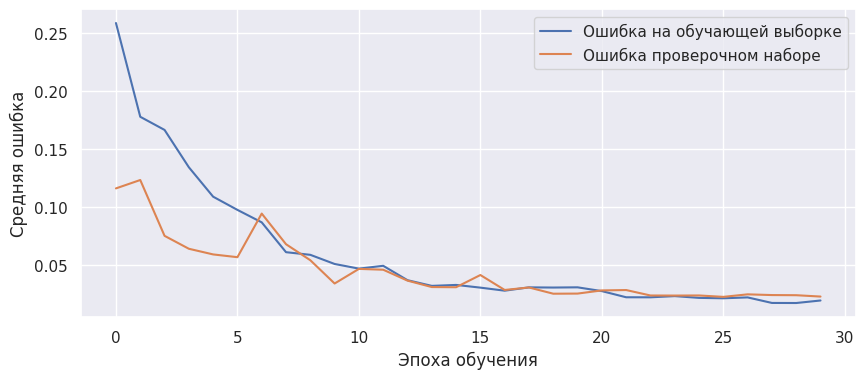

In [230]:
compare_sharp_loss(history_cars, 10, 4)

Сохраним архитектуру и веса модели:

In [231]:
model_cars_6.save('/content/drive/My Drive/Модели/model_cars_6.h5')

In [232]:
model_cars_6.load_weights('/content/drive/My Drive/Модели/model_cars_6.h5')

#### **3.1.9 Оценка ошибки предсказания выручки**

In [233]:
# Сравнивает отскейленные данные

def total_MAE_predict(model,x_test, y_test):

  # Инициализируем начальное значение ошибки
  mae = 0
  y_pred = model.predict(x_test)
  y_pred_unscaled = y_scaler.inverse_transform(y_pred).flatten()

  # Считаем среднюю цену, среднюю ошибку и средний процент ошибки
  mean_delta = np.mean(abs(y_pred_unscaled - y_test))
  mean_oborot_cel = np.mean(y_test)

  print('Средняя ошибка: ', round(mean_delta))
  print('Средний Целевой оборот: ', round(mean_oborot_cel))
  print('Суммарный процент ошибки: ', round(100*mean_delta/mean_oborot_cel), '%', sep='')

Оценим точность:

In [234]:
total_MAE_predict(model_cars_6,
                  x_test_df_all_merge_6,
                  y_test_df_all_merge_6)

794/794 [==============================] - 4s 5ms/step
Средняя ошибка:  33
Средний Целевой оборот:  130
Суммарный процент ошибки: 26%


🤣🤣🤣 Результаты нашего эксперимента не являются достаточно удовлетворительными. Что могло повлиять на данный результат?

#### **3.2 Выводы и рекомендации**

Посмотрим глубже на данные столбца `Оборот (целевой)`:

In [235]:
# Подсчет уникальных значений и их количества
unique_values = df_all_merge_6['Оборот (целевой)'].value_counts()

# Вычисление процентного соотношения
percentage = (unique_values / len(df_all_merge_6)) * 100

# Вывод результатов
print(percentage)


0        97.263058
1089      0.109084
3000      0.102783
990       0.100026
3980      0.089394
           ...    
19068     0.000394
17820     0.000394
4098      0.000394
5522      0.000394
6054      0.000394
Name: Оборот (целевой), Length: 985, dtype: float64


💁‍♂️**Мы видим, что 97% данных содержит нули. Это может быть причиной того, что модель нейронной сети, обученная на этих данных, дает недостаточно точные результаты.**  
💁‍♂️**Наличие такого большого количества нулевых значений в целевой переменной может привести к проблеме смещения и недостаточной информативности модели. В результате модель может не смочь достаточно хорошо обобщить данные и предсказать значения, отличные от нулей.**


####**Рекомендации**

Для улучшения результатов модели нейронной сети в нашем случае:  

  ✅ Исследовать и применить различные архитектуры нейронных сетей, которые могут лучше учитывать особенности наших данных. Например, мы можем экспериментировать с составными нейронными сетями, содержащими несколько ветвей или выходов.  

  ✅ Уделить внимание настройке параметров модели, таких как скорость обучения и регуляризация. Использовать кросс-валидацию и оптимизацию параметров модели для достижения лучших результатов.  

  ✅ Не забывать о регуляризации. Применение методов регуляризации, таких как dropout или L1/L2 регуляризация, может помочь предотвратить переобучение модели.   

  ✅ Рассмотреть альтернативные модели машинного обучения, такие как градиентный бустинг или случайный лес. Данные подходы мы рассмотрели в разделе 2.1 этого проекта.  

## **4. Общий вывод 📝**

👨‍💻 В рамках данного проекта мы исследовали различные методы предсказания и прогнозирования продаж товаров на маркетплейсах, сравнивая подходы машинного обучения (ML), временных рядов (TS) и нейронных сетей (NN)

👨‍💻 Мы начали с анализа и предобработки данных,определения корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.  Затем мы приступили к моделированию и сравнению различных методов.  

👨‍💻 Методы машинного обучения (ML), в частности модели регрессии, были применены для предсказания метрики "Заказано товаров". Методы машинного обучения (ML), особенно модели DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor, показали высокую точность предсказания и хорошо справились с широким спектром данных. Они также обладают легкой настройкой, что делает их привлекательными в использовании.  

 Они имеют очень низкие значения средней абсолютной ошибки и средней квадратичной ошибки, приближающиеся к нулю, а также высокие значения коэффициента детерминации (R2), близкие к 1. Это говорит о том, что эти модели хорошо объясняют вариацию в данных и имеют хорошую точность предсказания. Таким образом, можно сказать, что эти модели работают хорошо для данного набора данных.   

 👨‍💻 Мы провели эксперименты с использованием фреймворка Orbit от компании Uber для прогнозирования временных рядов и предсказания метрики "Заказано товаров".

На основании результатов экспериментов мы получили следующие выводы:

- При использовании информативного априорного распределения в модели Orbit, коэффициент регрессии для регрессора "Уникальные посетители с просмотром карточки товара" составляет 0.0193. Это значит, что при увеличении значения регрессора на единицу, ожидается увеличение величины регрессируемой переменной (заказанных товаров) на приблизительно 0.0193.

- Модель с неинформативным априорным распределением также дала схожий результат с коэффициентом регрессии равным 0.0190291. Это говорит о том, что обе модели согласны относительно влияния регрессора на регрессируемую переменную.

- В обоих случаях значение коэффициента регрессии указывает на положительную связь между количеством уникальных посетителей с просмотром карточки товара и количеством заказанных товаров.

- Использование регуляризации LASSO также позволяет оценить коэффициент регрессии для регрессора "Уникальные посетители с просмотром карточки товара". В данном случае, коэффициент регрессии составляет 0.019028, что подтверждает положительную связь между регрессором и регрессируемой переменной.

🔹 Базируясь на полученных данных, получены выводы, что количество уникальных посетителей с просмотром карточки товара может оказывать положительное влияние на количество заказанных товаров. Эти результаты могут быть полезны для дальнейшего анализа и прогнозирования продаж товаров на маркетплейсах.**  

👨‍💻 Мы провели эксперименты с использованием нейронных сетей для предсказания метрики "Оборот" в задаче регрессии с учетом требований по метрикам Заказчика. Результаты этого эксперимента получились не достаточно удовлетворительными.   

Для улучшения результатов модели нейронной сети в нашем случае:

🔹 Исследовать и применить различные архитектуры нейронных сетей, которые могут лучше учитывать особенности наших данных. Например, мы можем экспериментировать с составными нейронными сетями, содержащими несколько ветвей или выходов.

🔹 Уделить внимание настройке параметров модели, таких как скорость обучения и регуляризация. Использовать кросс-валидацию и оптимизацию параметров модели для достижения лучших результатов.

🔹 Не забывать о регуляризации. Применение методов регуляризации, таких как dropout или L1/L2 регуляризация, может помочь предотвратить переобучение модели.

🔹 Рассмотреть альтернативные модели машинного обучения, такие как градиентный бустинг или случайный лес. Данные подходы мы рассмотрели в разделе 2.1 этого проекта.




> <table style="width:100%">
  <tr style="background-color: white; color: #a34698;">
    <td><b><font size="4">Спасибо за внимание!</font></b></td>
  </tr>
</table>


</div>
<!--END_SECTION:waka-->

<img src="https://raw.githubusercontent.com/trinib/trinib/82213791fa9ff58d3ca768ddd6de2489ec23ffca/images/footer.svg" width="100%">